# Mounting to drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install pypalettes

In [ ]:
%cd /content/drive/MyDrive/capra_lab/HuSC/

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


/content/drive/MyDrive/capra_lab/HuSC


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pypalettes as pp

# Setting global params

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def apply_global_font(ax, size=26):
    """Apply Arial font and consistent size to axes labels and ticks."""
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(arial_font)
        label.set_fontsize(size)
    for axis_label in [ax.xaxis.label, ax.yaxis.label]:
        axis_label.set_fontproperties(arial_font)
        axis_label.set_fontsize(size)


In [ ]:
# --- Global Plot Settings ---
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Load font
arial_font = fm.FontProperties(fname="arial.ttf")

# --- Global rcParams ---
plt.rcParams.update({
    # Font and text
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'font.size': 20,
    'axes.titlesize': 24,
    'axes.labelsize': 26,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
    'axes.linewidth': 2.5,

    # Remove gridlines globally
    'axes.grid': False,
    'grid.linestyle': '',

    # Axes and ticks (ensures they are visible)
    'axes.edgecolor': 'black',
    'xtick.bottom': True,
    'ytick.left': True,
    'xtick.top': False,
    'ytick.right': False,
    'xtick.color': 'black',
    'ytick.color': 'black',
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'xtick.major.width': 2.5,
    'ytick.major.width': 2.5,
    'xtick.major.size': 20,
    'ytick.major.size': 20,

    # Figure defaults
    'figure.figsize': (8, 8),
    'savefig.format': 'svg',
    'savefig.bbox': 'tight',
    'savefig.dpi': 300,

    # Lines
    'lines.linewidth': 2,

    # Legend
    'legend.fontsize': 20,
    'legend.frameon': False
})

# ✅ Use a clean Seaborn base theme (no gridlines)
sns.set_theme(style="white", rc=plt.rcParams)


# Figures

Loading data...
Loaded 6 categories

Original categories:
              category  count
0  no_enst_for_uniprot   1118
1         no_valid_cds    909
2      no_variant_data   2065
3        bad_structure      0
4           no_enst_mp    153
5        success_files  16259

After filtering: 5 categories remain

Renamed categories:
                            category  count
0   No Ensembl transcript IDs mapped   1118
1     No valid coding sequence found    909
2             No gnomad variant data   2065
4  Missing mutation probability data    153
5                Successfully mapped  16259


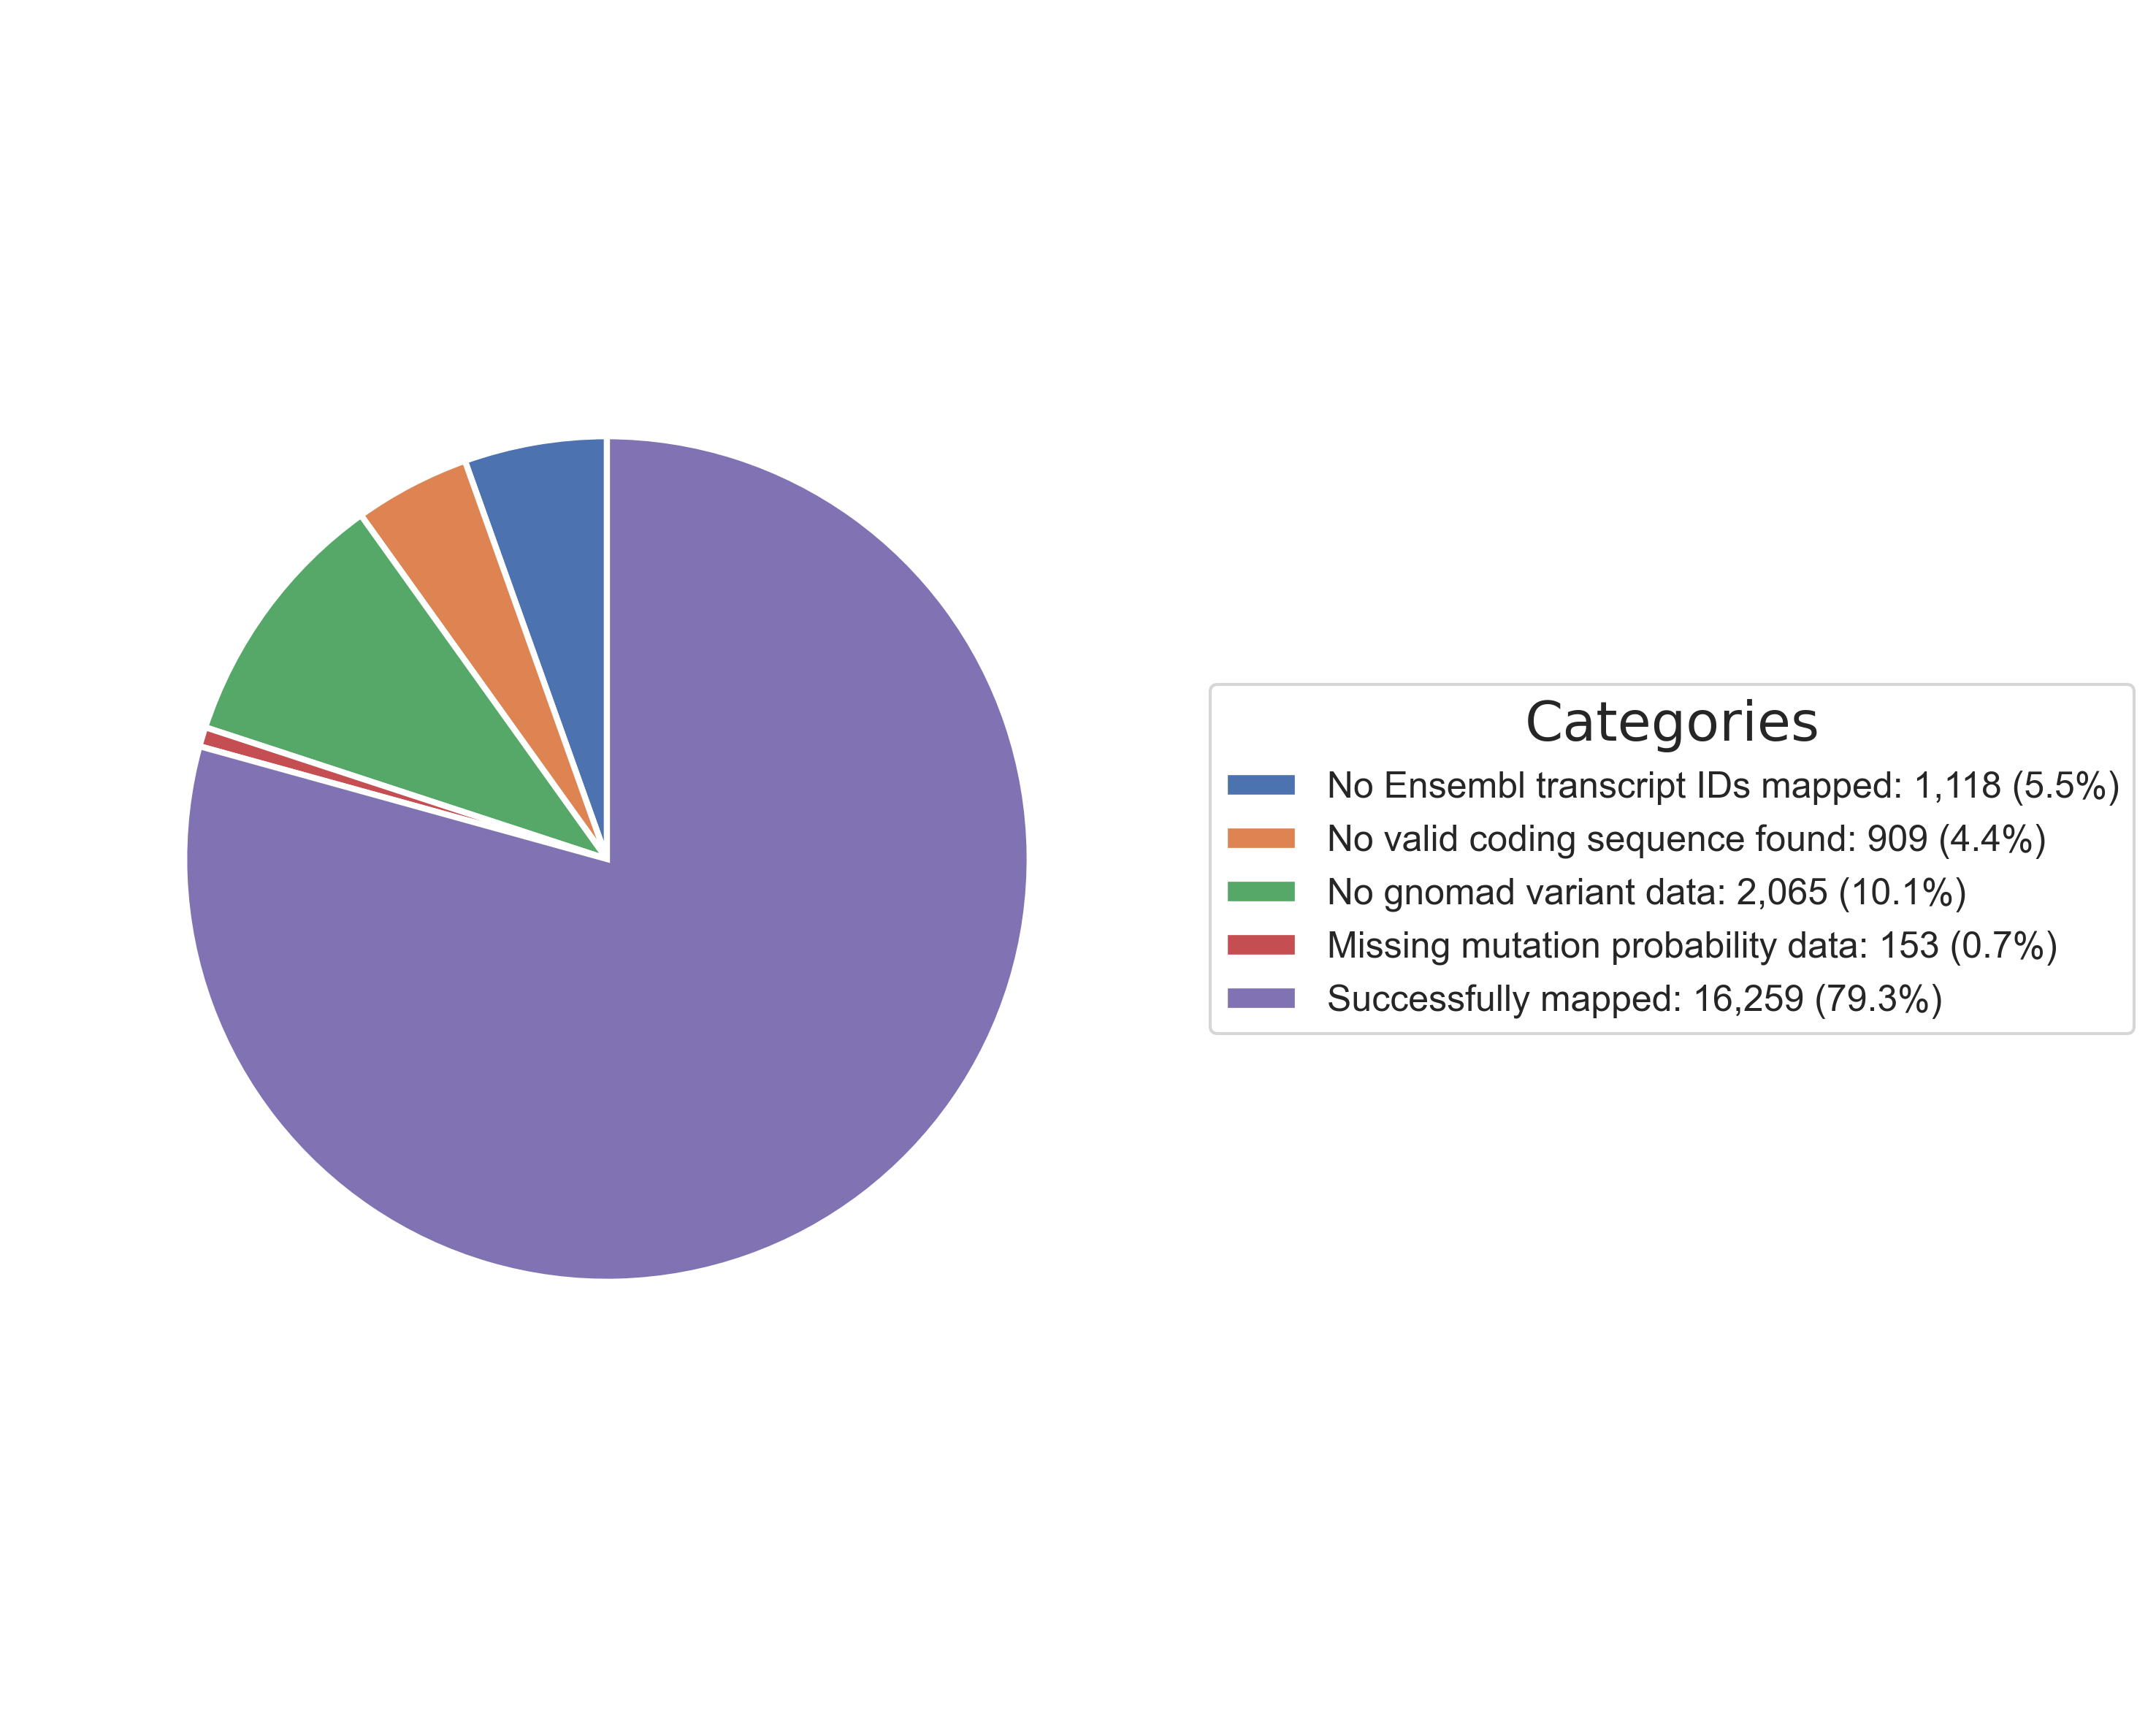


✓ Complete!
Total count: 20,504

Category breakdown:
  No Ensembl transcript IDs mapped: 1,118 (5.5%)
  No valid coding sequence found: 909 (4.4%)
  No gnomad variant data: 2,065 (10.1%)
  Missing mutation probability data: 153 (0.7%)
  Successfully mapped: 16,259 (79.3%)


In [ ]:
#@title S1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Configuration
FIGURE_SIZE = (10, 8)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_LEGEND = 18
FONT_SIZE_WEDGE = 18
SPINE_WIDTH = 1.2

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# Load data
print("Loading data...")
df = pd.read_csv("husc_run_summary.csv")
print(f"Loaded {len(df)} categories")
print("\nOriginal categories:")
print(df[["category", "count"]])

# Drop rows where count is 0 or category is bad_structure
df = df[(df["count"] > 0) & (df["category"] != "bad_structure")]
print(f"\nAfter filtering: {len(df)} categories remain")

# ============================================================
# RENAME CATEGORIES HERE - Edit the dictionary below
# ============================================================
category_rename = {
    "no_enst_for_uniprot": "No Ensembl transcript IDs mapped",
    "no_valid_cds": "No valid coding sequence found",
    "no_variant_data": "No gnomad variant data",
    "no_enst_mp": "Missing mutation probability data",
    "success_files": "Successfully mapped"
}

# Apply renaming if dictionary is not empty
if category_rename:
    df["category"] = df["category"].replace(category_rename)
    print("\nRenamed categories:")
    print(df[["category", "count"]])

# ============================================================
# COLOR SCHEME - Customize colors here if desired
# ============================================================
# Default: use a professional color palette
# You can specify custom colors as a list, e.g., ['#FF6B6B', '#4ECDC4', '#45B7D1']
colors = None  # Will use matplotlib's default tab10 colors

# ============================================================

# Calculate percentages
total = df["count"].sum()
df["percentage"] = (df["count"] / total) * 100

# Create figure with more space for legend
fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

# Create pie chart without labels on the pie itself
wedges, texts = ax.pie(
    df["count"],
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'}
)

# Create legend labels with counts and percentages
legend_labels = [
    f'{row["category"]}: {row["count"]:,} ({row["percentage"]:.1f}%)'
    for _, row in df.iterrows()
]
arial_font = fm.FontProperties(fname="arial.ttf", size=12)
# Add legend
ax.legend(
    wedges,
    legend_labels,
    title="Categories",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=FONT_SIZE_LEGEND,
    title_fontsize=FONT_SIZE_LABELS,
    prop=arial_font,
    frameon=True
)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add title (optional - uncomment and edit if desired)
# ax.set_title('Distribution of Categories', fontsize=FONT_SIZE_LABELS+2,
#              fontweight='bold', fontproperties=arial_font, pad=20)

plt.tight_layout()

# Save figure
plt.savefig("category_distribution_pie_chart.svg", dpi=DPI, bbox_inches='tight')
# plt.savefig("category_distribution_pie_chart.png", dpi=DPI, bbox_inches='tight')
plt.show()

print(f"\n✓ Complete!")
print(f"Total count: {total:,}")
print("\nCategory breakdown:")
for _, row in df.iterrows():
    print(f"  {row['category']}: {row['count']:,} ({row['percentage']:.1f}%)")

5 Ångström - Total number of residues: 8777165
8 Ångström - Total number of residues: 8804979
11 Ångström - Total number of residues: 8788721
14 Ångström - Total number of residues: 8788721


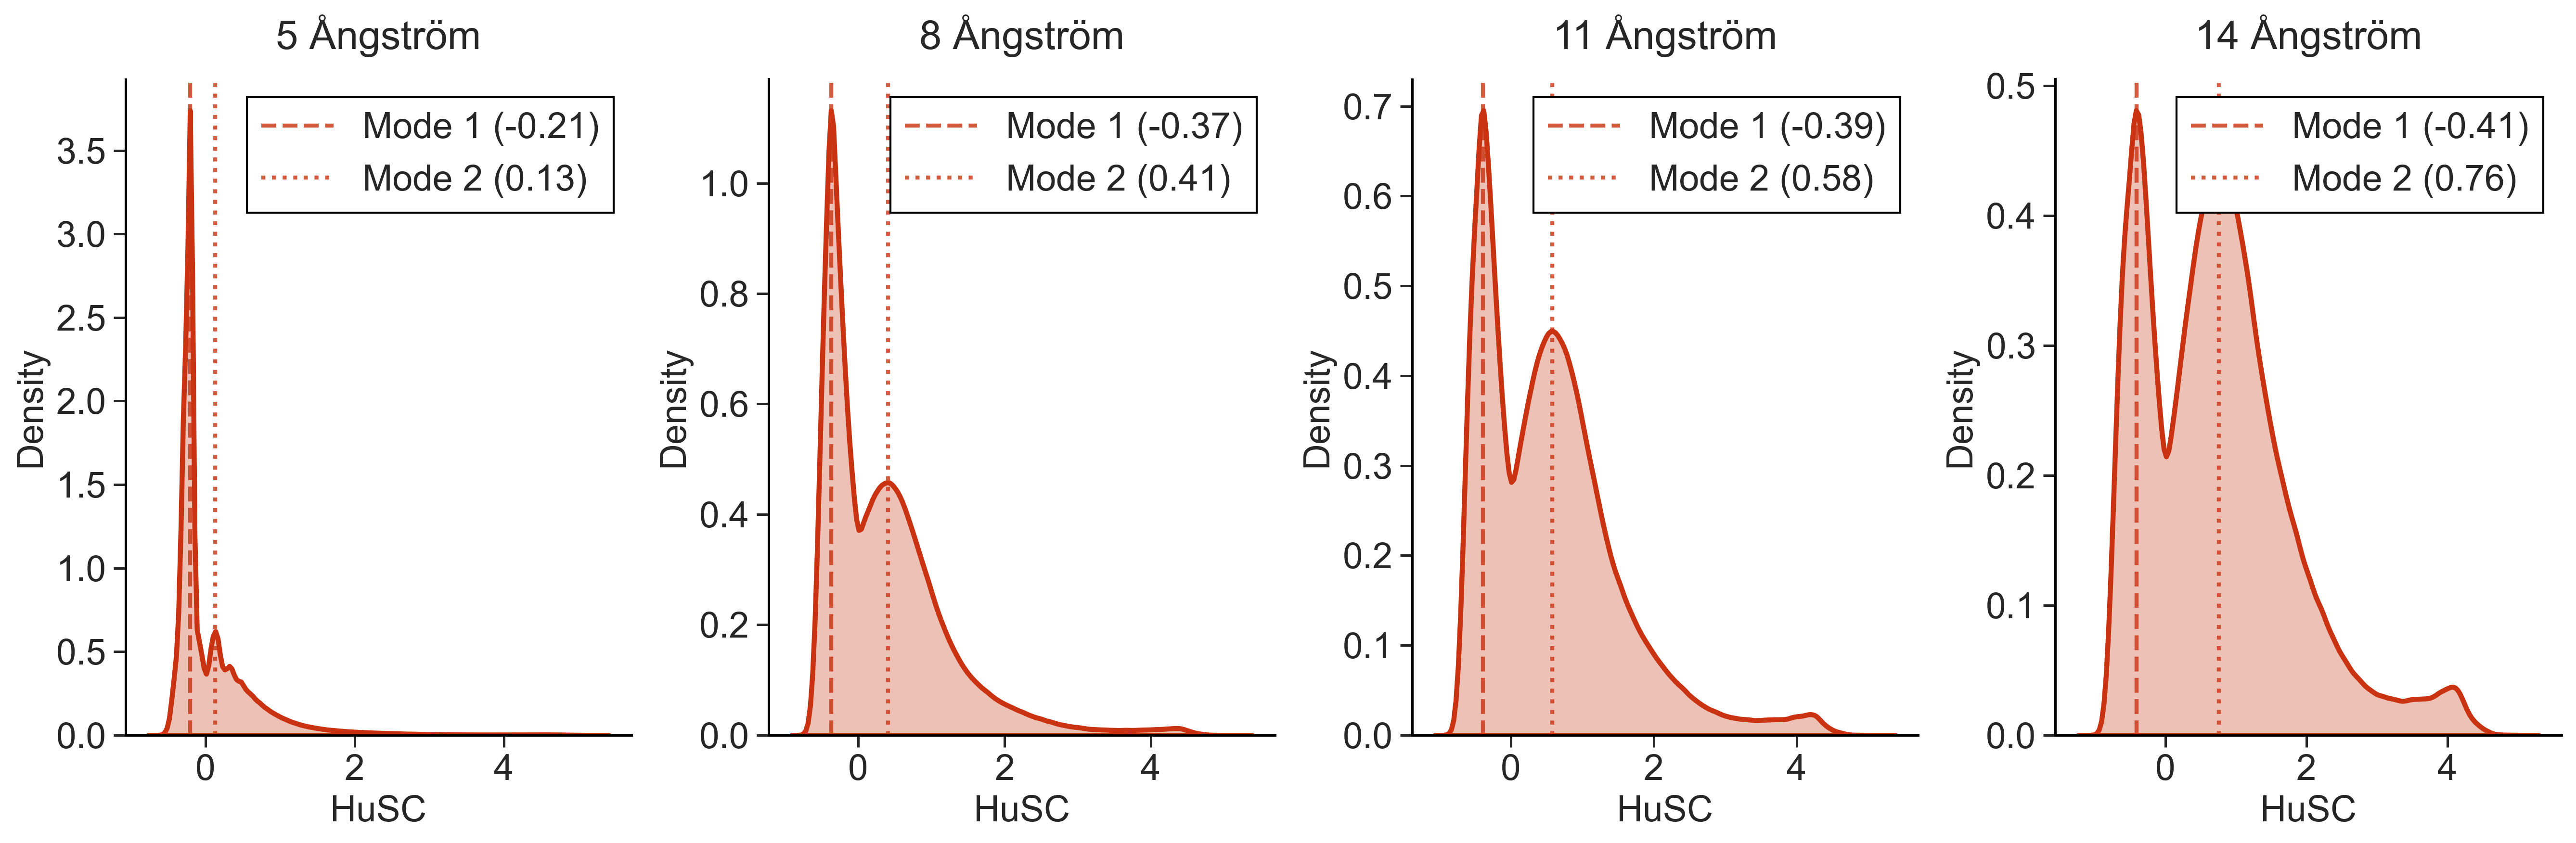

In [ ]:
#@title S2A

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pypalettes import load_cmap
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde

# --- Configuration  ---
FIGURE_SIZE = (18, 6)  # Wider to accommodate three plots
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 18
FONT_SIZE_LEGEND = 18
FONT_SIZE_TEXT = 15
FONT_SIZE_TITLE = 20
SPINE_WIDTH = 1.2

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# Load color palette
colors = load_cmap('Royal1').colors

# Data files and titles
datasets = [
    ('all_HuSC_5_values.txt', '5 Ångström'),
    ('all_husc_values.txt', '8 Ångström'),
    ('all_HuSC_11_values.txt', '11 Ångström'),
    ('all_HuSC_14_values.txt', '14 Ångström')

]

# --- Create figure with subplots ---
fig, axes = plt.subplots(1, 4, figsize=FIGURE_SIZE, dpi=DPI)

for idx, (data_file, title) in enumerate(datasets):
    ax = axes[idx]

    # --- Load data ---
    df = pd.read_csv(data_file, header=None, names=['HuSC'])
    print(f"{title} - Total number of residues: {len(df)}")

    df['HuSC'] = pd.to_numeric(df['HuSC'], errors='coerce')

    # KDE plot
    sns.kdeplot(df['HuSC'], color=colors[1], fill=True, alpha=0.3,
                linewidth=2.5, ax=ax)

    # Find the two highest modes
    kde = gaussian_kde(df['HuSC'].dropna())
    x_range = np.linspace(df['HuSC'].min(), df['HuSC'].max(), 1000)
    density = kde(x_range)

    # Find peaks in the density
    peaks, properties = find_peaks(density, prominence=0.01)

    # Sort peaks by density height and get the two highest
    if len(peaks) >= 2:
        peak_heights = density[peaks]
        top_two_indices = np.argsort(peak_heights)[-2:]
        top_two_peaks = peaks[top_two_indices]
        mode_positions = x_range[top_two_peaks]

        # Sort by position for consistent labeling
        mode_positions = np.sort(mode_positions)

        # Plot vertical lines for the two modes
        ax.axvline(mode_positions[0], color=colors[1], linestyle='--',
                   linewidth=2, alpha=0.8, label=f'Mode 1 ({mode_positions[0]:.2f})')
        ax.axvline(mode_positions[1], color=colors[1], linestyle=':',
                   linewidth=2, alpha=0.8, label=f'Mode 2 ({mode_positions[1]:.2f})')
    elif len(peaks) == 1:
        # Only one peak found
        mode_position = x_range[peaks[0]]
        ax.axvline(mode_position, color=colors[1], linestyle='--',
                   linewidth=2, alpha=0.8, label=f'Mode ({mode_position:.2f})')
    else:
        # No distinct peaks, fall back to median
        median_val = df['HuSC'].median()
        ax.axvline(median_val, color=colors[1], linestyle='--',
                   linewidth=2, alpha=0.8, label=f'Median ({median_val:.2f})')

    # Add title
    arial_font_title = fm.FontProperties(fname="arial.ttf", size=FONT_SIZE_TITLE, weight='bold')
    ax.set_title(title, fontproperties=arial_font_title, pad=15)

    # Labels and formatting
    ax.set_xlabel("HuSC", fontsize=FONT_SIZE_LABELS,
                  fontweight='bold', fontproperties=arial_font)
    ax.set_ylabel("Density", fontsize=FONT_SIZE_LABELS,
                  fontweight='bold', fontproperties=arial_font)

    # Tick formatting
    ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS,
                   width=SPINE_WIDTH, bottom=True, left=True)

    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(arial_font)
        label.set_fontsize(FONT_SIZE_TICKS)

    # Create Arial font with the desired size
    arial_font_legend = fm.FontProperties(fname="arial.ttf", size=FONT_SIZE_LEGEND)

    # Legend
    legend = ax.legend(fontsize=FONT_SIZE_LEGEND, frameon=True, fancybox=False,
                       edgecolor='black', framealpha=1, loc='upper right',
                       prop=arial_font_legend)

    # Spines
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_linewidth(SPINE_WIDTH)
        ax.spines[spine].set_color('black')

plt.tight_layout()

# Save the figure
plt.savefig('HuSC_density_combined.svg', dpi=DPI, bbox_inches='tight')

plt.show()

Pathogenic variants: 6416
Benign variants: 7204


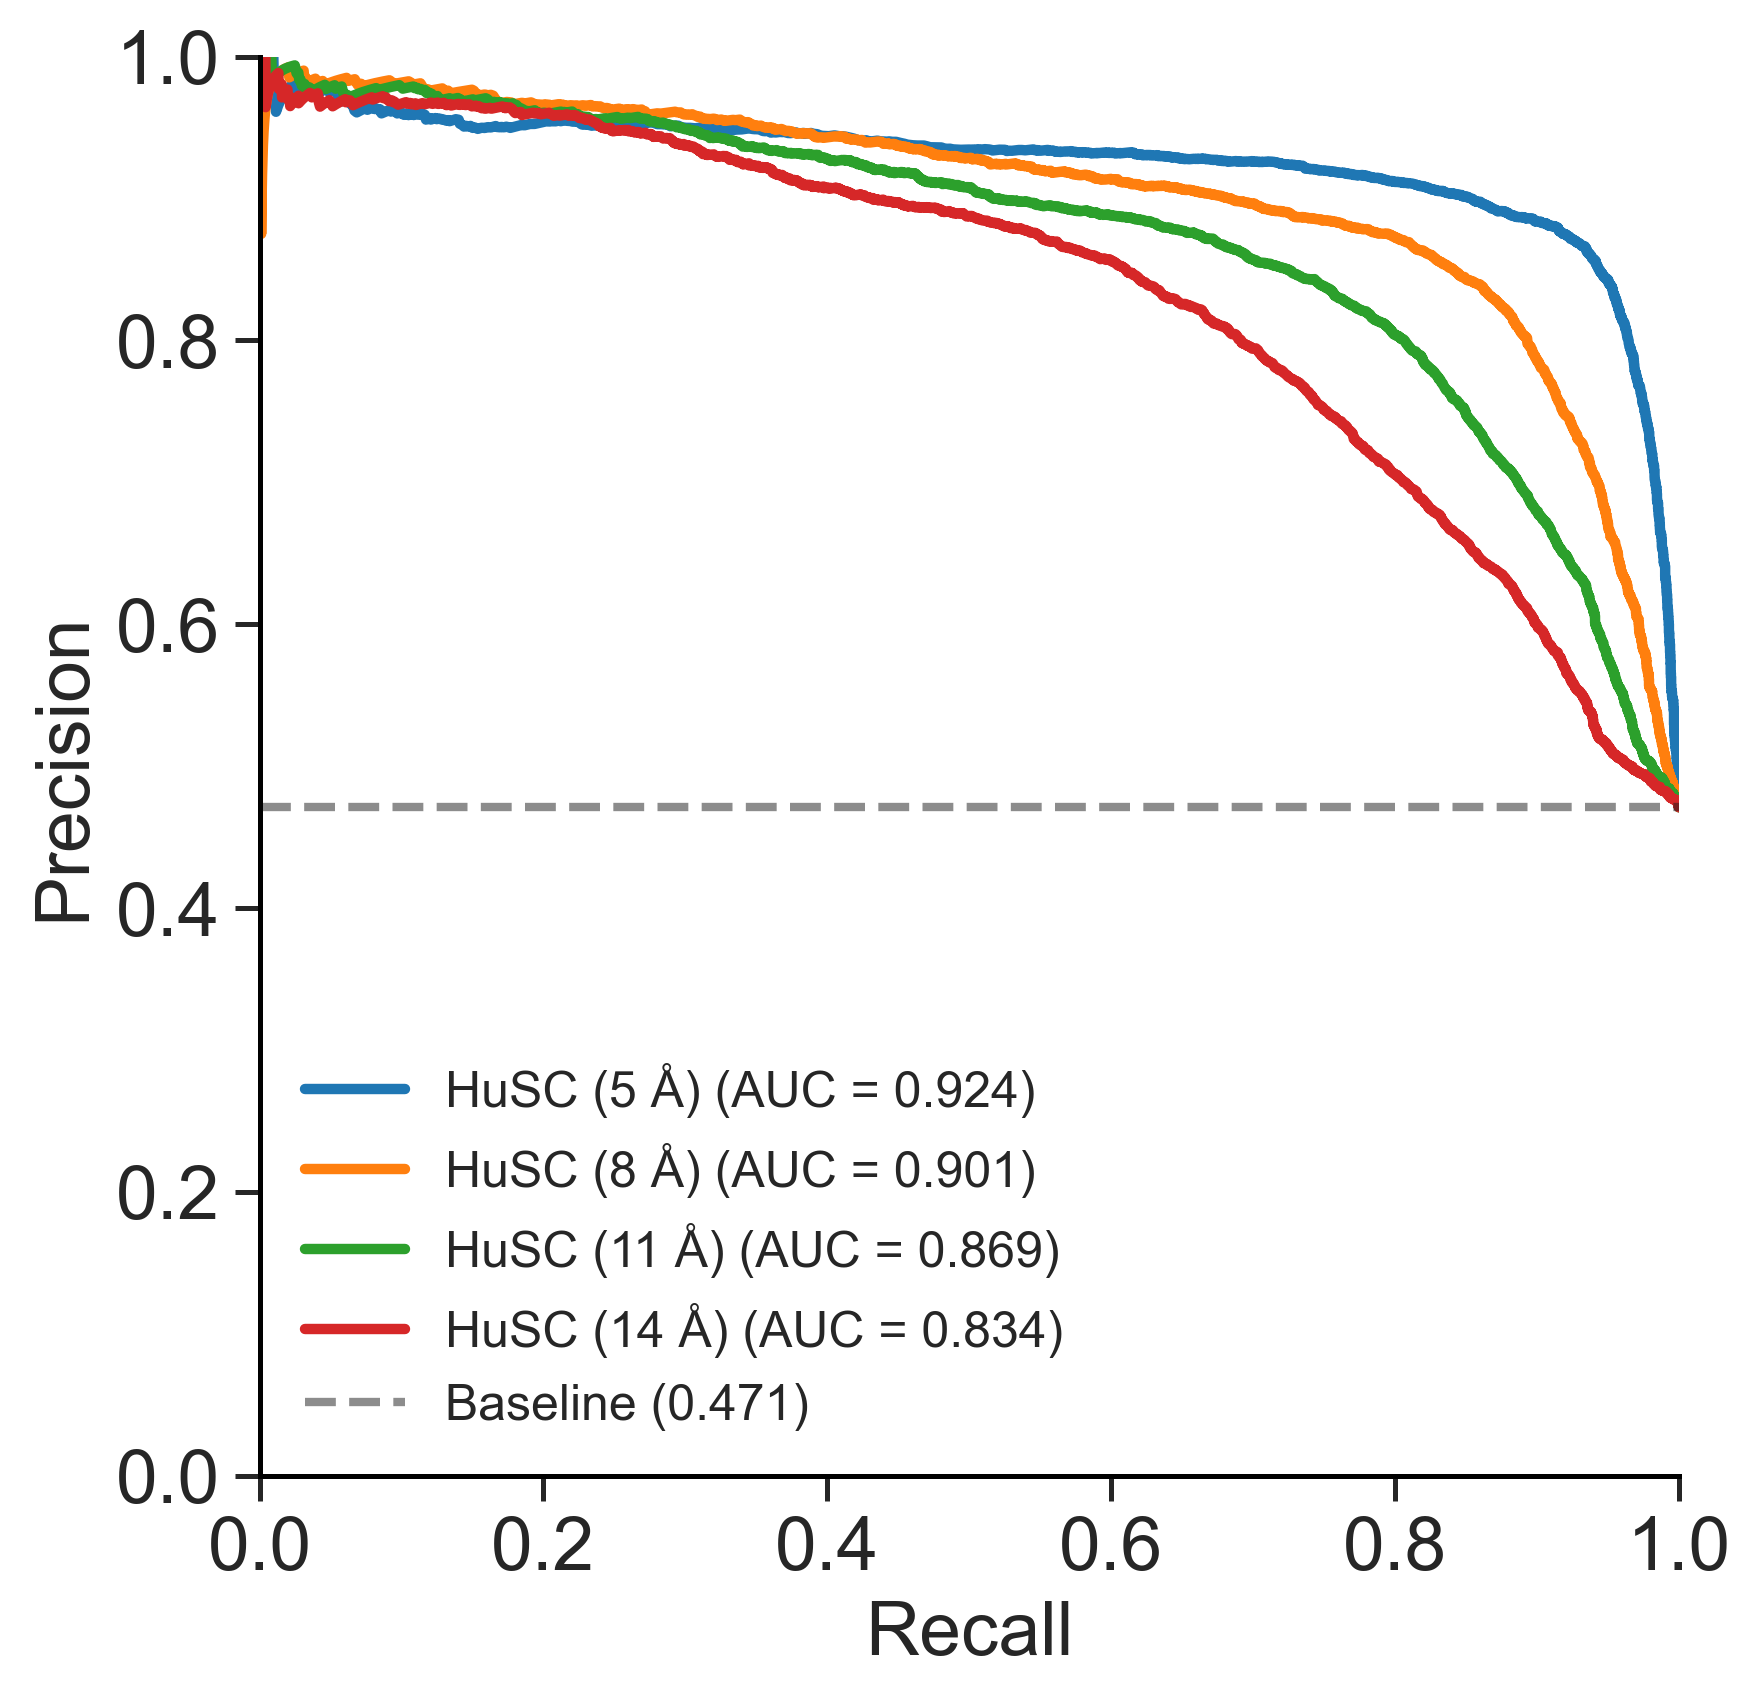

In [ ]:
#@title S2B
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from matplotlib import font_manager as fm

# --- Configuration ---
FIGURE_SIZE = (6, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 18
FONT_SIZE_LEGEND = 12
SPINE_WIDTH = 1.2
LINE_WIDTH = 2.5

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# Get distinct colors
colors_list = plt.cm.tab10(np.linspace(0, 1, 10))

# --- Load data ---
df = pd.read_csv('context_clinvar_with_HuSC.csv', header=0)

# Column mapping for plotting
column_labels = {
    'HuSC_5':  'HuSC (5 Å)',
    'HuSC':    'HuSC (8 Å)',
    'HuSC_11': 'HuSC (11 Å)',
    'HuSC_14': 'HuSC (14 Å)',
}

columns_to_plot = list(column_labels.keys())
label_column = 'label'

# Drop missing data
df = df.dropna(subset=columns_to_plot + [label_column]).copy()

print("Pathogenic variants:", len(df[df['label'] == 1]))
print("Benign variants:",     len(df[df['label'] == 0]))

# --- Invert scores (higher = more pathogenic) ---
for col in columns_to_plot:
    df[col] = -df[col]

# --- Create PR Curve Figure ---
fig_pr, ax_pr = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

# Baseline (random classifier)
baseline = len(df[df[label_column] == 1]) / len(df)

for idx, col in enumerate(columns_to_plot):
    precision, recall, _ = precision_recall_curve(df[label_column].values, df[col].values)
    pr_auc = auc(recall, precision)

    ax_pr.plot(recall, precision,
               color=colors_list[idx],
               linewidth=LINE_WIDTH,
               label=f'{column_labels[col]} (AUC = {pr_auc:.3f})')

# Baseline reference line
ax_pr.axhline(y=baseline, color='k', linestyle='--', linewidth=LINE_WIDTH * 0.8,
              alpha=0.5, label=f'Baseline ({baseline:.3f})')

# Labels and formatting
ax_pr.set_xlabel('Recall', fontsize=FONT_SIZE_LABELS,
                 fontweight='bold', fontproperties=arial_font)
ax_pr.set_ylabel('Precision', fontsize=FONT_SIZE_LABELS,
                 fontweight='bold', fontproperties=arial_font)
ax_pr.set_xlim([0.0, 1.0])
ax_pr.set_ylim([0.0, 1.0])
ax_pr.set_aspect('equal')

# Legend
legend = ax_pr.legend(loc='lower left', frameon=False, fontsize=FONT_SIZE_LEGEND)
for text in legend.get_texts():
    text.set_fontproperties(arial_font)

# Tick formatting
ax_pr.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS,
                  width=SPINE_WIDTH, bottom=True, left=True)

for label in ax_pr.get_xticklabels() + ax_pr.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(FONT_SIZE_TICKS)

# Spines
for spine in ['top', 'right']:
    ax_pr.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax_pr.spines[spine].set_linewidth(SPINE_WIDTH)
    ax_pr.spines[spine].set_color('black')

plt.tight_layout()
plt.savefig("pr_curves_angstrom.svg", dpi=DPI, bbox_inches='tight')
# plt.savefig("pr_curves_angstrom.png", dpi=DPI, bbox_inches='tight')
plt.show()

Pathogenic variants: 6416
Benign variants: 7204

=== PR AUC Results ===
HuSC        : 0.9015 ± 0.0036
ConSurf     : 0.7873 ± 0.0060
PhyloP      : 0.7546 ± 0.0061
COSMIS      : 0.7353 ± 0.0054
GERP        : 0.6024 ± 0.0068
PhastCons   : 0.6018 ± 0.0062
MTR3D       : 0.6811 ± 0.0055

=== Sorted by PR AUC (Descending) ===
HuSC        : 0.9015 ± 0.0036
ConSurf     : 0.7873 ± 0.0060
PhyloP      : 0.7546 ± 0.0061
COSMIS      : 0.7353 ± 0.0054
MTR3D       : 0.6811 ± 0.0055
GERP        : 0.6024 ± 0.0068
PhastCons   : 0.6018 ± 0.0062


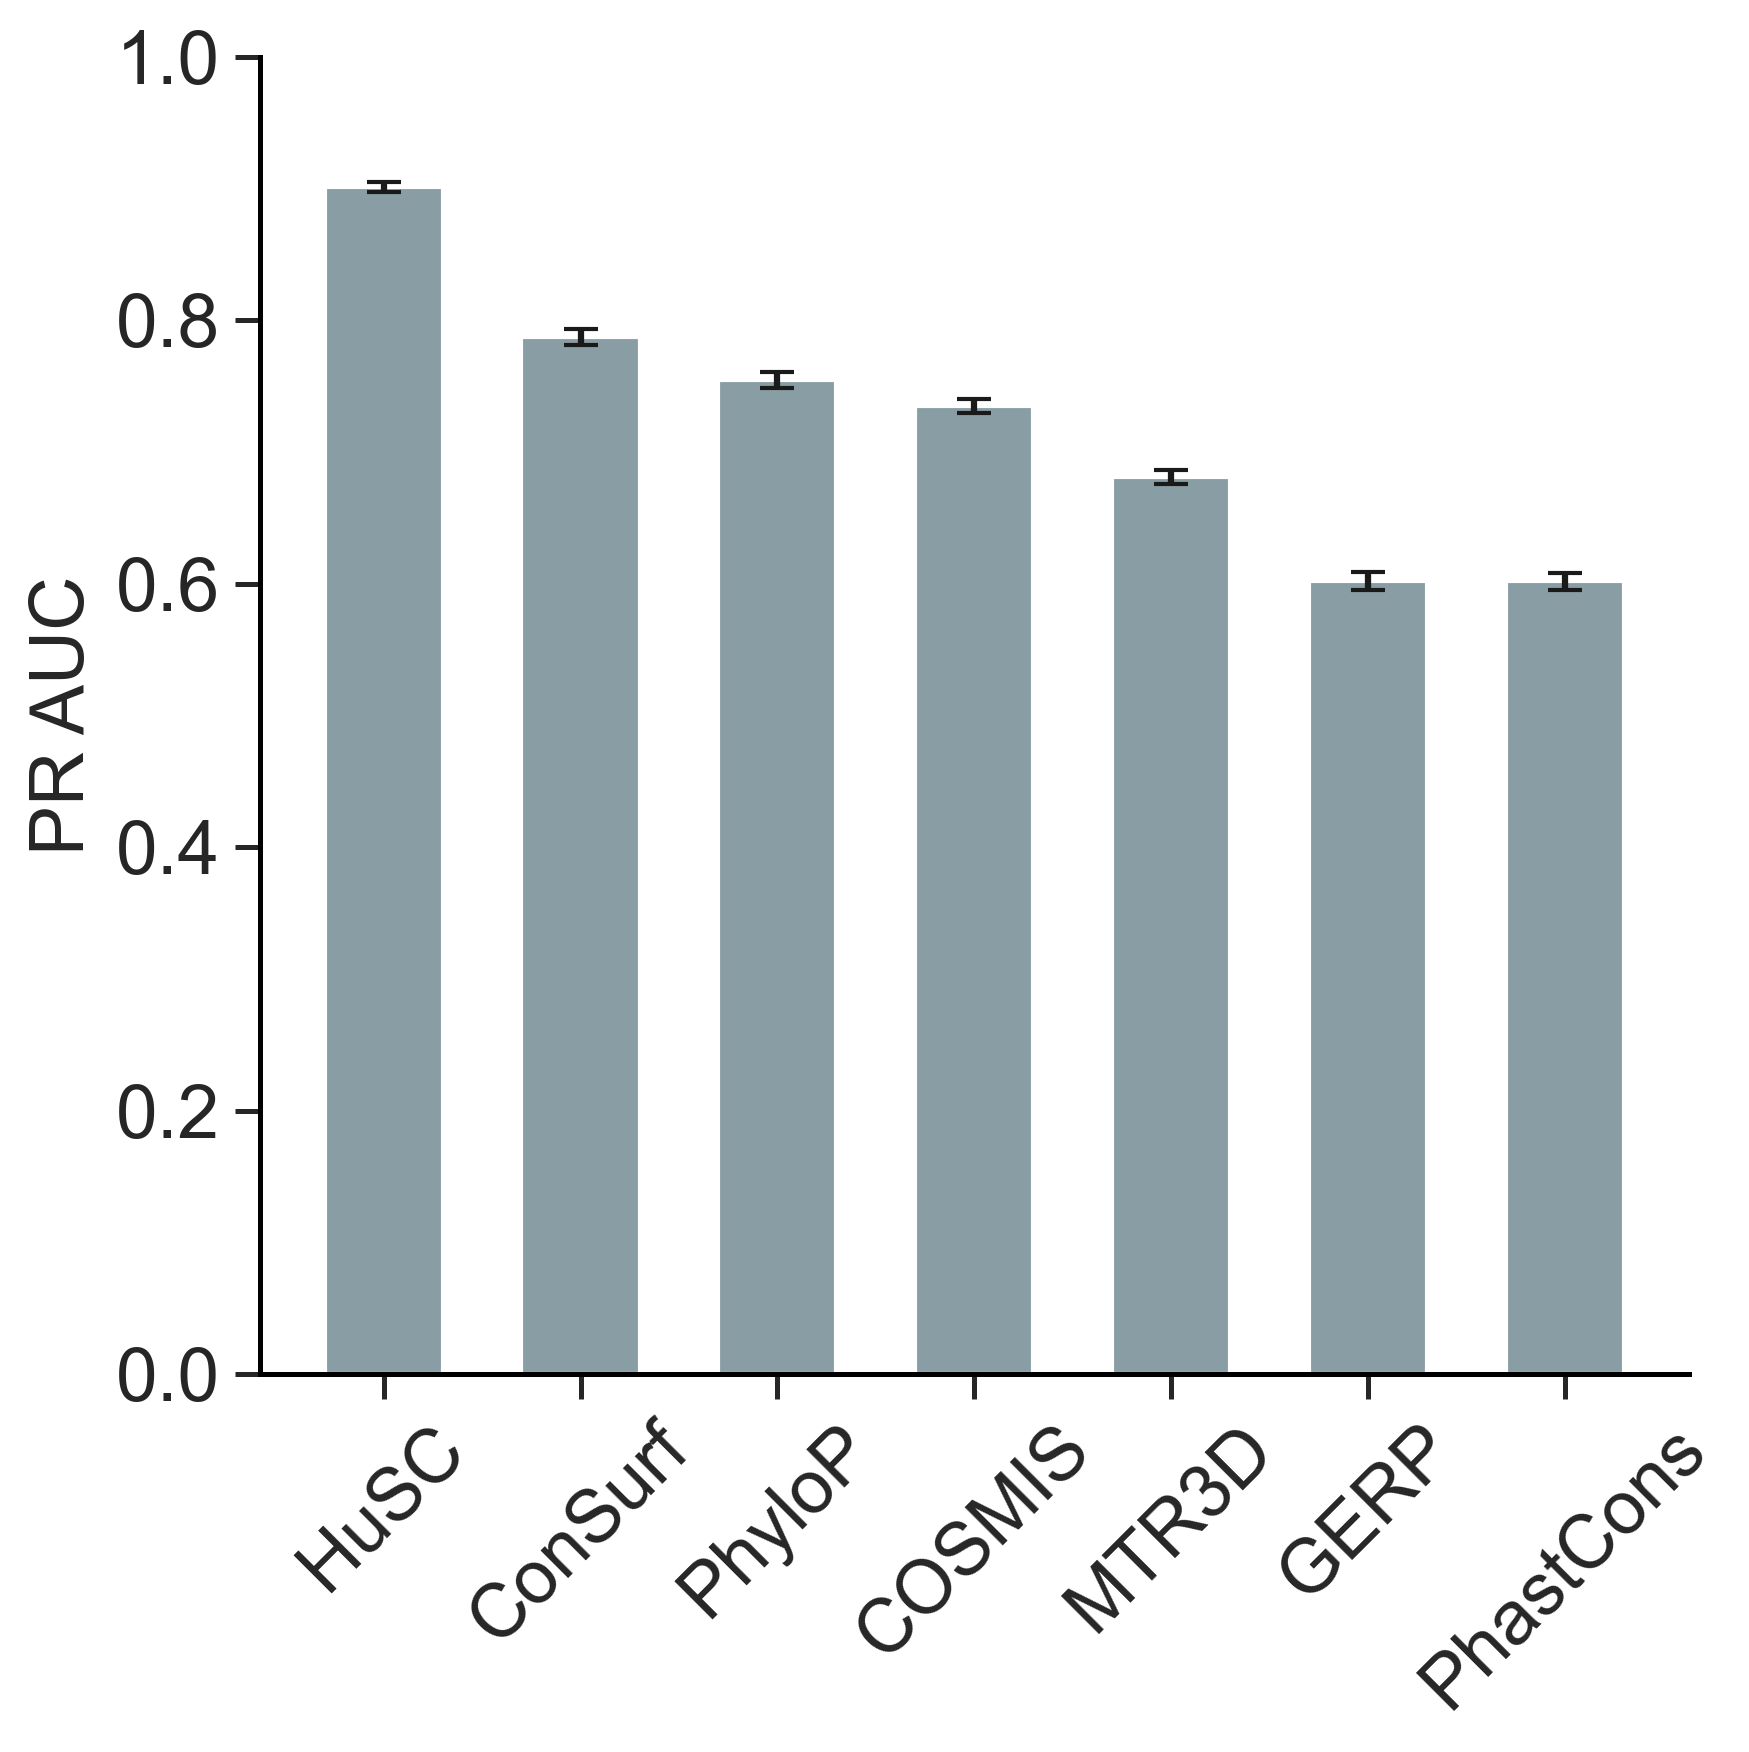

In [ ]:
#@title S3A

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from pypalettes import load_cmap
from matplotlib import font_manager as fm

# --- Configuration ---
FIGURE_SIZE = (6, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 18
SPINE_WIDTH = 1.2

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# Load color palette
colors = load_cmap('Royal1').colors

# --- Load data ---
df = pd.read_csv('context_clinvar_with_HuSC.csv', header=0)

# Column mapping for plotting
column_labels = {
    'HuSC': 'HuSC',
    'consurf': 'ConSurf',
    'phylop': 'PhyloP',
    'cosmis': 'COSMIS',
    'gerp': 'GERP',
    'phastcons': 'PhastCons',
    'mtr3d': 'MTR3D'
}

columns_to_plot = list(column_labels.keys())
label_column = 'label'

# Drop missing data
df = df.dropna(subset=columns_to_plot + [label_column]).copy()

print("Pathogenic variants:", len(df[df['label'] == 1]))
print("Benign variants:", len(df[df['label'] == 0]))

# --- Invert scores as needed ---
for col in ['HuSC', 'consurf', 'cosmis', 'mtr3d']:
    df[col] = -df[col]

# --- Helper function ---
def bootstrap_auc(y_true, y_pred, auc_function, n_bootstraps=1000):
    rng = np.random.default_rng(42)
    scores = []
    for _ in range(n_bootstraps):
        idx = rng.integers(0, len(y_true), len(y_true))
        if len(np.unique(y_true[idx])) < 2:
            continue
        scores.append(auc_function(y_true[idx], y_pred[idx]))
    return np.mean(scores), np.std(scores)

# --- Compute PR AUC ---
pr_results = {col: bootstrap_auc(df[label_column].values,
                                  df[col].values, average_precision_score)
               for col in columns_to_plot}

# --- Print PR AUC values ---
print("\n=== PR AUC Results ===")
for col in columns_to_plot:
    mean_auc, std_auc = pr_results[col]
    print(f"{column_labels[col]:12s}: {mean_auc:.4f} ± {std_auc:.4f}")

# --- Prepare results ---
pr_means = np.array([pr_results[col][0] for col in columns_to_plot])
pr_stds = np.array([pr_results[col][1] for col in columns_to_plot])

# Sort by AUC (descending)
pr_order = np.argsort(-pr_means)

print("\n=== Sorted by PR AUC (Descending) ===")
for i in pr_order:
    col = columns_to_plot[i]
    mean_auc, std_auc = pr_results[col]
    print(f"{column_labels[col]:12s}: {mean_auc:.4f} ± {std_auc:.4f}")

# --- Create figure ---
fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

x = np.arange(len(columns_to_plot))

ax.bar(x, pr_means[pr_order], yerr=pr_stds[pr_order],
       capsize=4, width=0.6, color=colors[0])

# Labels and formatting
ax.set_xticks(x)
ax.set_xticklabels([column_labels[columns_to_plot[i]] for i in pr_order],
                   ha='center', rotation=45)
ax.set_ylabel("PR AUC", fontsize=FONT_SIZE_LABELS,
              fontweight='bold', fontproperties=arial_font)
ax.set_ylim(0, 1)

# Tick formatting
ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS,
               width=SPINE_WIDTH, bottom=True, left=True)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(FONT_SIZE_TICKS)

# Spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
    ax.spines[spine].set_color('black')

plt.tight_layout()

# Save the figure
plt.savefig("pr_auc_barplot.svg", dpi=DPI, bbox_inches='tight')
# plt.savefig("pr_auc_barplot.png", dpi=DPI, bbox_inches='tight')

plt.show()

Pathogenic variants: 6416
Benign variants: 7204


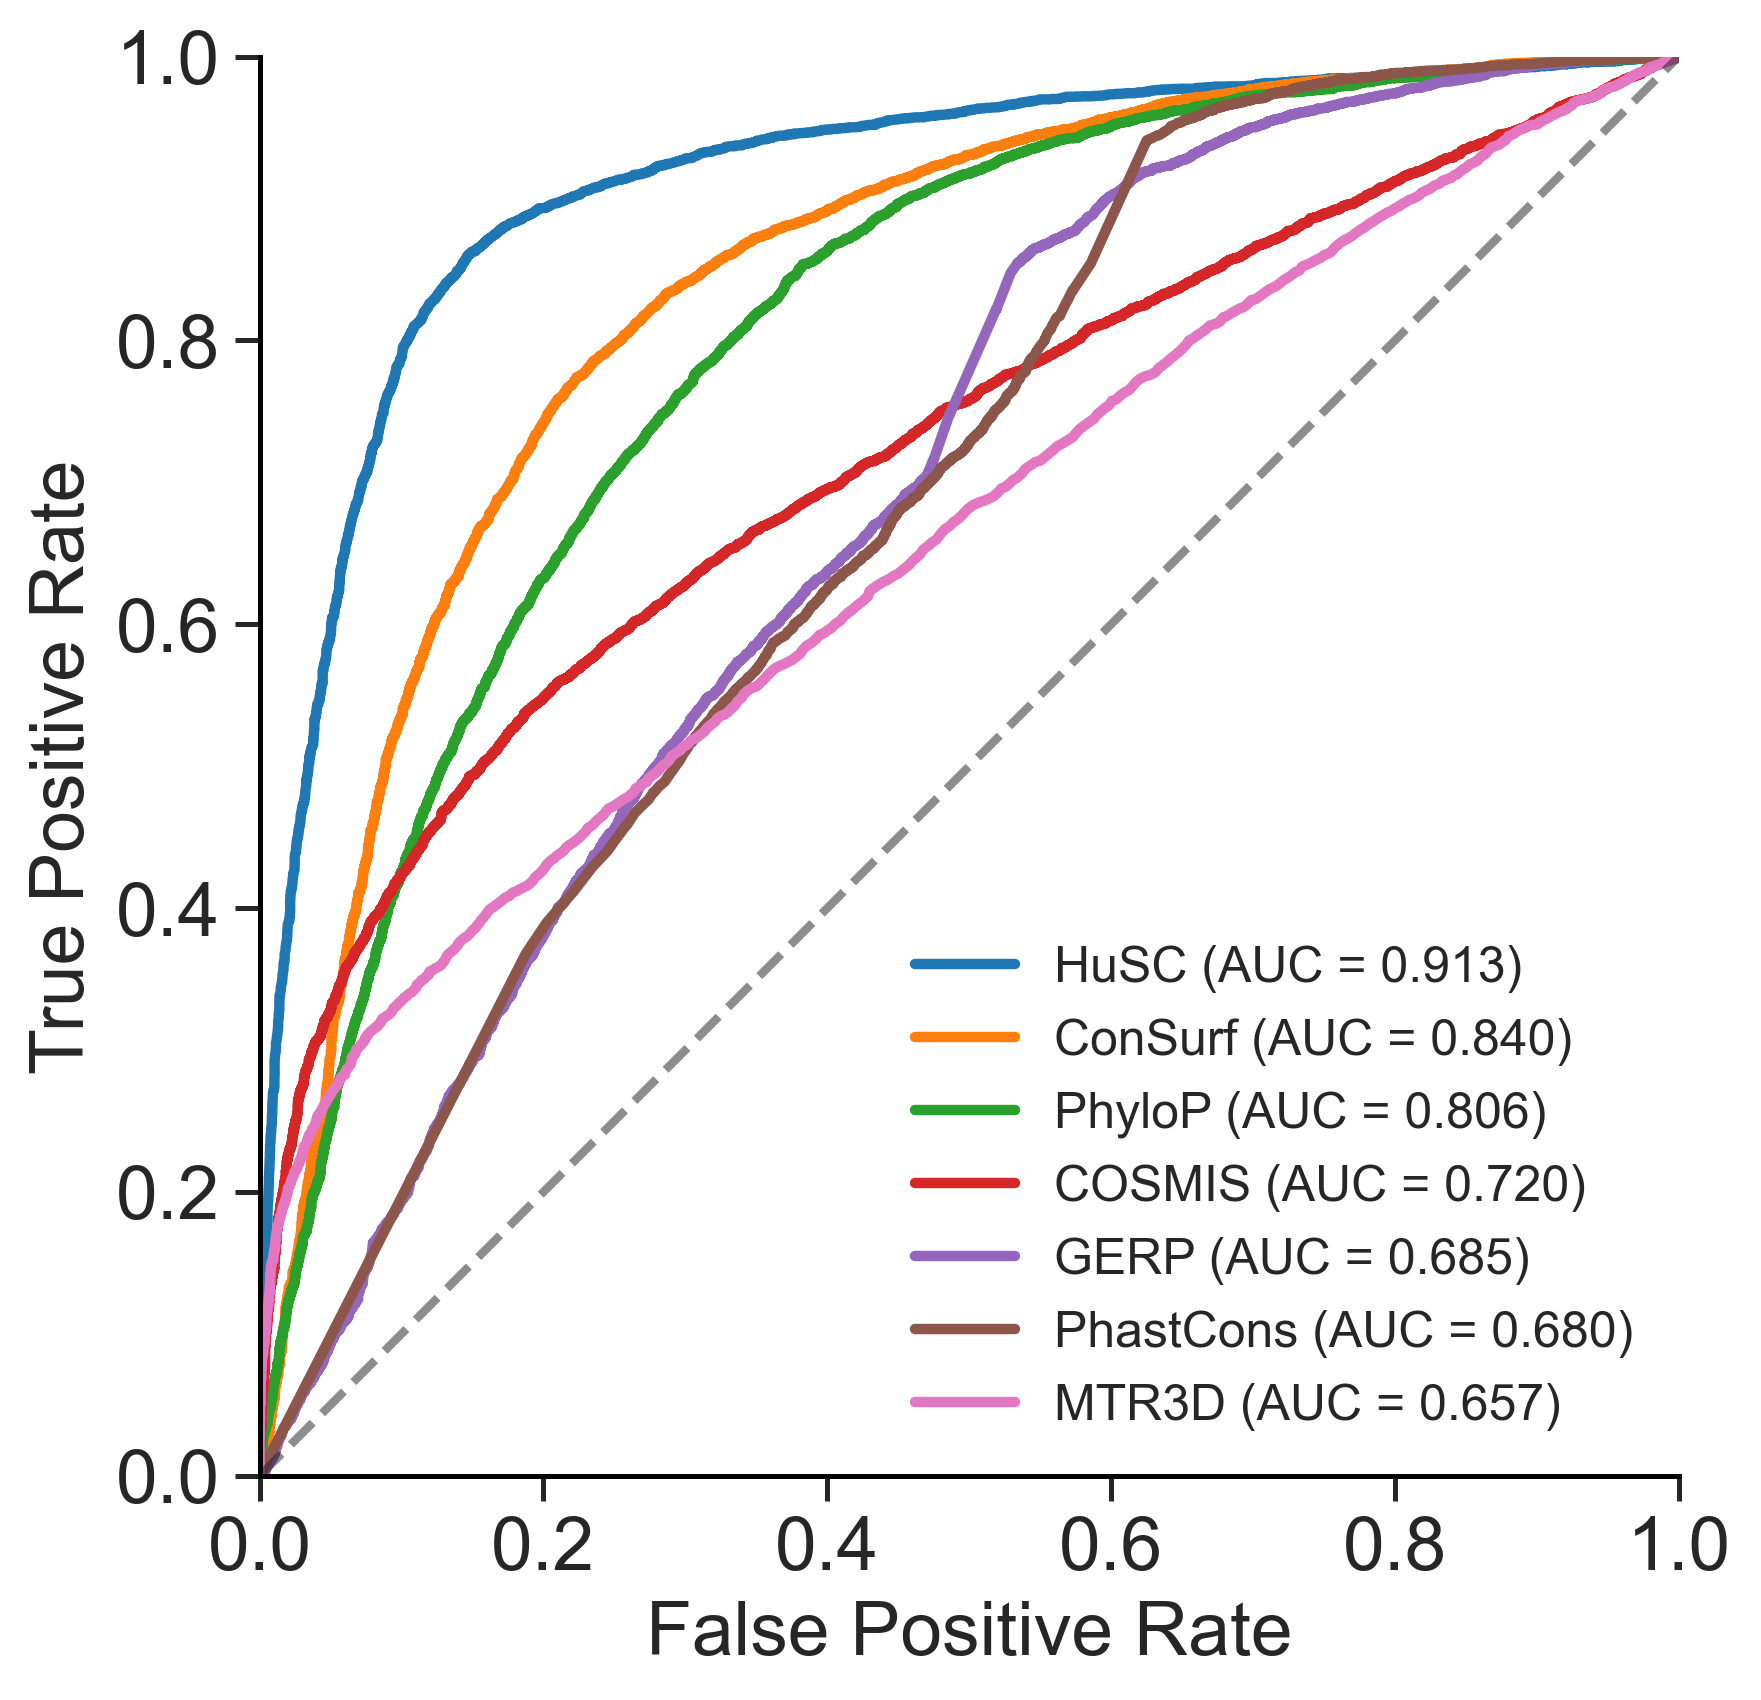

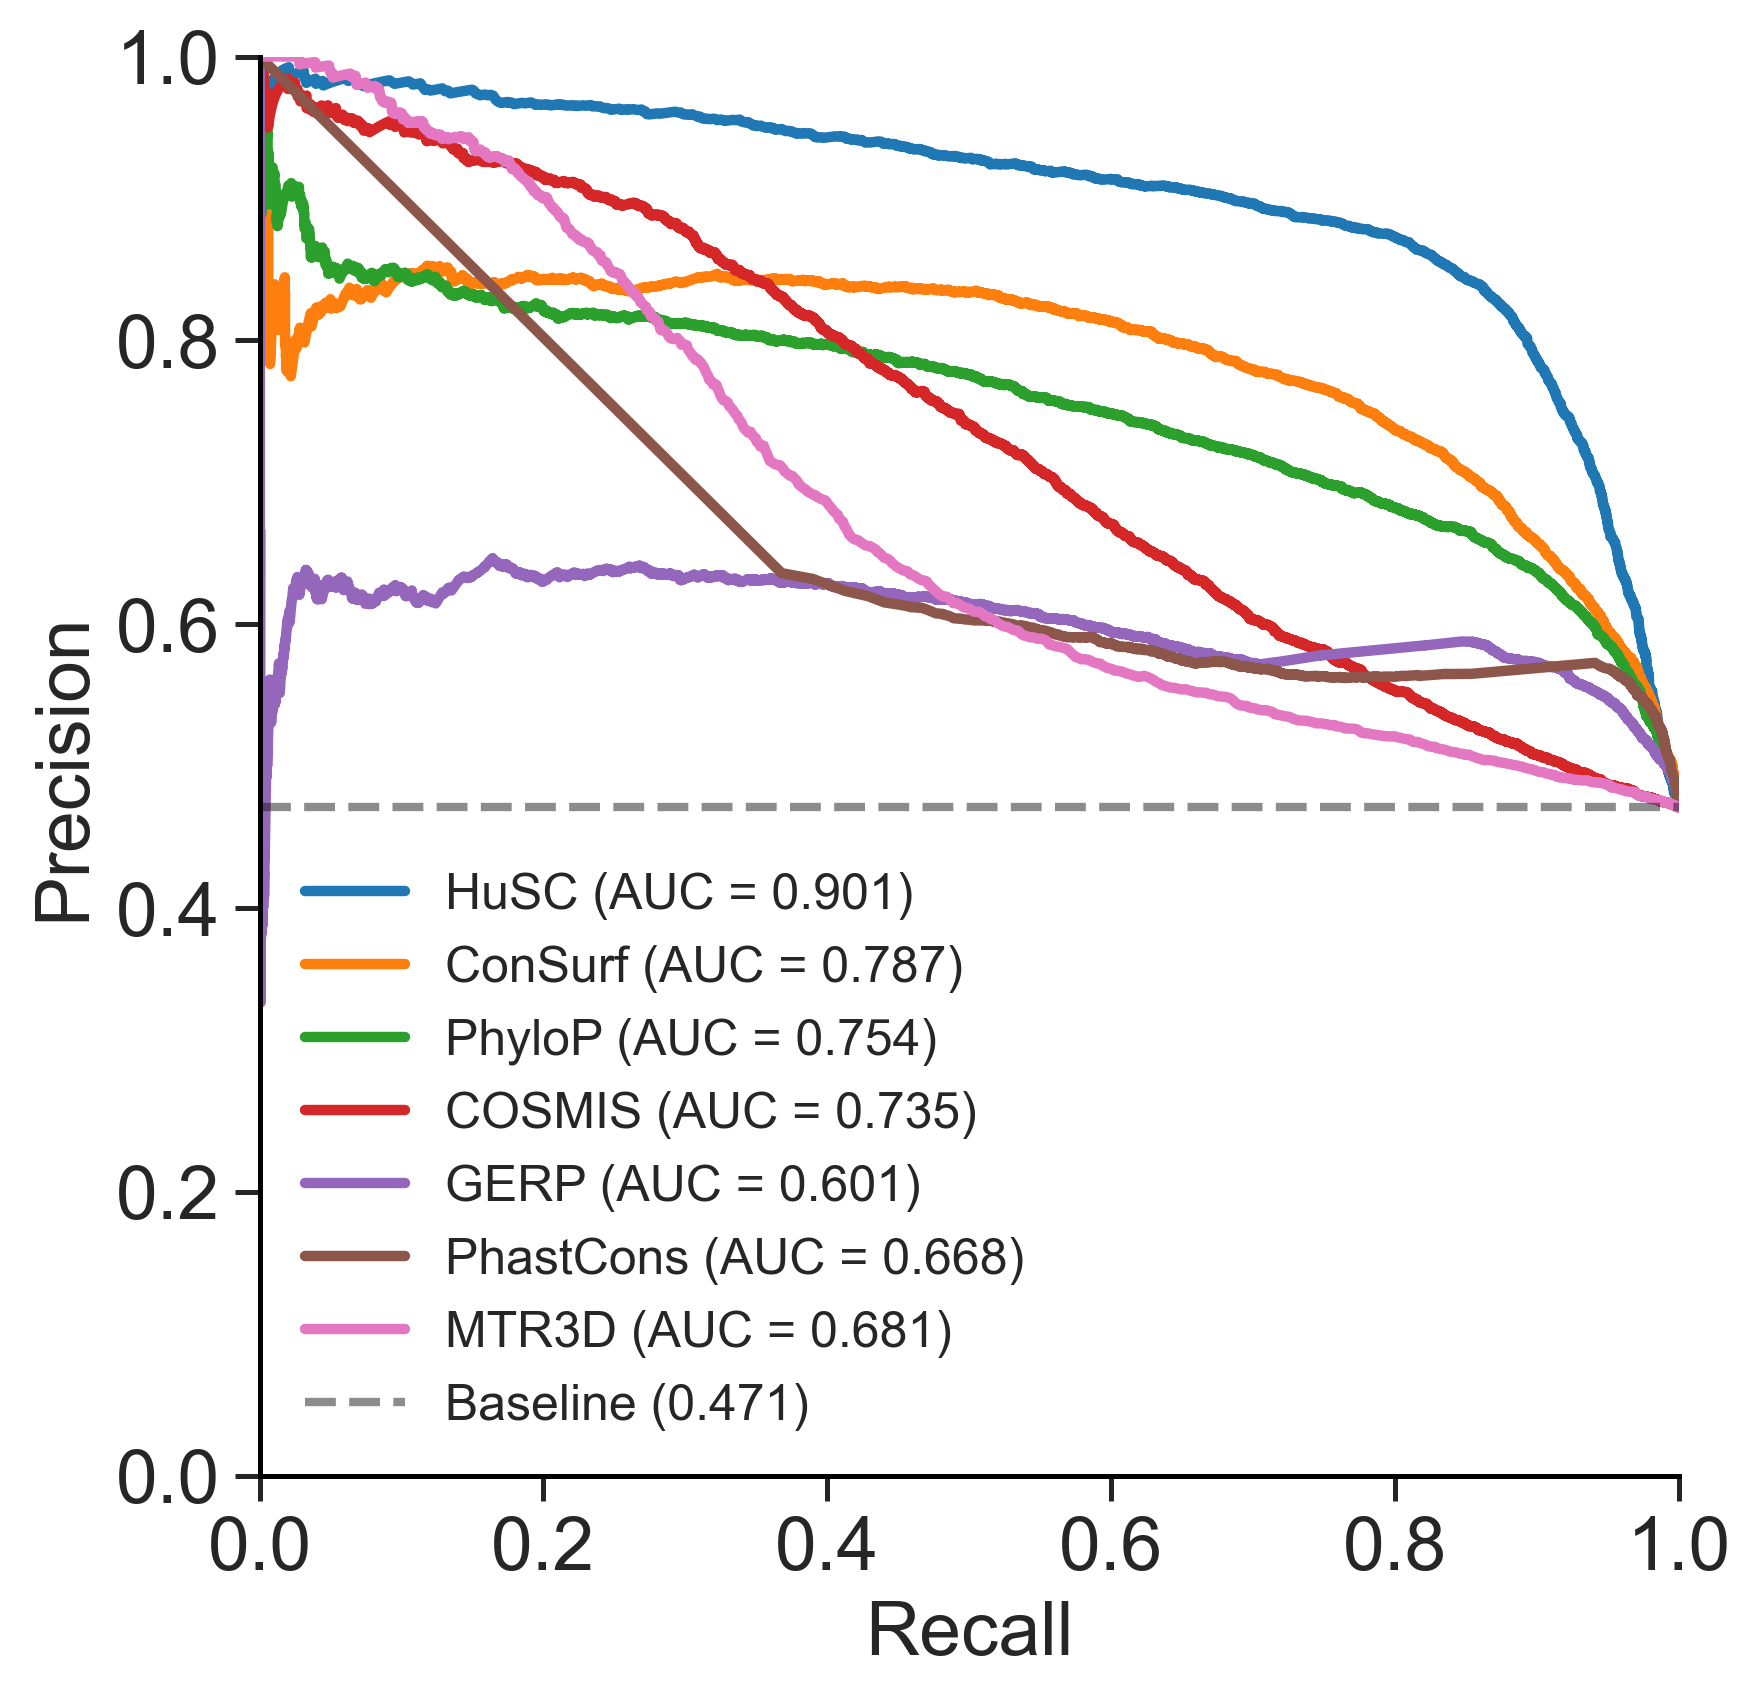

In [ ]:
#@title S3B and S3C
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from pypalettes import load_cmap
from matplotlib import font_manager as fm

# --- Configuration ---
FIGURE_SIZE = (6, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 18
FONT_SIZE_LEGEND = 12
SPINE_WIDTH = 1.2
LINE_WIDTH = 2.5

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# Load color palette
cmap = load_cmap('Royal1')
# Get distinct colors for each method
colors_list = plt.cm.tab10(np.linspace(0, 1, 10))

# --- Load data ---
df = pd.read_csv('context_clinvar_with_HuSC.csv', header=0)

# Column mapping for plotting
column_labels = {
    'HuSC': 'HuSC',
    'consurf': 'ConSurf',
    'phylop': 'PhyloP',
    'cosmis': 'COSMIS',
    'gerp': 'GERP',
    'phastcons': 'PhastCons',
    'mtr3d': 'MTR3D'
}

columns_to_plot = list(column_labels.keys())
label_column = 'label'

# Drop missing data
df = df.dropna(subset=columns_to_plot + [label_column]).copy()

print("Pathogenic variants:", len(df[df['label'] == 1]))
print("Benign variants:", len(df[df['label'] == 0]))

# --- Invert scores as needed ---
for col in ['HuSC', 'consurf', 'cosmis', 'mtr3d']:
    df[col] = -df[col]

# --- Create ROC Curve Figure ---
fig_roc, ax_roc = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

for idx, col in enumerate(columns_to_plot):
    fpr, tpr, _ = roc_curve(df[label_column].values, df[col].values)
    roc_auc = auc(fpr, tpr)

    ax_roc.plot(fpr, tpr,
                color=colors_list[idx],
                linewidth=LINE_WIDTH,
                label=f'{column_labels[col]} (AUC = {roc_auc:.3f})')

# Plot diagonal reference line
ax_roc.plot([0, 1], [0, 1], 'k--', linewidth=LINE_WIDTH*0.8, alpha=0.5)

# Labels and formatting
ax_roc.set_xlabel('False Positive Rate', fontsize=FONT_SIZE_LABELS,
                   fontweight='bold', fontproperties=arial_font)
ax_roc.set_ylabel('True Positive Rate', fontsize=FONT_SIZE_LABELS,
                   fontweight='bold', fontproperties=arial_font)
ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.0])
ax_roc.set_aspect('equal')

# Legend
legend = ax_roc.legend(loc='lower right', frameon=False, fontsize=FONT_SIZE_LEGEND)
for text in legend.get_texts():
    text.set_fontproperties(arial_font)

# Tick formatting
ax_roc.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS,
                   width=SPINE_WIDTH, bottom=True, left=True)

for label in ax_roc.get_xticklabels() + ax_roc.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(FONT_SIZE_TICKS)

# Spines
for spine in ['top', 'right']:
    ax_roc.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax_roc.spines[spine].set_linewidth(SPINE_WIDTH)
    ax_roc.spines[spine].set_color('black')

plt.tight_layout()
plt.savefig("roc_curves.svg", dpi=DPI, bbox_inches='tight')
# plt.savefig("roc_curves.png", dpi=DPI, bbox_inches='tight')
plt.show()

# --- Create PR Curve Figure ---
fig_pr, ax_pr = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

# Calculate baseline (random classifier)
baseline = len(df[df[label_column] == 1]) / len(df)

for idx, col in enumerate(columns_to_plot):
    precision, recall, _ = precision_recall_curve(df[label_column].values, df[col].values)
    pr_auc = auc(recall, precision)

    ax_pr.plot(recall, precision,
               color=colors_list[idx],
               linewidth=LINE_WIDTH,
               label=f'{column_labels[col]} (AUC = {pr_auc:.3f})')

# Plot baseline reference line
ax_pr.axhline(y=baseline, color='k', linestyle='--', linewidth=LINE_WIDTH*0.8,
              alpha=0.5, label=f'Baseline ({baseline:.3f})')

# Labels and formatting
ax_pr.set_xlabel('Recall', fontsize=FONT_SIZE_LABELS,
                 fontweight='bold', fontproperties=arial_font)
ax_pr.set_ylabel('Precision', fontsize=FONT_SIZE_LABELS,
                 fontweight='bold', fontproperties=arial_font)
ax_pr.set_xlim([0.0, 1.0])
ax_pr.set_ylim([0.0, 1.0])
ax_pr.set_aspect('equal')

# Legend
legend = ax_pr.legend(loc='lower left', frameon=False, fontsize=FONT_SIZE_LEGEND)
for text in legend.get_texts():
    text.set_fontproperties(arial_font)

# Tick formatting
ax_pr.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS,
                  width=SPINE_WIDTH, bottom=True, left=True)

for label in ax_pr.get_xticklabels() + ax_pr.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(FONT_SIZE_TICKS)

# Spines
for spine in ['top', 'right']:
    ax_pr.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax_pr.spines[spine].set_linewidth(SPINE_WIDTH)
    ax_pr.spines[spine].set_color('black')

plt.tight_layout()
plt.savefig("pr_curves.svg", dpi=DPI, bbox_inches='tight')
# plt.savefig("pr_curves.png", dpi=DPI, bbox_inches='tight')
plt.show()

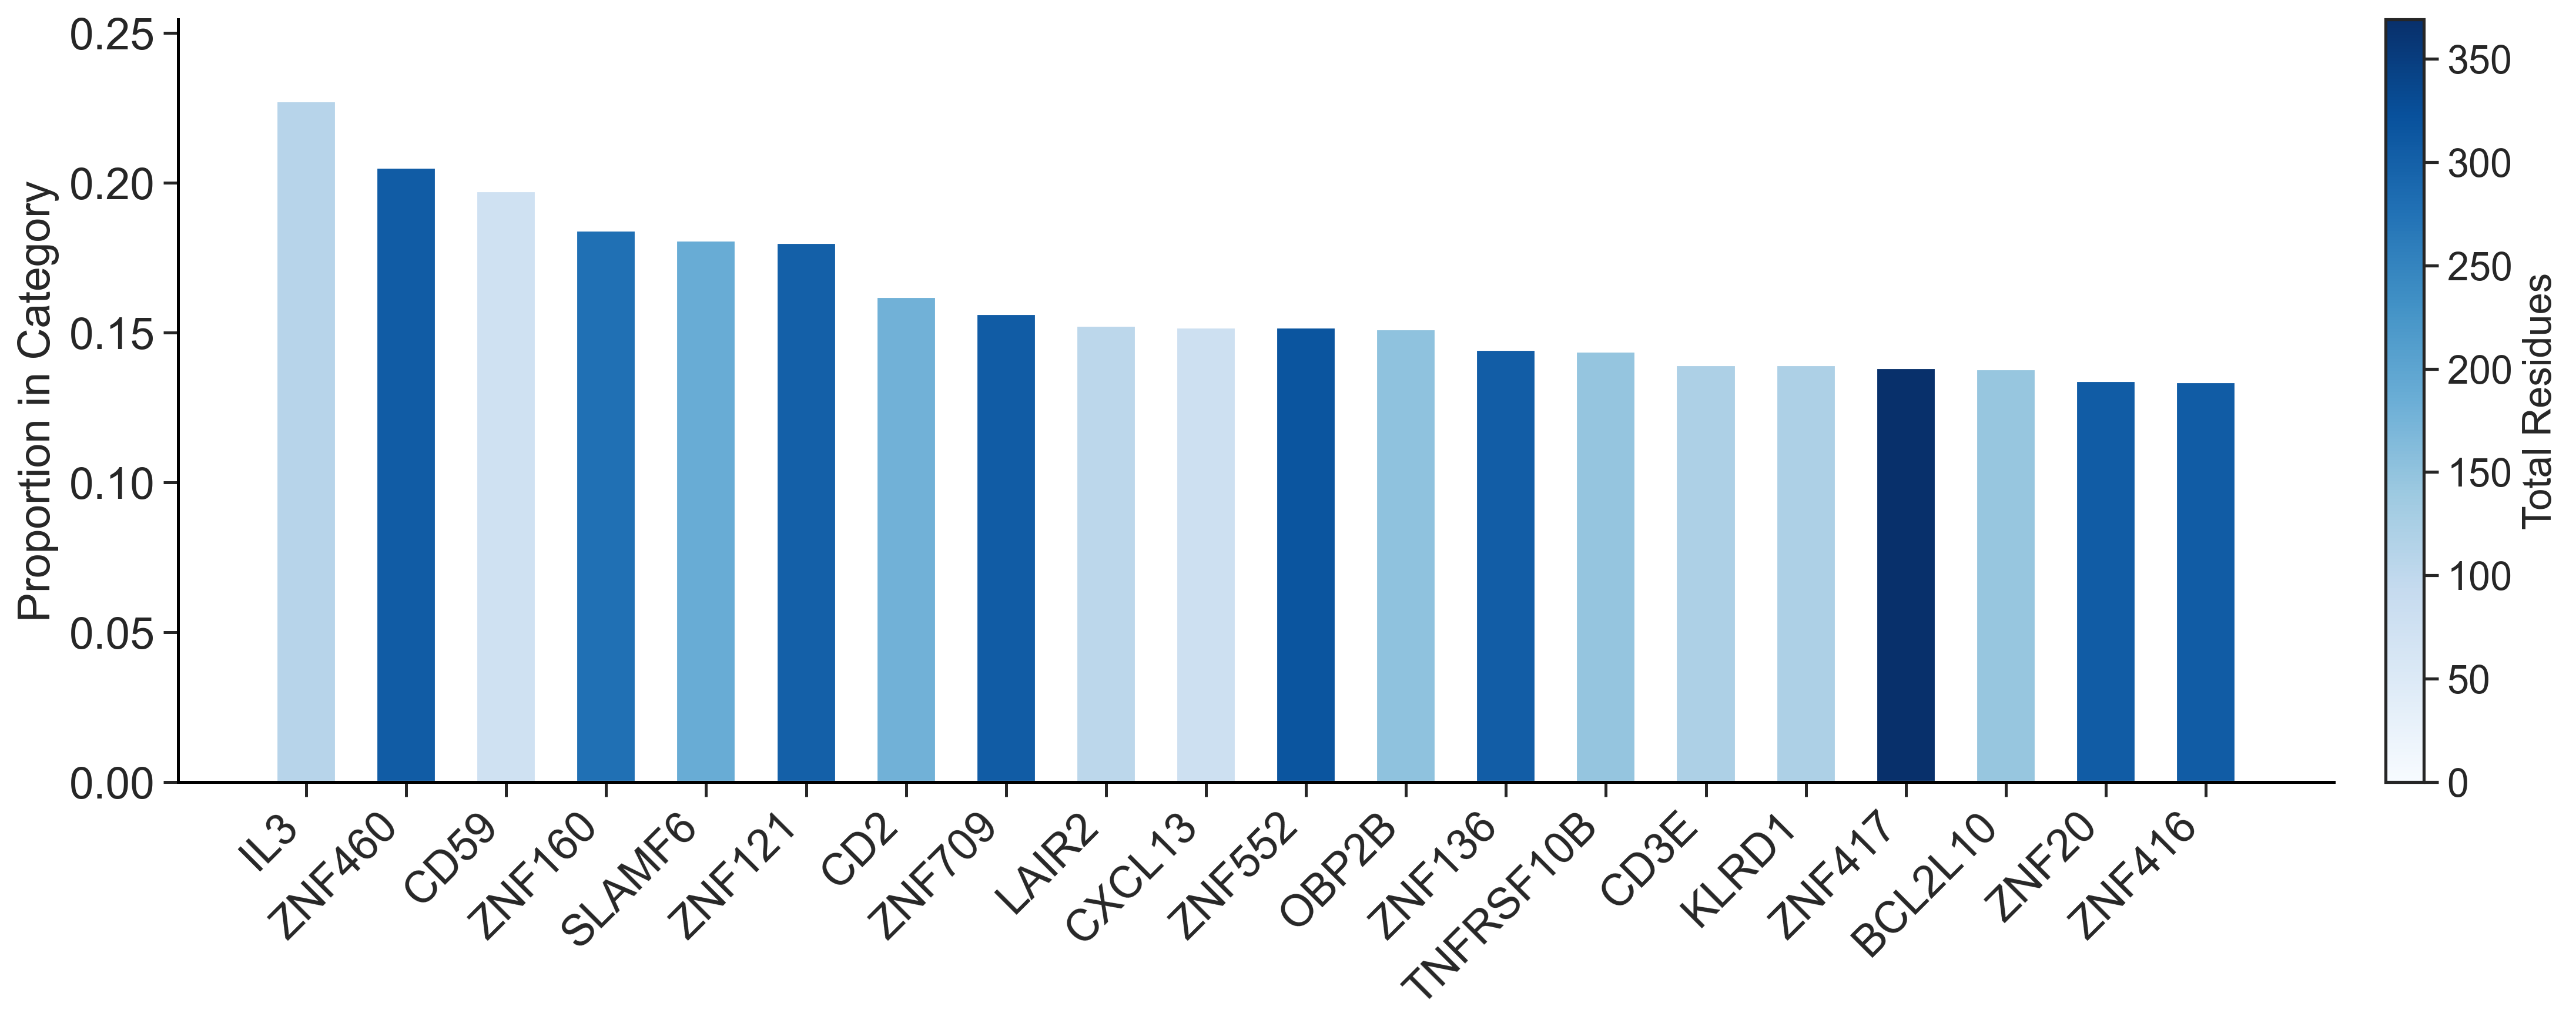

In [ ]:
#@title S4

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from pypalettes import load_cmap
from matplotlib import font_manager as fm

# --- Configuration ---
FIGURE_SIZE = (16, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 18
SPINE_WIDTH = 1.2
TOP_N = 20

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# --- Load data ---
df = pd.read_csv('human_specific_constrained_genes_all.csv', header=0)

# Get top N by proportion_in_category
df_top = df.nlargest(TOP_N, 'proportion_in_category').reset_index(drop=True)

# --- Color mapping based on n_residues_total ---
norm = mcolors.Normalize(vmin=0,
                         vmax=df_top['n_residues_total'].max())
cmap = load_cmap('Blues', cmap_type='continuous')
bar_colors = [cmap(norm(v)) for v in df_top['n_residues_total']]

# --- Create figure ---
fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

x = np.arange(len(df_top))

bars = ax.bar(x, df_top['proportion_in_category'],
              width=0.6, color=bar_colors)

# Colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Total Residues', fontsize=FONT_SIZE_LABELS - 2,
               fontweight='bold', fontproperties=arial_font)
cbar.ax.tick_params(labelsize=FONT_SIZE_TICKS - 2)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(FONT_SIZE_TICKS - 2)

# Labels and formatting
ax.set_xticks(x)
ax.set_xticklabels(df_top['gene_name'], ha='right', rotation=45)
ax.set_ylabel("Proportion in Category", fontsize=FONT_SIZE_LABELS,
              fontweight='bold', fontproperties=arial_font)
ax.set_ylim(0, df_top['proportion_in_category'].max() * 1.12)

# Tick formatting
ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS,
               width=SPINE_WIDTH, bottom=True, left=True)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(FONT_SIZE_TICKS)

# Spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
    ax.spines[spine].set_color('black')

plt.tight_layout()

plt.savefig("gene_proportion_barplot.svg", dpi=DPI, bbox_inches='tight')
plt.show()

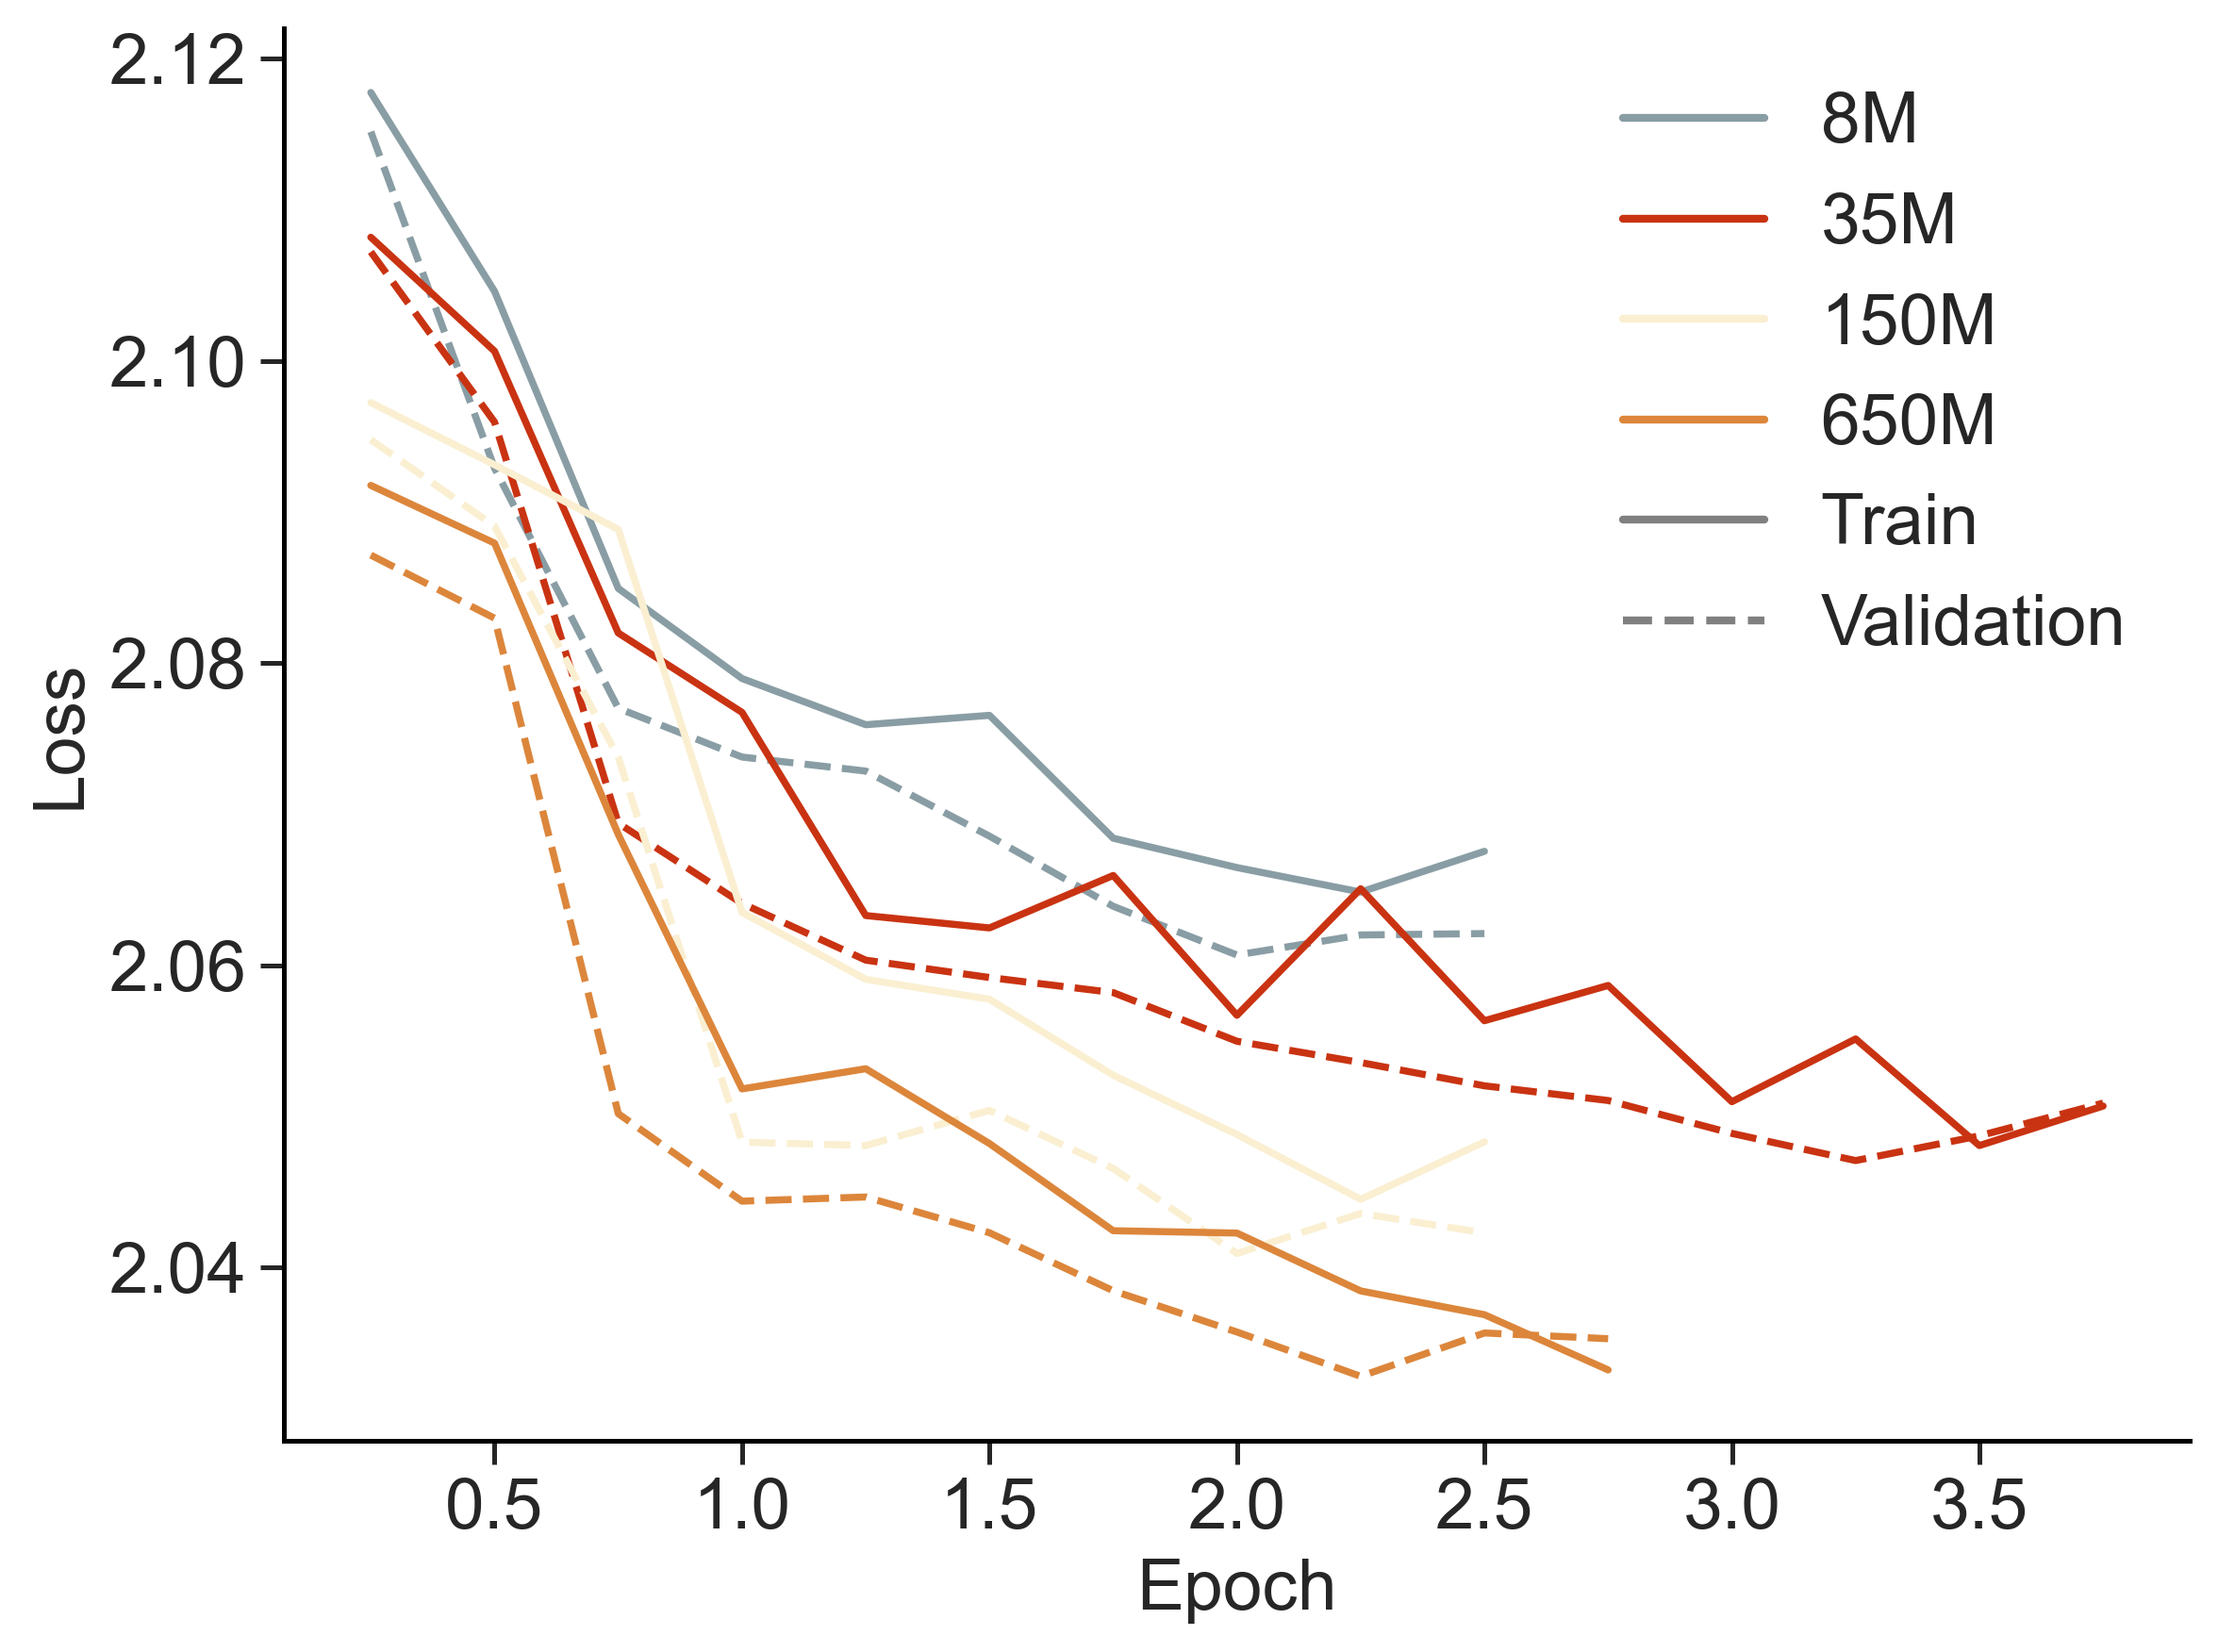

In [ ]:
#@title S5A

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from matplotlib import font_manager as fm

# --- Configuration ---
FIGURE_SIZE = (8, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 18
SPINE_WIDTH = 1.2

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# Load color palette
colors = load_cmap('Royal1').colors

MODEL_SIZES = ['8M', '35M', '150M', '650M']

# --- Load data ---
train_losses = {}
val_losses = {}

for size in MODEL_SIZES:
    train_losses[size] = pd.read_csv(f'epoch_loss_{size}.txt', header=None).squeeze().values
    val_losses[size] = pd.read_csv(f'validation_loss_{size}.txt', header=None).squeeze().values
# --- Build x-axis: 4 points per epoch ---
def make_x(n_points):
    # e.g. 8 points -> epochs 0.25, 0.5, 0.75, 1.0, 1.25, ...
    return np.arange(1, n_points + 1) / 4

# --- Plot ---
fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

for i, size in enumerate(MODEL_SIZES):
    color = colors[i % len(colors)]
    t = train_losses[size]
    v = val_losses[size]
    x_t = make_x(len(t))
    x_v = make_x(len(v))

    ax.plot(x_t, t, color=color, linewidth=1.8, label=f'{size} Train')
    ax.plot(x_v, v, color=color, linewidth=1.8, linestyle='--', label=f'{size} Val')

# --- Formatting ---
ax.set_xlabel("Epoch", fontsize=FONT_SIZE_LABELS,
              fontweight='bold', fontproperties=arial_font)
ax.set_ylabel("Loss", fontsize=FONT_SIZE_LABELS,
              fontweight='bold', fontproperties=arial_font)

ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS,
               width=SPINE_WIDTH, bottom=True, left=True)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(FONT_SIZE_TICKS)

# Legend: solid = train, dashed = val, color = model size
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color=colors[i], linewidth=2, label=MODEL_SIZES[i])
    for i in range(len(MODEL_SIZES))
] + [
    Line2D([0], [0], color='gray', linewidth=2, linestyle='-',  label='Train'),
    Line2D([0], [0], color='gray', linewidth=2, linestyle='--', label='Validation'),
]
arial_font = fm.FontProperties(fname="arial.ttf", size=18)

ax.legend(handles=legend_elements, fontsize=FONT_SIZE_TICKS,
          prop=arial_font, frameon=False)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
    ax.spines[spine].set_color('black')

plt.tight_layout()
plt.savefig("loss_curves.svg", dpi=DPI, bbox_inches='tight')
plt.show()

<>:264: SyntaxWarning: invalid escape sequence '\m'
<>:264: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-4150903704.py:264: SyntaxWarning: invalid escape sequence '\m'
  f'$\mathit{{p}}$={p_val:.3f}',
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


STATISTICAL ANALYSIS - 8M - Wilcoxon Signed-Rank Test

Prokaryote:
  Base median:       0.1907
  Fine-tuned median: 0.2899
  n (paired obs):    50
  Wilcoxon p-value:  8.9704e-09
  Significance:      ***

Eukaryote:
  Base median:       0.1714
  Fine-tuned median: 0.2934
  n (paired obs):    39
  Wilcoxon p-value:  3.6399e-07
  Significance:      ***

Human:
  Base median:       0.1998
  Fine-tuned median: 0.3366
  n (paired obs):    89
  Wilcoxon p-value:  5.2203e-11
  Significance:      ***

Virus:
  Base median:       0.0145
  Fine-tuned median: 0.2001
  n (paired obs):    23
  Wilcoxon p-value:  1.0252e-05
  Significance:      ***


/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)



FIGURE SAVED: ESM_8M_boxplot_taxon (.svg / .png / .pdf)


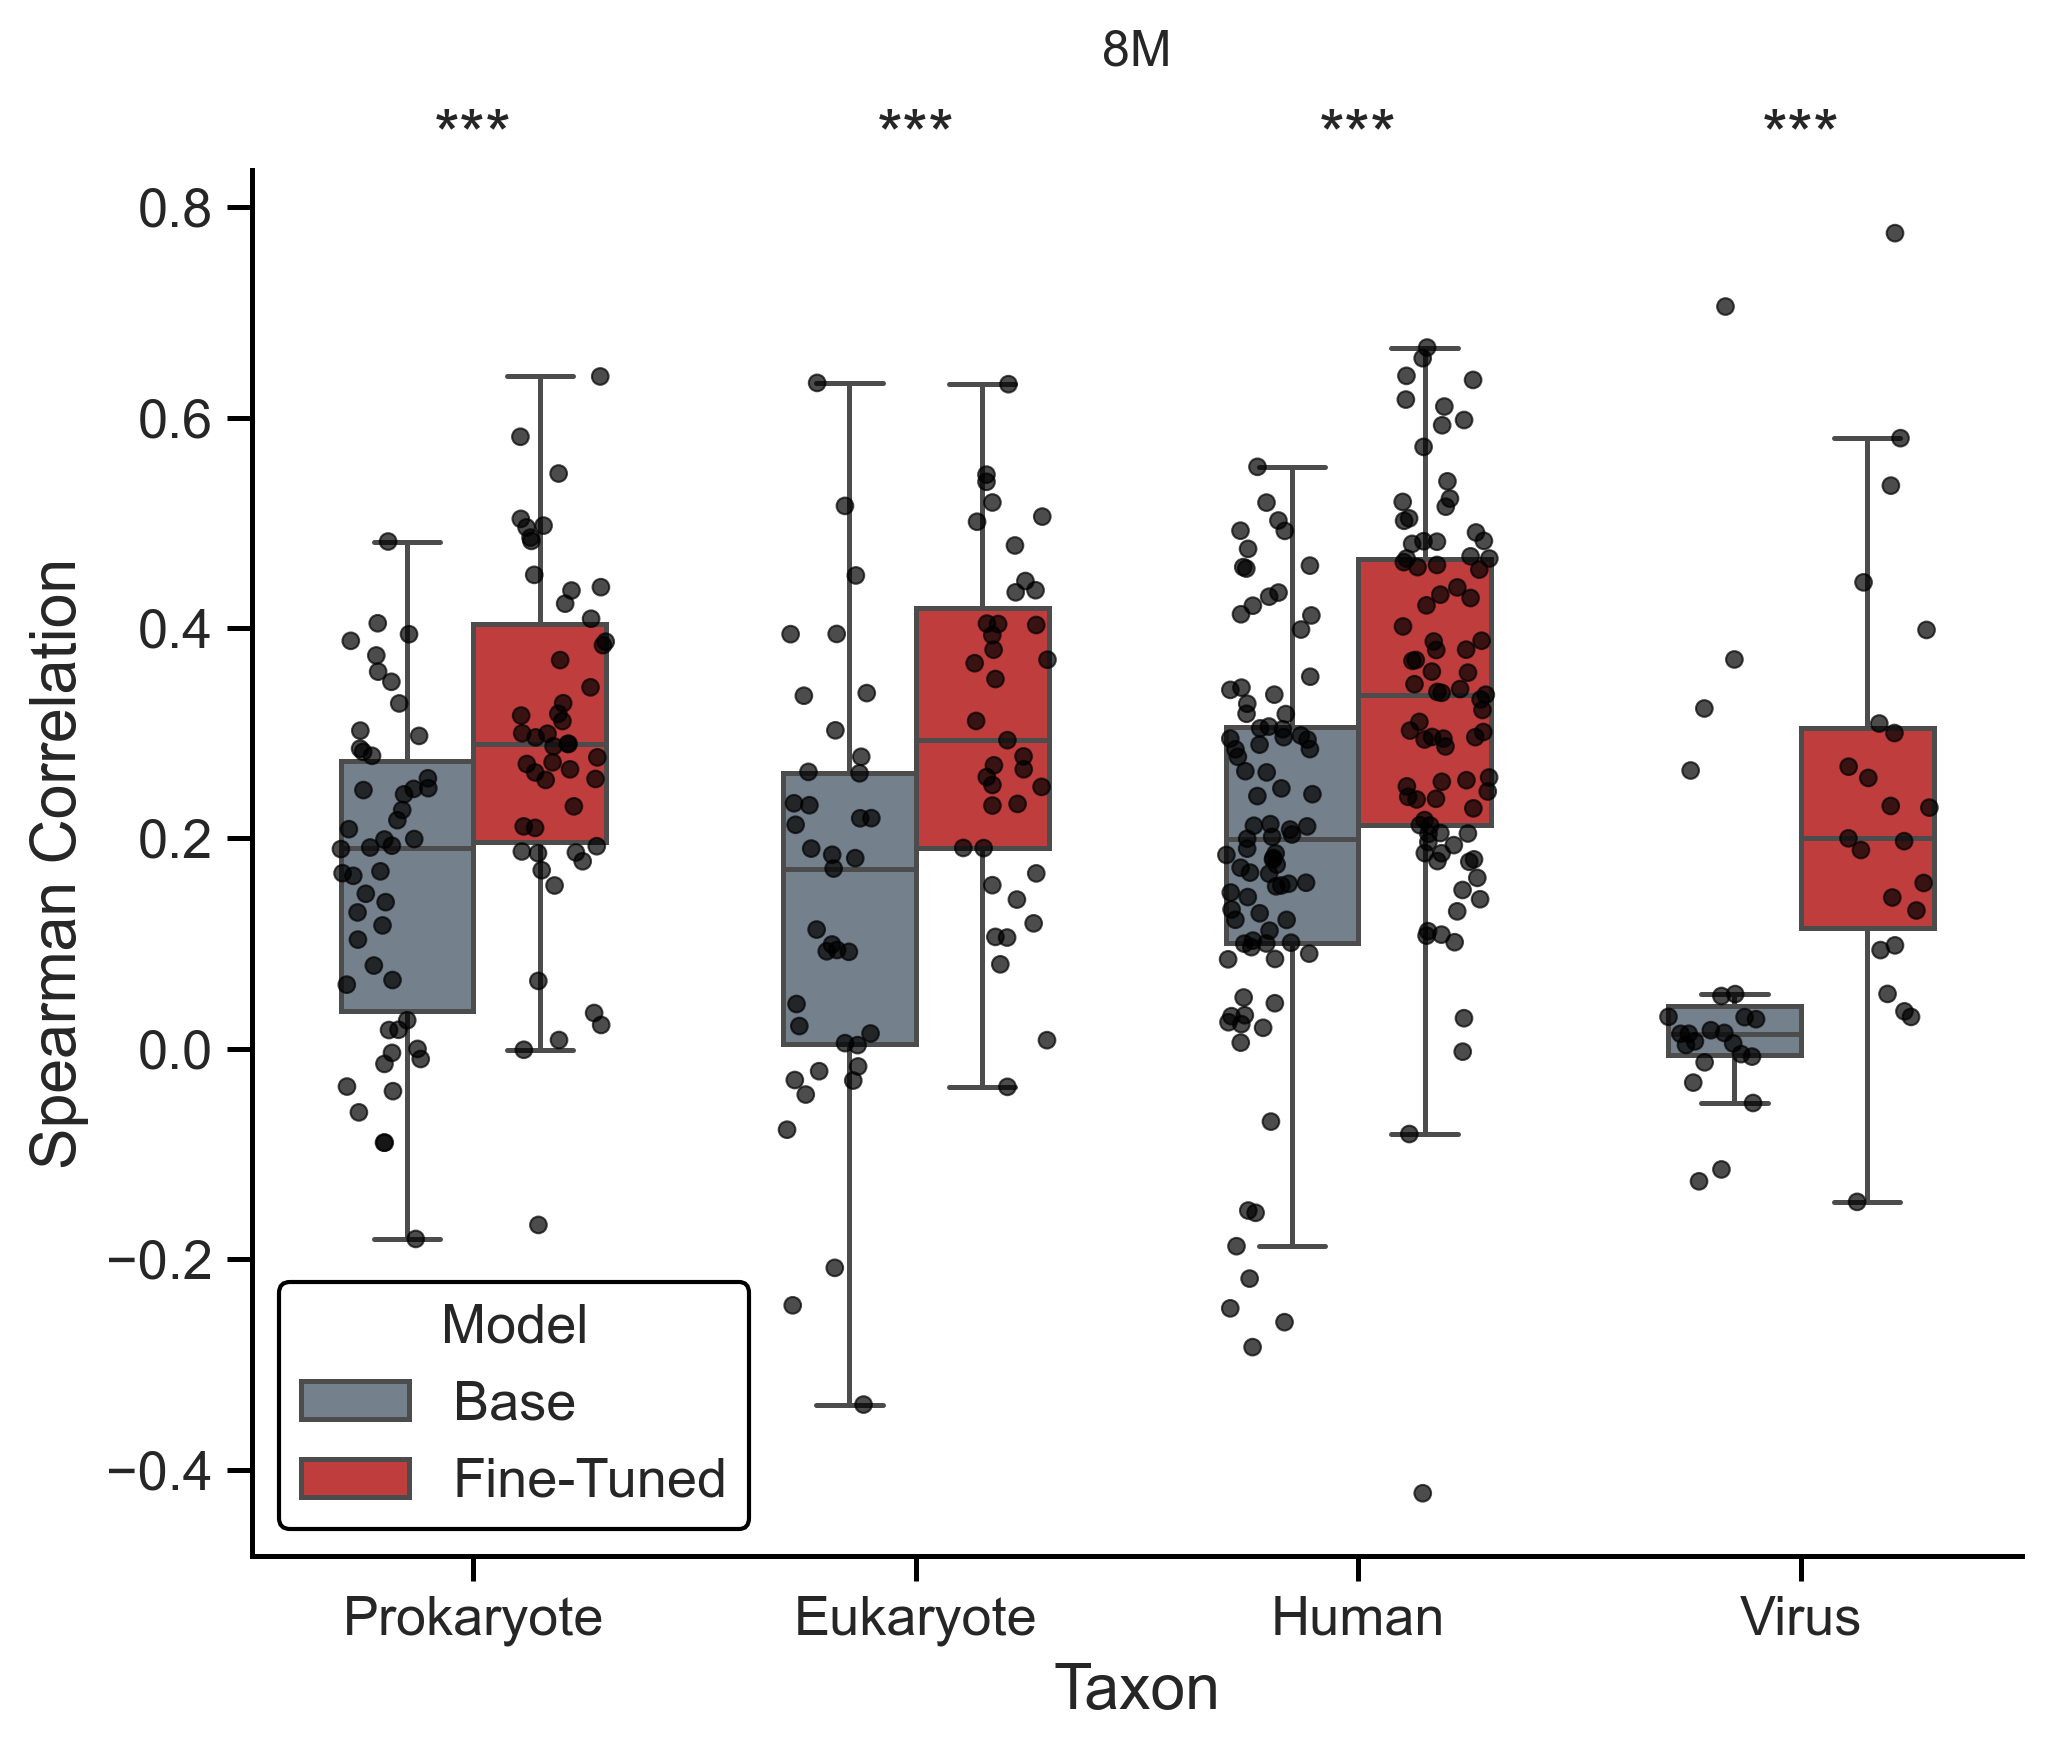

STATISTICAL ANALYSIS - 35M - Wilcoxon Signed-Rank Test

Prokaryote:
  Base median:       0.2885
  Fine-tuned median: 0.3700
  n (paired obs):    50
  Wilcoxon p-value:  1.6031e-05
  Significance:      ***

Eukaryote:
  Base median:       0.3635
  Fine-tuned median: 0.4257
  n (paired obs):    39
  Wilcoxon p-value:  4.0212e-06
  Significance:      ***

Human:
  Base median:       0.3614
  Fine-tuned median: 0.3968
  n (paired obs):    89
  Wilcoxon p-value:  1.0028e-05
  Significance:      ***

Virus:
  Base median:       0.0152
  Fine-tuned median: 0.1657
  n (paired obs):    23
  Wilcoxon p-value:  2.1482e-04
  Significance:      ***


/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)



FIGURE SAVED: ESM_35M_boxplot_taxon (.svg / .png / .pdf)


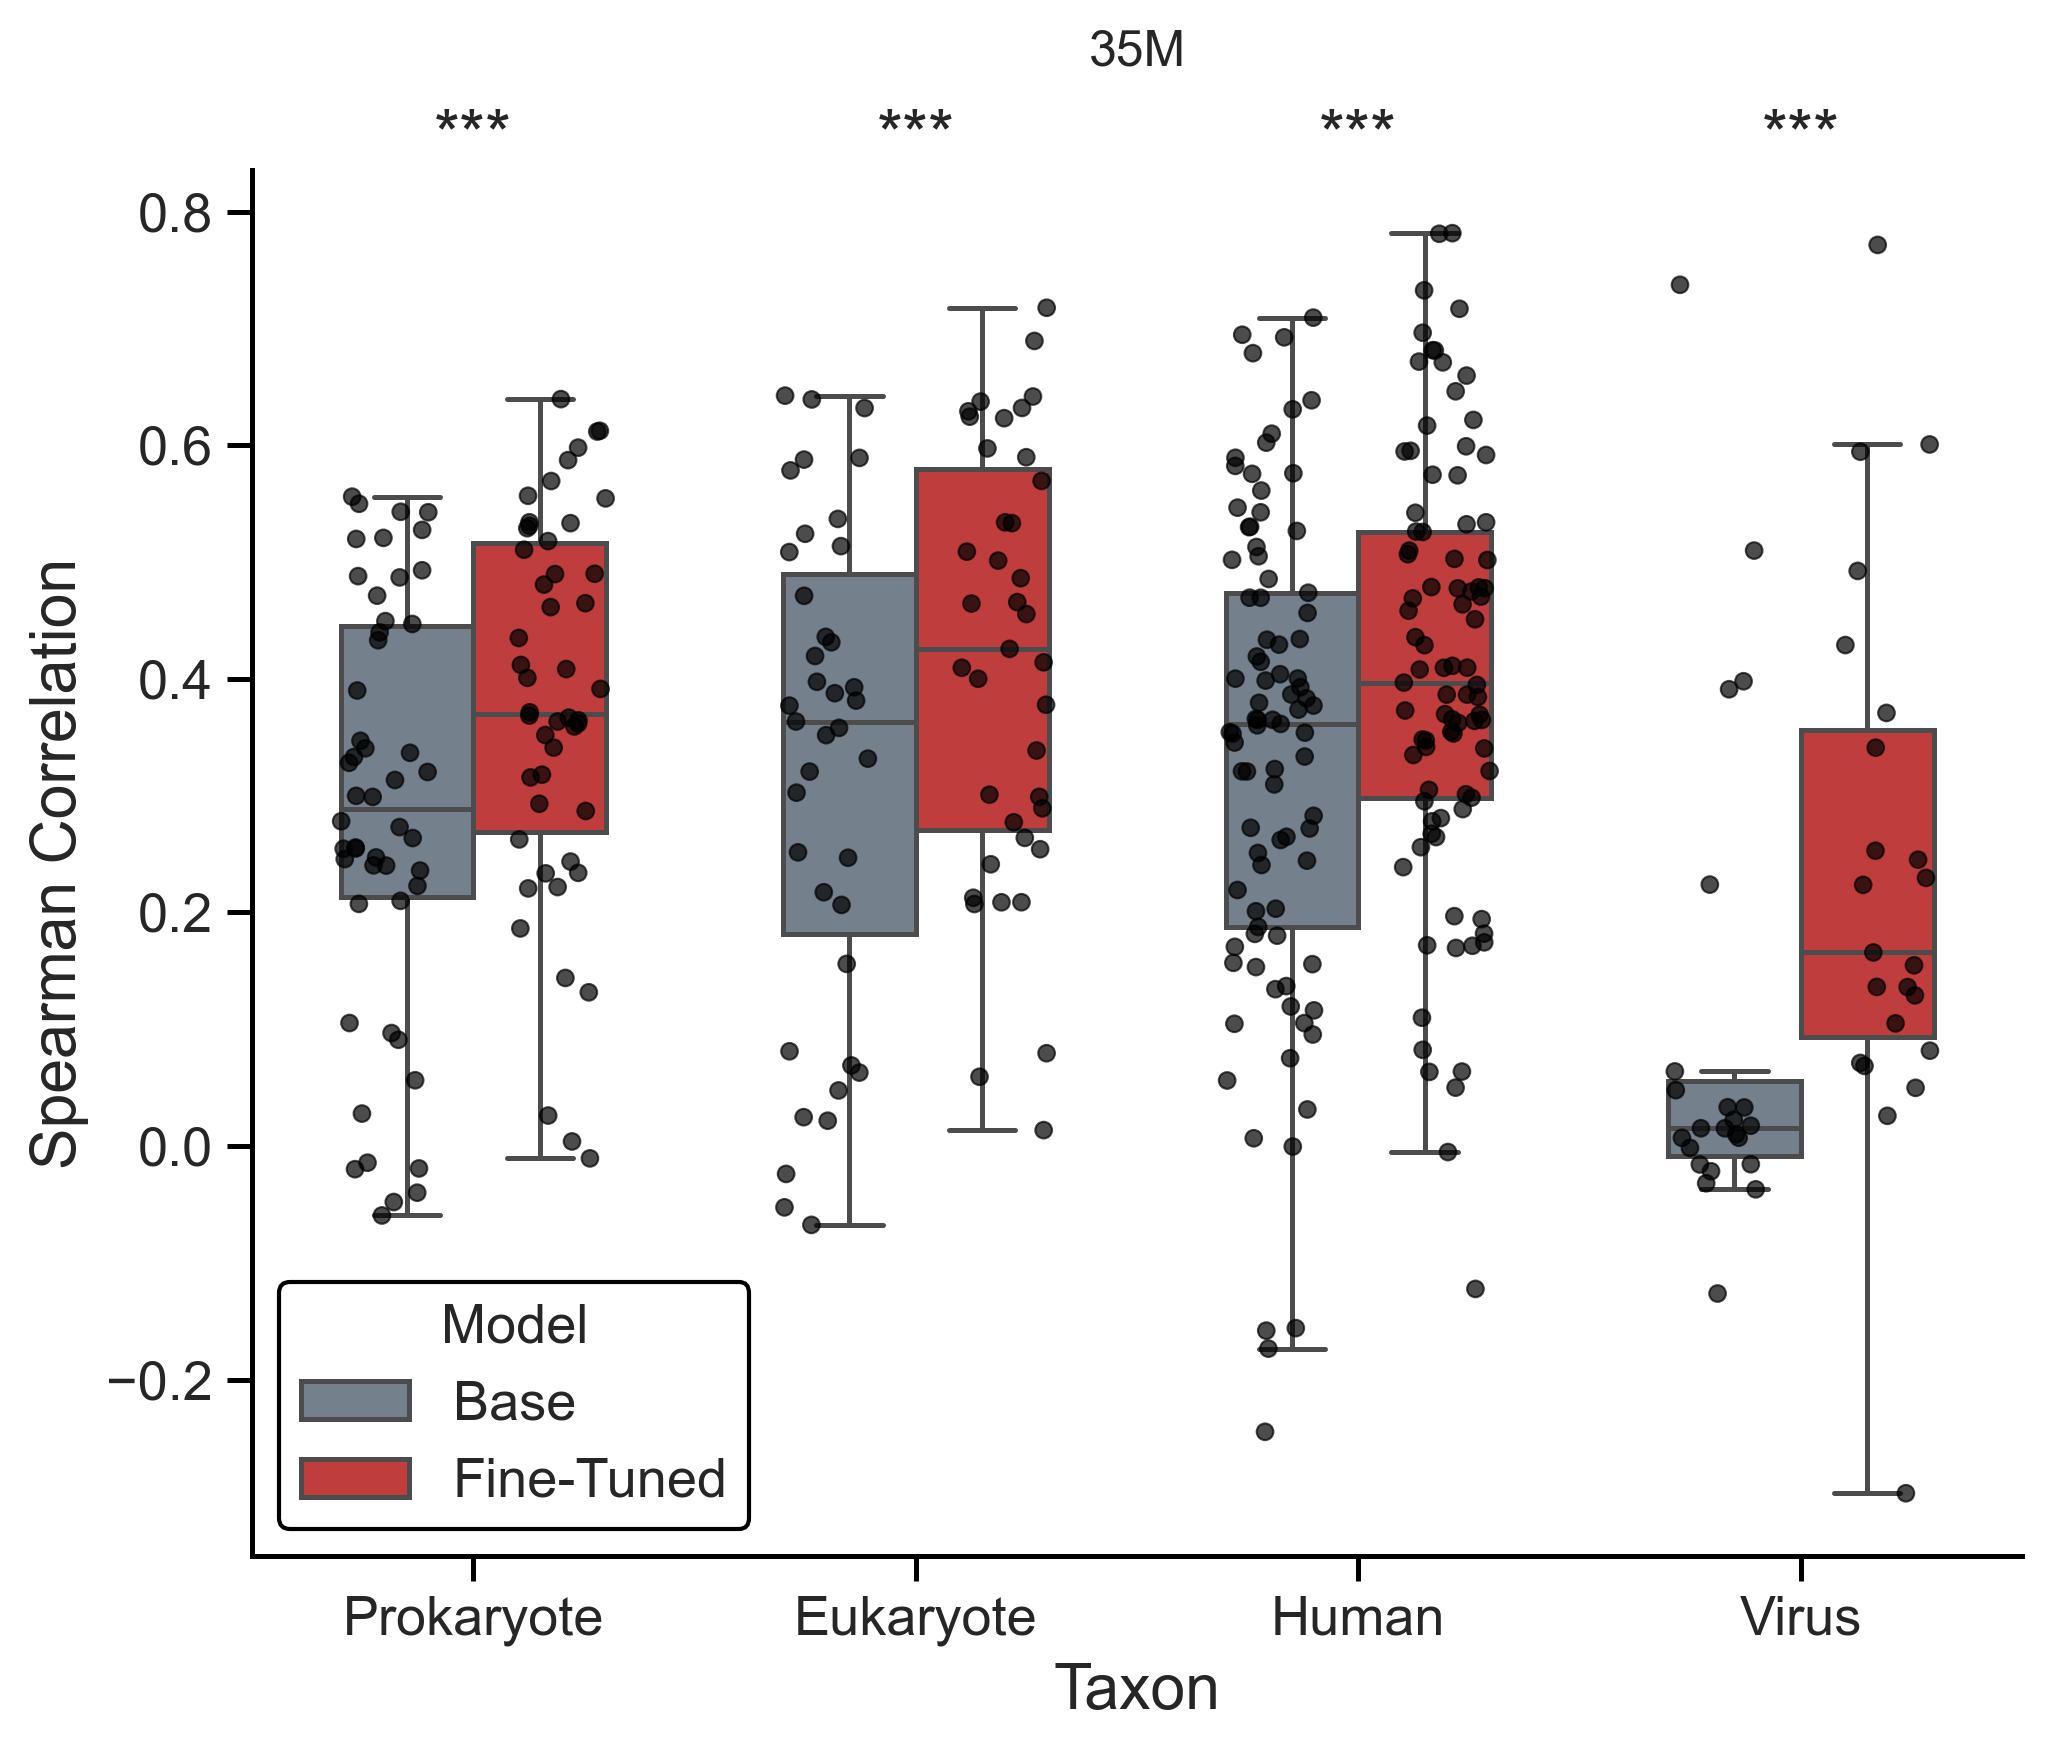

STATISTICAL ANALYSIS - 150M - Wilcoxon Signed-Rank Test

Prokaryote:
  Base median:       0.4006
  Fine-tuned median: 0.4862
  n (paired obs):    50
  Wilcoxon p-value:  7.9470e-06
  Significance:      ***

Eukaryote:
  Base median:       0.4547
  Fine-tuned median: 0.4859
  n (paired obs):    39
  Wilcoxon p-value:  7.3481e-05
  Significance:      ***

Human:
  Base median:       0.4433
  Fine-tuned median: 0.4740
  n (paired obs):    89
  Wilcoxon p-value:  2.5452e-01
  Significance:      ns

Virus:
  Base median:       0.0334
  Fine-tuned median: 0.1649
  n (paired obs):    23
  Wilcoxon p-value:  1.2779e-04
  Significance:      ***


/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)



FIGURE SAVED: ESM_150M_boxplot_taxon (.svg / .png / .pdf)


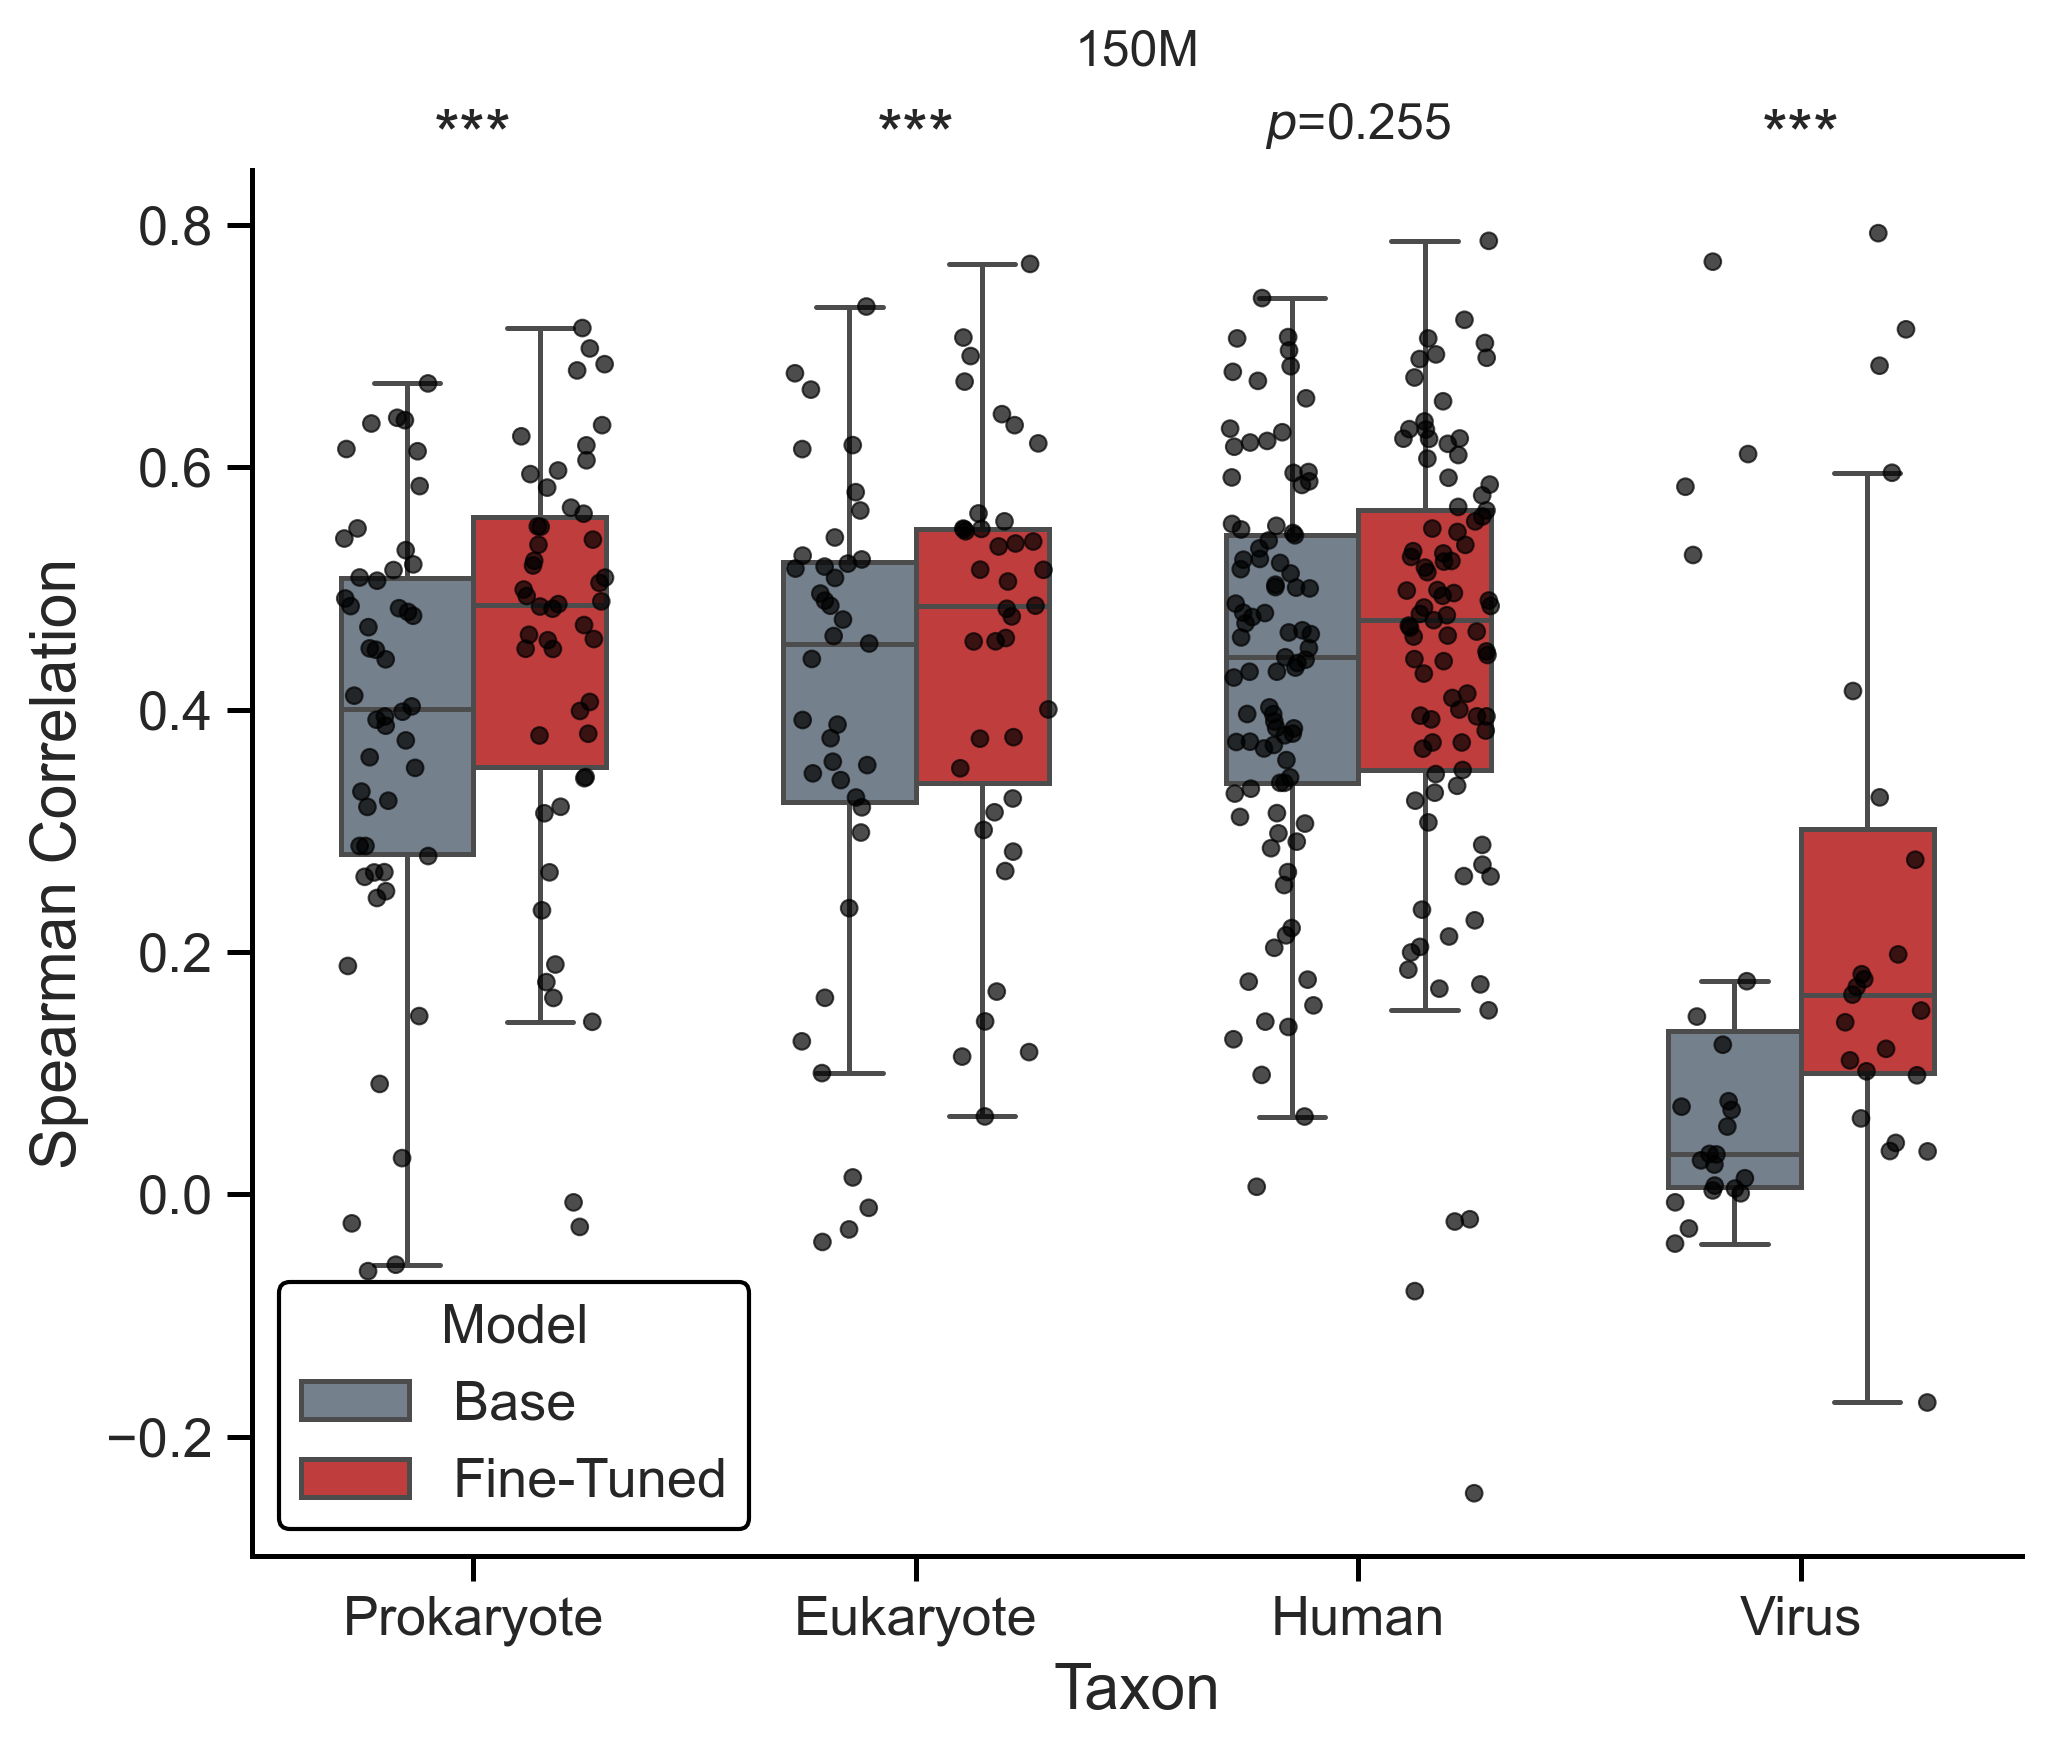

In [ ]:
#@title S5B

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.stats import wilcoxon
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

# ============================================================================
# CONFIGURATION
# ============================================================================
FIGURE_SIZE = (7, 6)
DPI = 300
FONT_SIZE_LABELS = 15
FONT_SIZE_TICKS = 13
FONT_SIZE_LEGEND = 13
FONT_SIZE_TITLE = 13
FONT_SIZE_SIG = 16
FONT_SIZE_PVAL = 12
SPINE_WIDTH = 1.2
BOX_WIDTH = 0.6
BOX_LINEWIDTH = 1.2
STRIP_SIZE = 4
STRIP_ALPHA = 0.7
STRIP_JITTER = 0.2

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# ============================================================================
# DATA LOADING
# ============================================================================
summary_df = pd.read_csv('proteingym_scores.csv', header=0)

# Define the desired order of taxa
taxon_order = ['Prokaryote', 'Eukaryote', 'Human', 'Virus']

# Color palette
box_palette = ['#708090', '#d62728']
dot_palette = ['black', 'black']

# ============================================================================
# MODEL CONFIGURATIONS
# ============================================================================
models = [
    {'base': 'ESM_8M_base',   'ft': 'ESM_8M_ft',   'label': '8M'},
    {'base': 'ESM_35M',  'ft': 'ESM_35M_ft',  'label': '35M'},
    {'base': 'ESM_150M_base', 'ft': 'ESM_150M_ft', 'label': '150M'},
]

# ============================================================================
# LOOP OVER MODELS
# ============================================================================
for model in models:
    base_col = model['base']
    ft_col   = model['ft']
    label    = model['label']

    # Melt data
    melted_df = summary_df.melt(
        id_vars='taxon',
        value_vars=[base_col, ft_col],
        var_name='Model',
        value_name='Score'
    )

    # Add Base / Fine-tuned labels
    melted_df['Status'] = melted_df['Model'].apply(
        lambda x: 'Fine-Tuned' if '_ft' in x else 'Base'
    )

    # Convert taxon to categorical with specified order
    melted_df['taxon'] = pd.Categorical(
        melted_df['taxon'],
        categories=taxon_order,
        ordered=True
    )

    # ============================================================================
    # STATISTICAL ANALYSIS
    # ============================================================================
    significance_dict = {}
    pvalue_dict = {}

    print("=" * 60)
    print(f"STATISTICAL ANALYSIS - {label} - Wilcoxon Signed-Rank Test")
    print("=" * 60)

    for taxon in taxon_order:
        subset = summary_df[summary_df['taxon'] == taxon]

        base_scores = subset[base_col].dropna()
        ft_scores   = subset[ft_col].dropna()

        valid_idx   = base_scores.index.intersection(ft_scores.index)
        base_scores = base_scores.loc[valid_idx]
        ft_scores   = ft_scores.loc[valid_idx]

        print(f"\n{taxon}:")
        print(f"  Base median:       {base_scores.median():.4f}")
        print(f"  Fine-tuned median: {ft_scores.median():.4f}")
        print(f"  n (paired obs):    {len(base_scores)}")

        if len(base_scores) == 0 or len(ft_scores) == 0:
            print(f"  WARNING: Not enough data")
            significance_dict[taxon] = 'ns'
            pvalue_dict[taxon] = None
        elif len(base_scores) < 3:
            print(f"  WARNING: Very few observations")
            significance_dict[taxon] = 'ns'
            pvalue_dict[taxon] = None
        else:
            try:
                stat, p = wilcoxon(base_scores, ft_scores)
                pvalue_dict[taxon] = p

                if p < 0.001:
                    significance = '***'
                elif p < 0.01:
                    significance = '**'
                elif p < 0.05:
                    significance = '*'
                else:
                    significance = 'ns'

                significance_dict[taxon] = significance
                print(f"  Wilcoxon p-value:  {p:.4e}")
                print(f"  Significance:      {significance}")
            except Exception as e:
                print(f"  WARNING: Could not compute test: {e}")
                significance_dict[taxon] = 'ns'
                pvalue_dict[taxon] = None

    print("=" * 60)

    # ============================================================================
    # PLOTTING
    # ============================================================================
    fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

    # Boxplot
    sns.boxplot(
        data=melted_df,
        x='taxon',
        y='Score',
        hue='Status',
        palette=box_palette,
        fliersize=0,
        width=BOX_WIDTH,
        linewidth=BOX_LINEWIDTH,
        order=taxon_order,
        ax=ax
    )

    # Stripplot
    sns.stripplot(
        data=melted_df,
        x='taxon',
        y='Score',
        hue='Status',
        dodge=True,
        size=STRIP_SIZE,
        alpha=STRIP_ALPHA,
        jitter=STRIP_JITTER,
        palette=dot_palette,
        edgecolor='black',
        linewidth=0.5,
        order=taxon_order,
        ax=ax
    )

    # ============================================================================
    # LEGEND
    # ============================================================================
    handles, labels_leg = ax.get_legend_handles_labels()
    legend = ax.legend(
        handles[:2],
        labels_leg[:2],
        title="Model",
        fontsize=FONT_SIZE_LEGEND,
        loc='lower left',
        frameon=True,
        edgecolor='black',
        framealpha=1
    )

    for text in legend.get_texts():
        text.set_fontproperties(arial_font)
        text.set_fontsize(FONT_SIZE_LEGEND)
    legend.get_title().set_fontproperties(arial_font)
    legend.get_title().set_fontsize(FONT_SIZE_TITLE)

    # ============================================================================
    # TITLE
    # ============================================================================
    ax.set_title(
        label,
        fontsize=FONT_SIZE_TITLE,
        fontproperties=arial_font,
        fontweight='bold',
        pad=25
    )

    # ============================================================================
    # AXES AND LABELS
    # ============================================================================
    ax.set_xlabel("Taxon", fontsize=FONT_SIZE_LABELS, fontproperties=arial_font)
    ax.set_ylabel("Spearman Correlation", fontsize=FONT_SIZE_LABELS, fontproperties=arial_font)

    for tick_label in ax.get_xticklabels() + ax.get_yticklabels():
        tick_label.set_fontproperties(arial_font)
        tick_label.set_fontsize(FONT_SIZE_TICKS)

    # ============================================================================
    # SPINES AND TICKS
    # ============================================================================
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_linewidth(SPINE_WIDTH)
        ax.spines[spine].set_color('black')

    ax.tick_params(
        which='both',
        bottom=True,
        left=True,
        top=False,
        right=False,
        width=SPINE_WIDTH,
        color='black',
        labelsize=FONT_SIZE_TICKS
    )

    # ============================================================================
    # SIGNIFICANCE ANNOTATIONS
    # ============================================================================
    y_max = melted_df['Score'].max()
    y_min = melted_df['Score'].min()
    y_offset = (y_max - y_min) * 0.05

    for i, taxon in enumerate(taxon_order):
        sig   = significance_dict.get(taxon, 'ns')
        p_val = pvalue_dict.get(taxon)

        if sig != 'ns':
            ax.text(
                i,
                y_max + y_offset,
                sig,
                ha='center',
                va='bottom',
                fontsize=FONT_SIZE_SIG,
                fontproperties=arial_font,
                fontweight='bold'
            )
        elif p_val is not None:
            ax.text(
                i,
                y_max + y_offset * 1.3,
                f'$\mathit{{p}}$={p_val:.3f}',
                ha='center',
                va='bottom',
                fontsize=FONT_SIZE_PVAL,
                fontproperties=arial_font
            )

    # ============================================================================
    # FINALIZE AND SAVE
    # ============================================================================
    plt.tight_layout()

    plt.savefig(f"ESM_{label}_boxplot_taxon.svg", format="svg", dpi=DPI, bbox_inches='tight')
    # plt.savefig(f"ESM_{label}_boxplot_taxon.png", format="png", dpi=DPI, bbox_inches='tight')
    # plt.savefig(f"ESM_{label}_boxplot_taxon.pdf", format="pdf", dpi=DPI, bbox_inches='tight')

    print(f"\nFIGURE SAVED: ESM_{label}_boxplot_taxon (.svg / .png / .pdf)")
    print("=" * 60)

    plt.show()

<>:274: SyntaxWarning: invalid escape sequence '\m'
<>:274: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-975144975.py:274: SyntaxWarning: invalid escape sequence '\m'
  f'$\mathit{{p}}$={p_val:.3f}',
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


STATISTICAL ANALYSIS - 8M - Wilcoxon Signed-Rank Test

Stability:
  Base median:       0.2052
  Fine-tuned median: 0.3792
  n (paired obs):    66
  Wilcoxon p-value:  4.2557e-10
  Significance:      ***

Activity:
  Base median:       0.1608
  Fine-tuned median: 0.3201
  n (paired obs):    38
  Wilcoxon p-value:  1.0186e-10
  Significance:      ***

OrganismalFitness:
  Base median:       0.0967
  Fine-tuned median: 0.2566
  n (paired obs):    69
  Wilcoxon p-value:  4.5744e-10
  Significance:      ***

Expression:
  Base median:       0.2626
  Fine-tuned median: 0.3036
  n (paired obs):    16
  Wilcoxon p-value:  1.1667e-01
  Significance:      ns

Binding:
  Base median:       0.1985
  Fine-tuned median: 0.2574
  n (paired obs):    12
  Wilcoxon p-value:  2.6611e-01
  Significance:      ns


/tmp/ipython-input-975144975.py:221: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)



FIGURE SAVED: dms_selection_type_boxplot_8M.svg


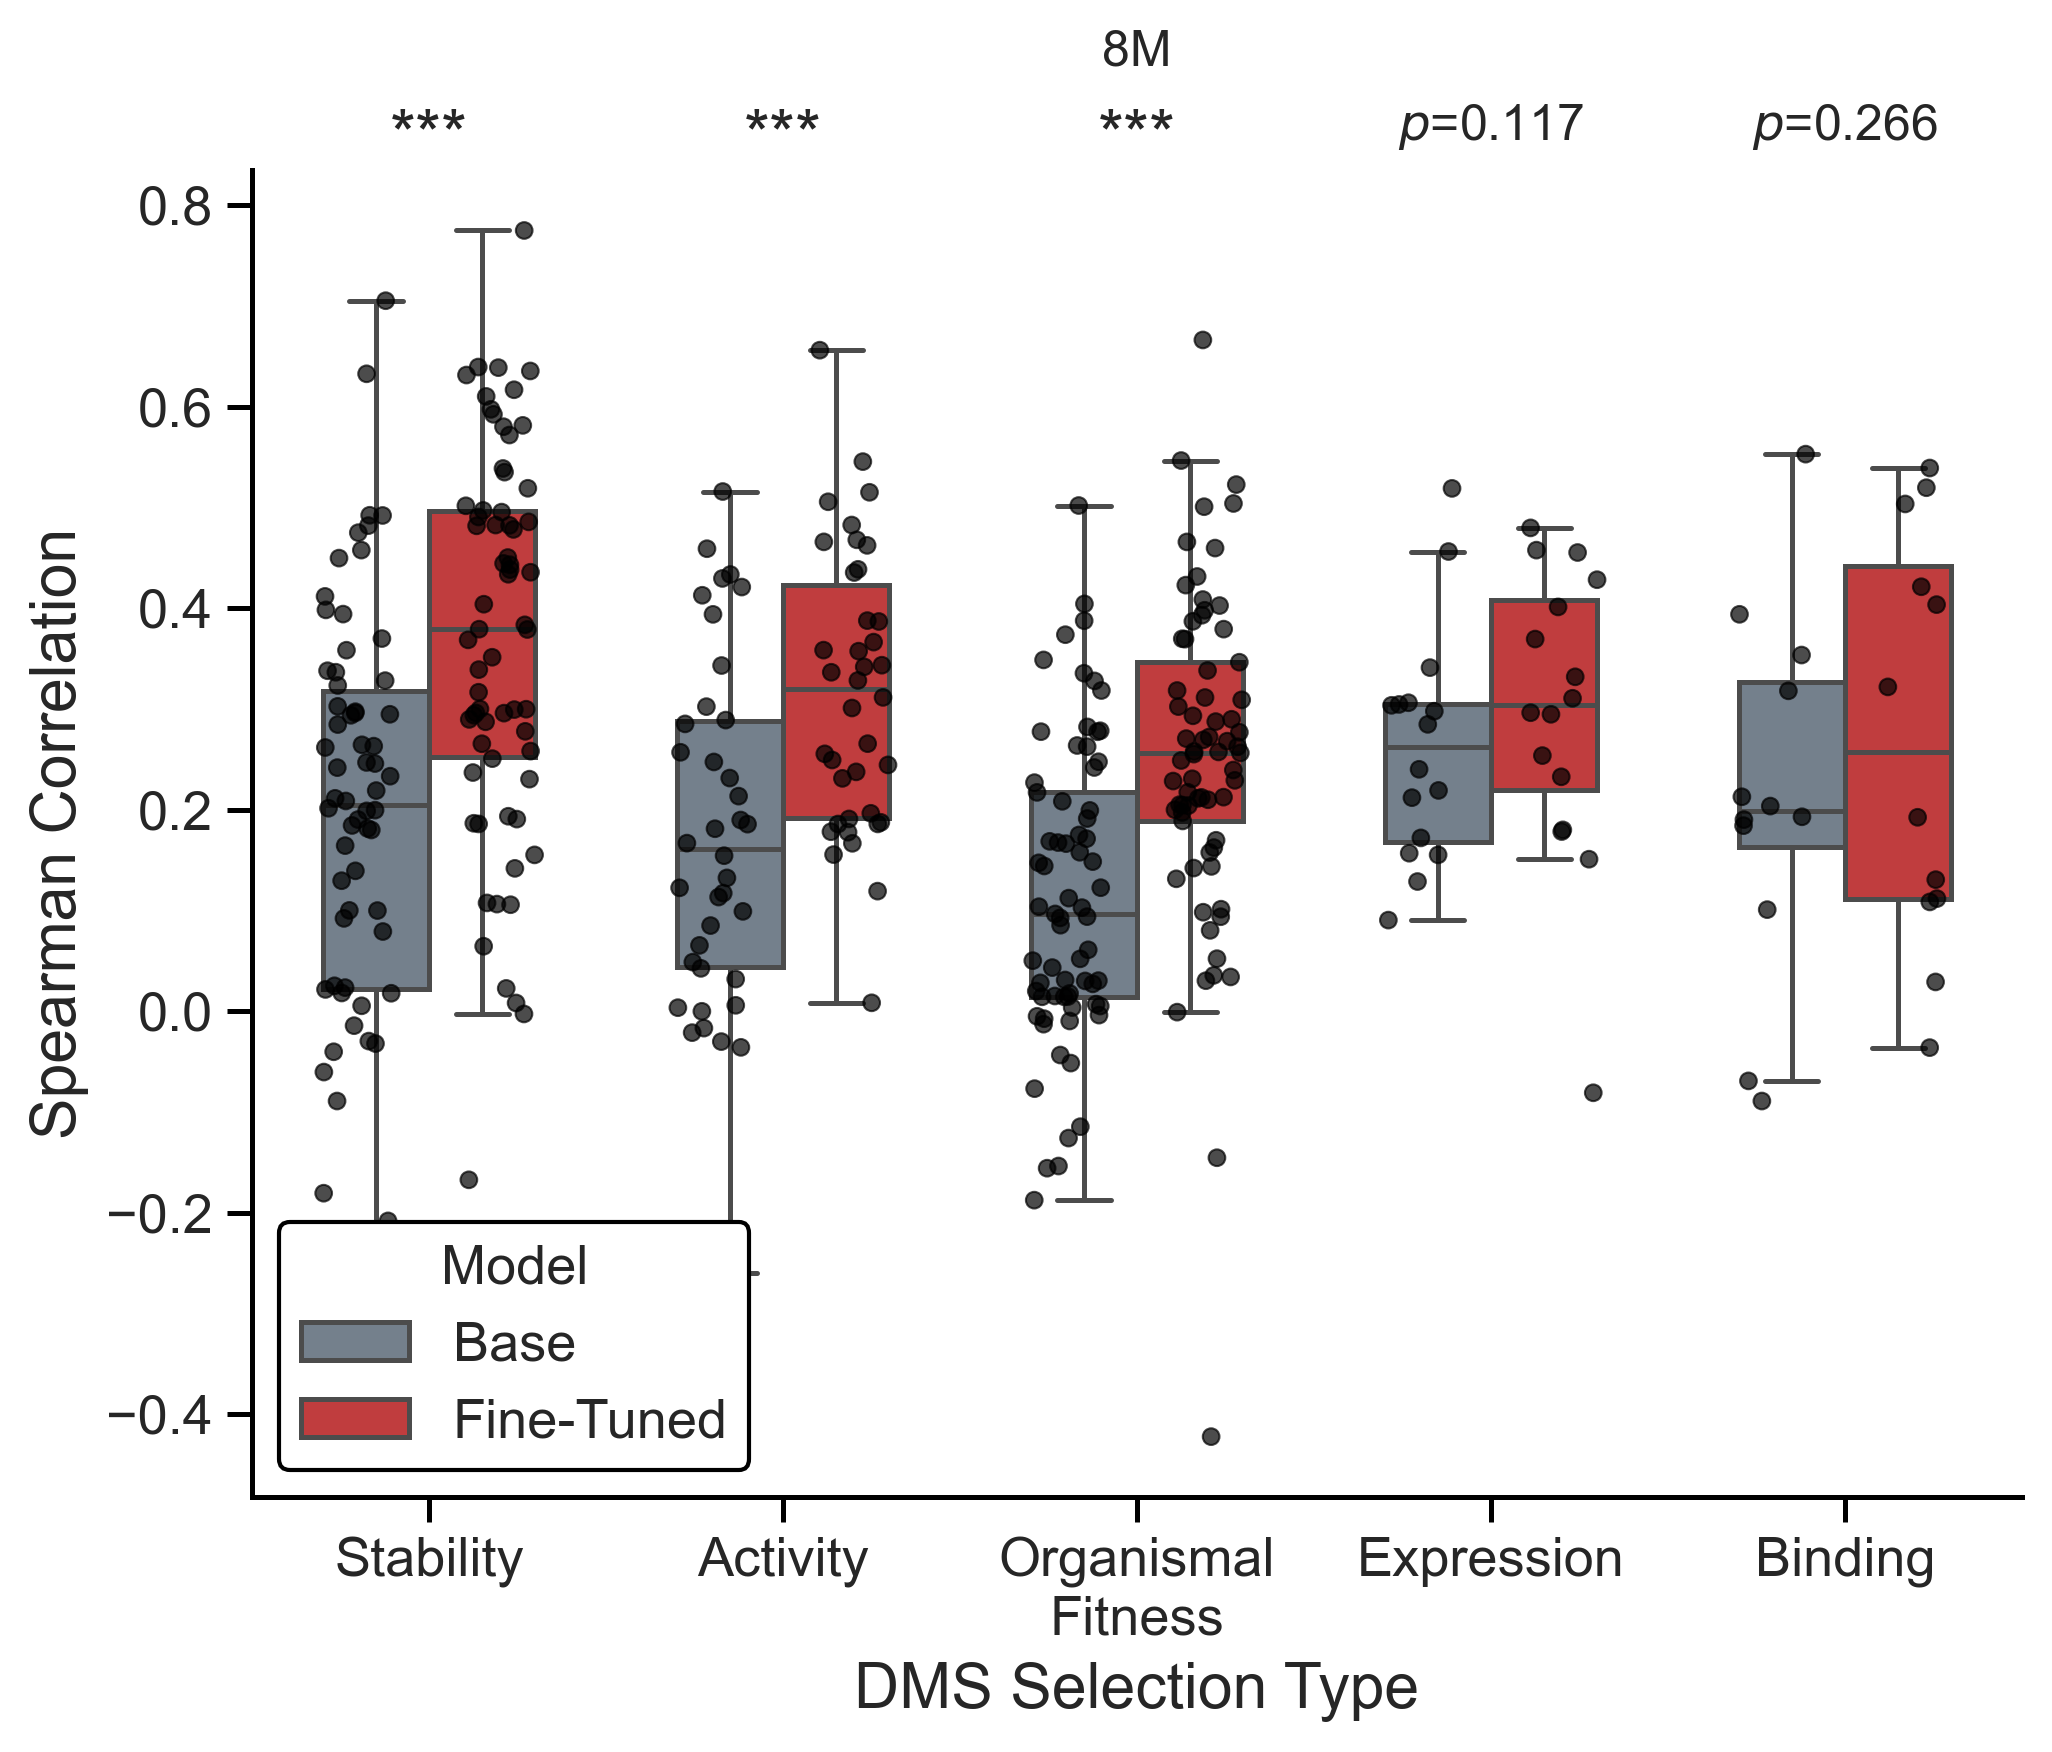

STATISTICAL ANALYSIS - 35M - Wilcoxon Signed-Rank Test

Stability:
  Base median:       0.3592
  Fine-tuned median: 0.4819
  n (paired obs):    66
  Wilcoxon p-value:  1.2064e-07
  Significance:      ***

Activity:
  Base median:       0.3472
  Fine-tuned median: 0.4096
  n (paired obs):    38
  Wilcoxon p-value:  8.0870e-07
  Significance:      ***

OrganismalFitness:
  Base median:       0.2227
  Fine-tuned median: 0.3417
  n (paired obs):    69
  Wilcoxon p-value:  2.9448e-07
  Significance:      ***

Expression:
  Base median:       0.3636
  Fine-tuned median: 0.3632
  n (paired obs):    16
  Wilcoxon p-value:  9.3988e-01
  Significance:      ns

Binding:
  Base median:       0.2117
  Fine-tuned median: 0.2995
  n (paired obs):    12
  Wilcoxon p-value:  3.8037e-01
  Significance:      ns


/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/tmp/ipython-input-975144975.py:221: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)



FIGURE SAVED: dms_selection_type_boxplot_35M.svg


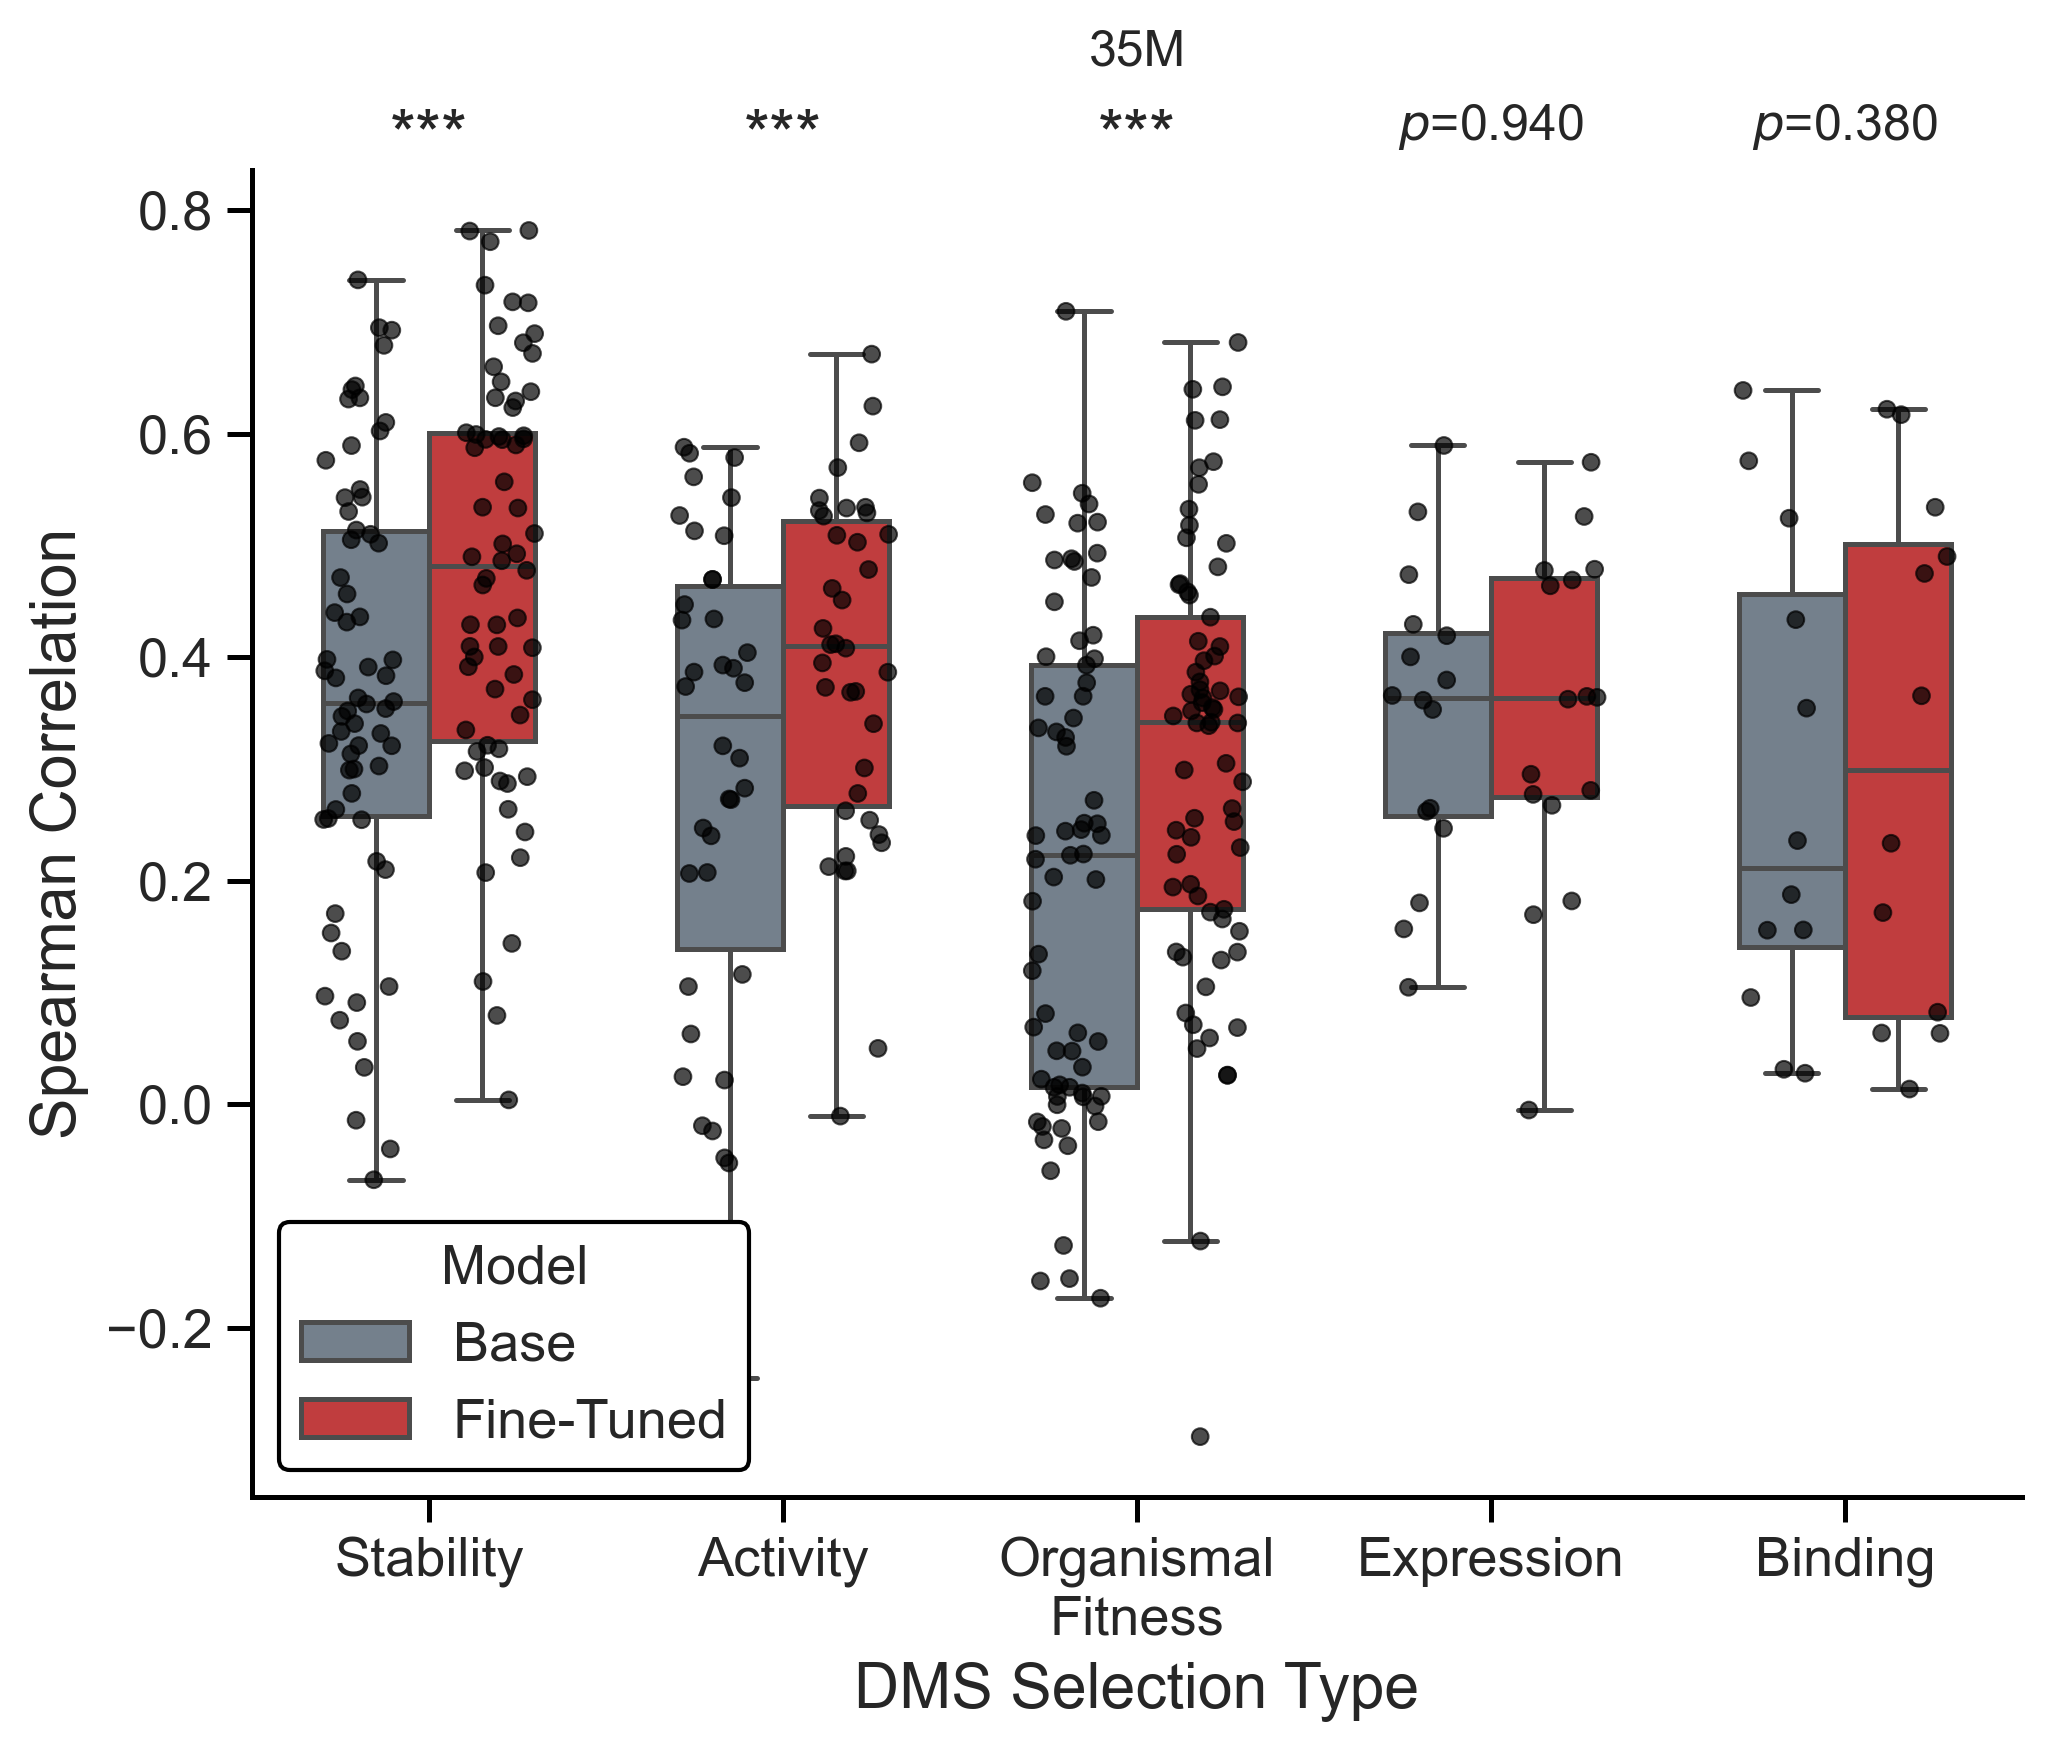

STATISTICAL ANALYSIS - 150M - Wilcoxon Signed-Rank Test

Stability:
  Base median:       0.4833
  Fine-tuned median: 0.5491
  n (paired obs):    66
  Wilcoxon p-value:  1.6496e-07
  Significance:      ***

Activity:
  Base median:       0.4191
  Fine-tuned median: 0.4689
  n (paired obs):    38
  Wilcoxon p-value:  1.7339e-03
  Significance:      **

OrganismalFitness:
  Base median:       0.3442
  Fine-tuned median: 0.3946
  n (paired obs):    69
  Wilcoxon p-value:  3.1226e-05
  Significance:      ***

Expression:
  Base median:       0.4456
  Fine-tuned median: 0.4198
  n (paired obs):    16
  Wilcoxon p-value:  2.8992e-02
  Significance:      *

Binding:
  Base median:       0.3230
  Fine-tuned median: 0.3490
  n (paired obs):    12
  Wilcoxon p-value:  4.6973e-01
  Significance:      ns


/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/tmp/ipython-input-975144975.py:221: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)



FIGURE SAVED: dms_selection_type_boxplot_150M.svg


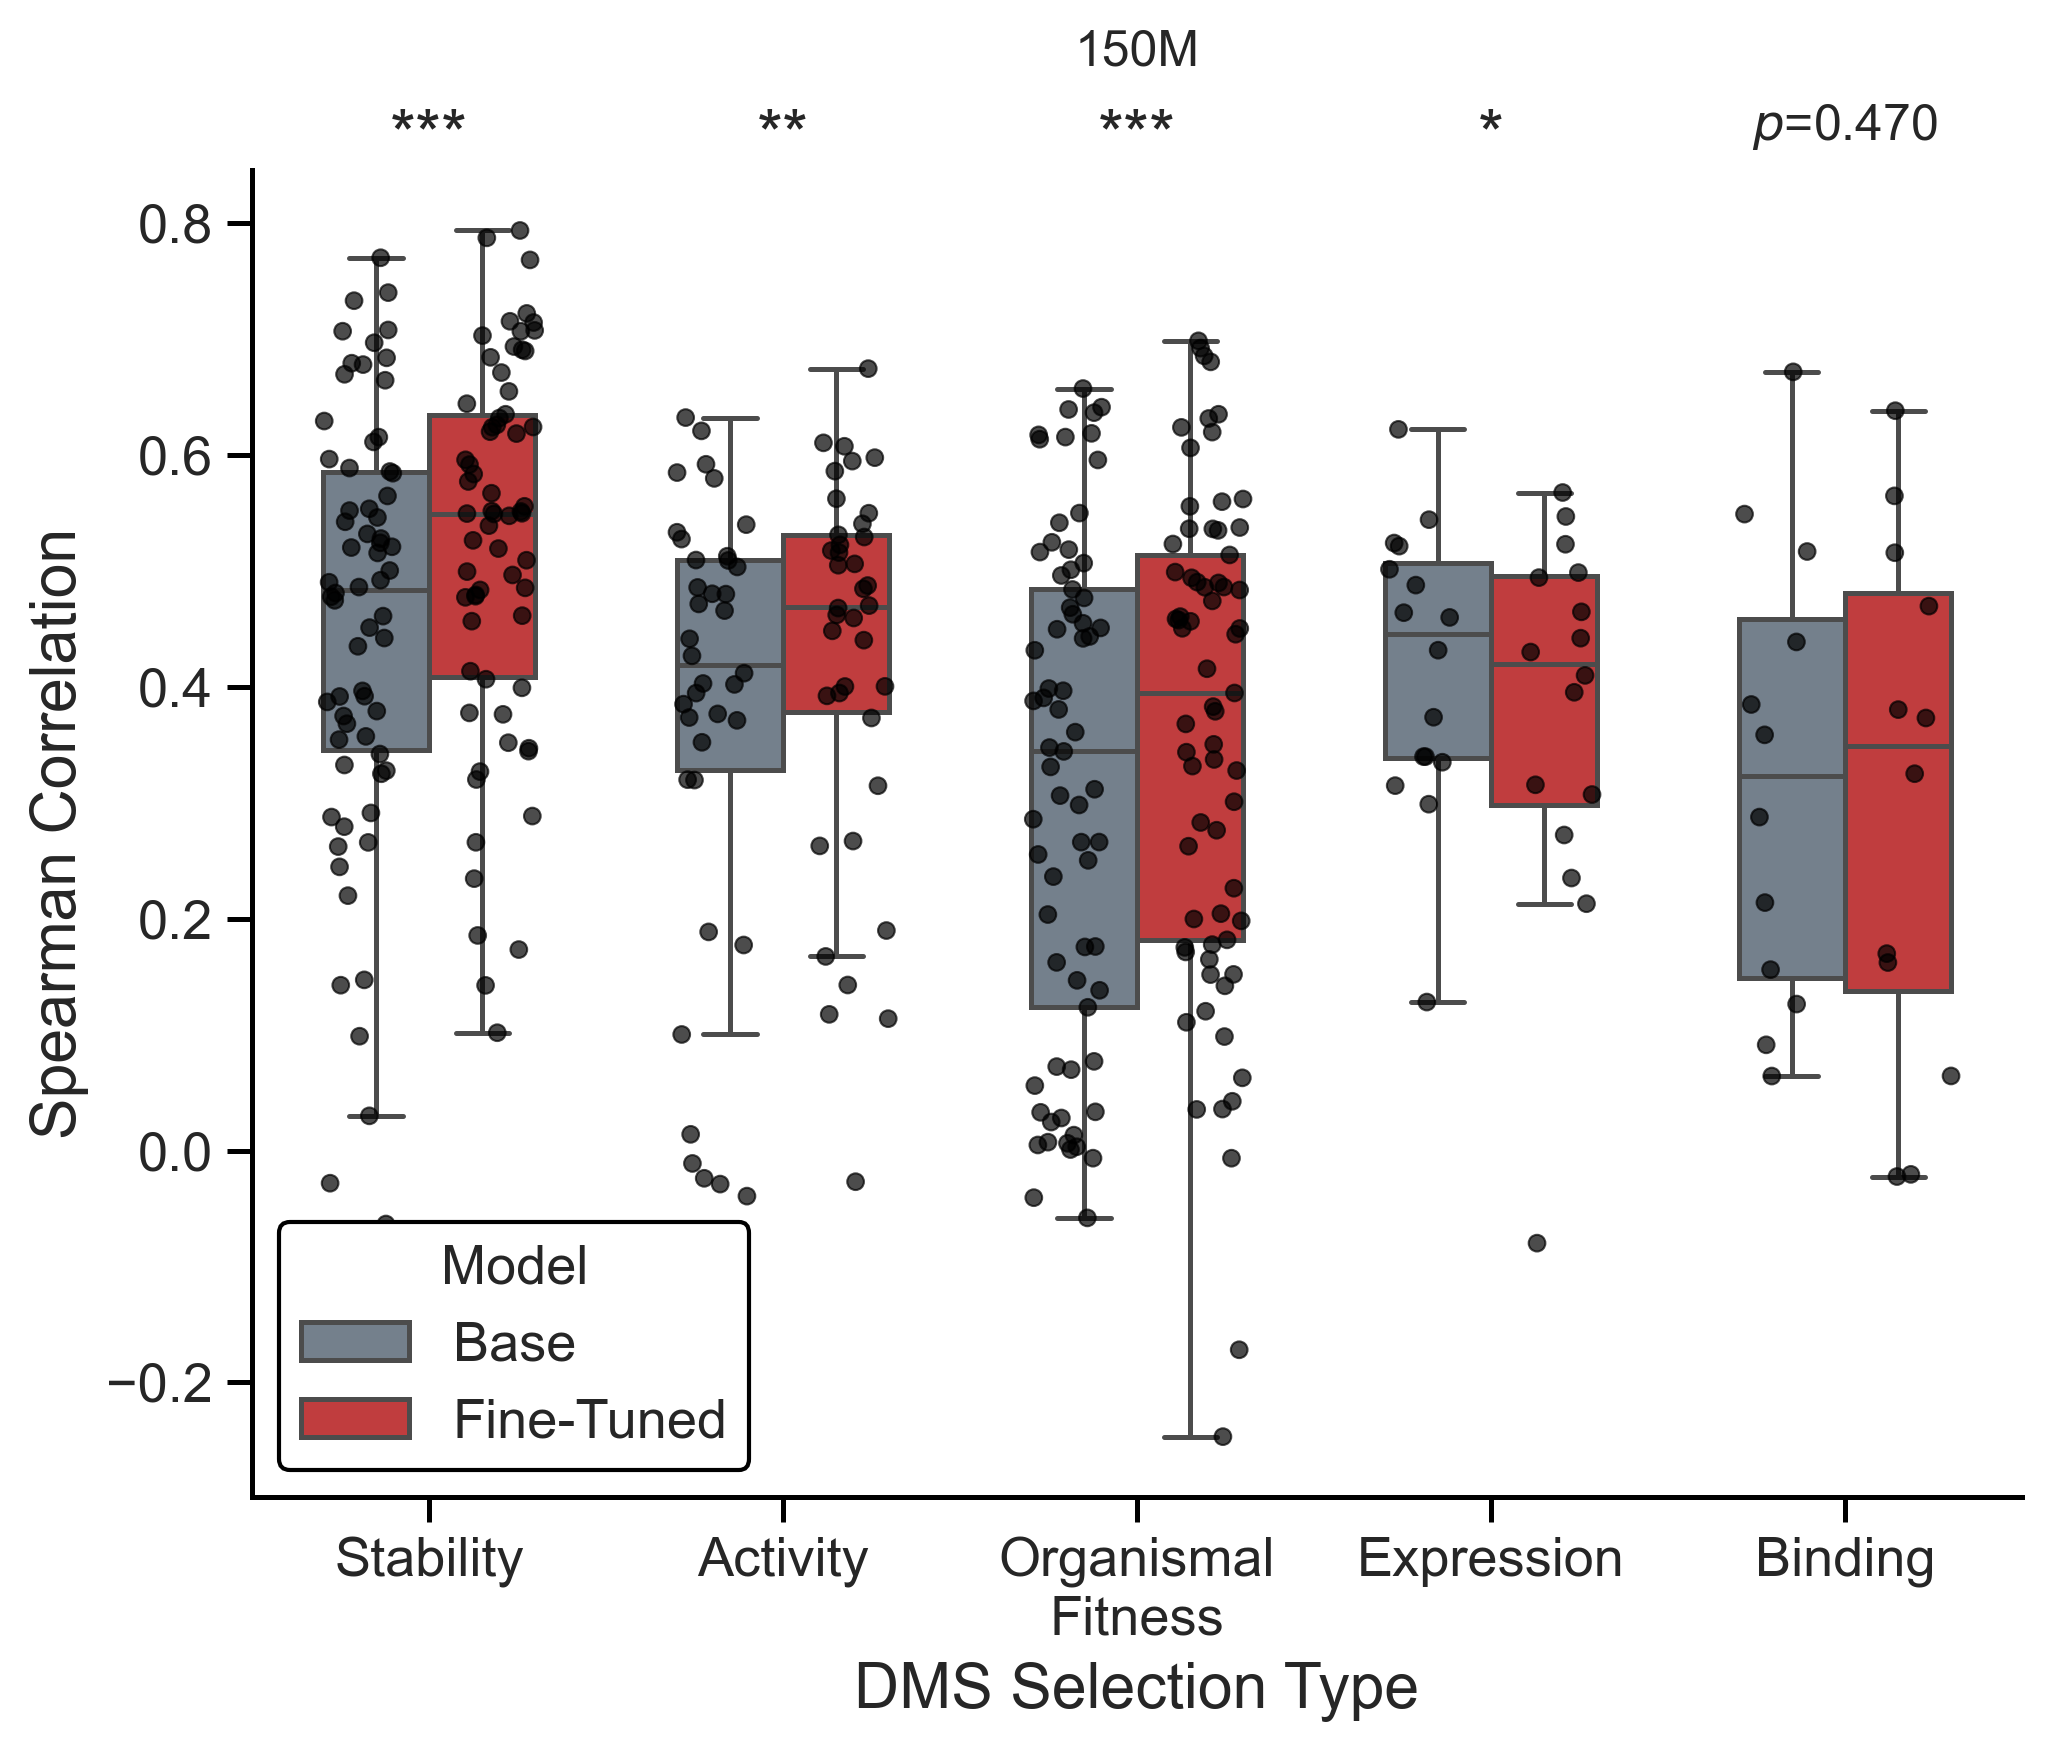

In [ ]:
#@title S5C

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.stats import wilcoxon
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

# ============================================================================
# CONFIGURATION
# ============================================================================
FIGURE_SIZE = (7, 6)
DPI = 300
FONT_SIZE_LABELS = 15
FONT_SIZE_TICKS = 13
FONT_SIZE_LEGEND = 13
FONT_SIZE_TITLE = 13
FONT_SIZE_SIG = 16
FONT_SIZE_PVAL = 12
SPINE_WIDTH = 1.2
BOX_WIDTH = 0.6
BOX_LINEWIDTH = 1.2
STRIP_SIZE = 4
STRIP_ALPHA = 0.7
STRIP_JITTER = 0.2

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# ============================================================================
# DATA LOADING
# ============================================================================
summary_df = pd.read_csv('proteingym_scores.csv', header=0)

# Define category order
category_order = ['Stability', 'Activity', 'OrganismalFitness', 'Expression', 'Binding']

# Color palette
box_palette = ['#708090', '#d62728']
dot_palette = ['black', 'black']

# ============================================================================
# MODEL CONFIGURATIONS
# ============================================================================
models = [
    {'base': 'ESM_8M_base',   'ft': 'ESM_8M_ft',   'label': '8M'},
    {'base': 'ESM_35M',  'ft': 'ESM_35M_ft',  'label': '35M'},
    {'base': 'ESM_150M_base', 'ft': 'ESM_150M_ft', 'label': '150M'},
]

# ============================================================================
# LOOP OVER MODELS
# ============================================================================
for model in models:
    base_col = model['base']
    ft_col   = model['ft']
    label    = model['label']

    # Melt data
    melted_df = summary_df.melt(
        id_vars='coarse_selection_type',
        value_vars=[base_col, ft_col],
        var_name='Model',
        value_name='Score'
    )

    # Add Base / Fine-tuned labels
    melted_df['Status'] = melted_df['Model'].apply(
        lambda x: 'Fine-Tuned' if '_ft' in x else 'Base'
    )

    # Convert coarse_selection_type to categorical with specified order
    melted_df['coarse_selection_type'] = pd.Categorical(
        melted_df['coarse_selection_type'],
        categories=category_order,
        ordered=True
    )

    # ============================================================================
    # STATISTICAL ANALYSIS
    # ============================================================================
    significance_dict = {}
    pvalue_dict = {}

    print("=" * 60)
    print(f"STATISTICAL ANALYSIS - {label} - Wilcoxon Signed-Rank Test")
    print("=" * 60)

    for sel_type in category_order:
        subset = summary_df[summary_df['coarse_selection_type'] == sel_type]

        base_scores = subset[base_col].dropna()
        ft_scores   = subset[ft_col].dropna()

        valid_idx   = base_scores.index.intersection(ft_scores.index)
        base_scores = base_scores.loc[valid_idx]
        ft_scores   = ft_scores.loc[valid_idx]

        print(f"\n{sel_type}:")
        print(f"  Base median:       {base_scores.median():.4f}")
        print(f"  Fine-tuned median: {ft_scores.median():.4f}")
        print(f"  n (paired obs):    {len(base_scores)}")

        if len(base_scores) == 0 or len(ft_scores) == 0:
            print(f"  WARNING: Not enough data")
            significance_dict[sel_type] = 'ns'
            pvalue_dict[sel_type] = None
        elif len(base_scores) < 3:
            print(f"  WARNING: Very few observations")
            significance_dict[sel_type] = 'ns'
            pvalue_dict[sel_type] = None
        else:
            try:
                stat, p = wilcoxon(base_scores, ft_scores)
                pvalue_dict[sel_type] = p

                if p < 0.001:
                    significance = '***'
                elif p < 0.01:
                    significance = '**'
                elif p < 0.05:
                    significance = '*'
                else:
                    significance = 'ns'

                significance_dict[sel_type] = significance
                print(f"  Wilcoxon p-value:  {p:.4e}")
                print(f"  Significance:      {significance}")
            except Exception as e:
                print(f"  WARNING: Could not compute test: {e}")
                significance_dict[sel_type] = 'ns'
                pvalue_dict[sel_type] = None

    print("=" * 60)

    # ============================================================================
    # PLOTTING
    # ============================================================================
    fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

    # Boxplot
    sns.boxplot(
        data=melted_df,
        x='coarse_selection_type',
        y='Score',
        hue='Status',
        palette=box_palette,
        fliersize=0,
        width=BOX_WIDTH,
        linewidth=BOX_LINEWIDTH,
        order=category_order,
        ax=ax
    )

    # Stripplot
    sns.stripplot(
        data=melted_df,
        x='coarse_selection_type',
        y='Score',
        hue='Status',
        dodge=True,
        size=STRIP_SIZE,
        alpha=STRIP_ALPHA,
        jitter=STRIP_JITTER,
        palette=dot_palette,
        edgecolor='black',
        linewidth=0.5,
        order=category_order,
        ax=ax
    )

    # ============================================================================
    # LEGEND
    # ============================================================================
    handles, labels_leg = ax.get_legend_handles_labels()
    legend = ax.legend(
        handles[:2],
        labels_leg[:2],
        title="Model",
        fontsize=FONT_SIZE_LEGEND,
        loc='lower left',
        frameon=True,
        edgecolor='black',
        framealpha=1
    )

    for text in legend.get_texts():
        text.set_fontproperties(arial_font)
        text.set_fontsize(FONT_SIZE_LEGEND)
    legend.get_title().set_fontproperties(arial_font)
    legend.get_title().set_fontsize(FONT_SIZE_TITLE)

    # ============================================================================
    # TITLE
    # ============================================================================
    ax.set_title(
        label,
        fontsize=FONT_SIZE_TITLE,
        fontproperties=arial_font,
        fontweight='bold',
        pad=25
    )

    # ============================================================================
    # AXES AND LABELS
    # ============================================================================
    ax.set_xlabel("DMS Selection Type", fontsize=FONT_SIZE_LABELS, fontproperties=arial_font)
    ax.set_ylabel("Spearman Correlation", fontsize=FONT_SIZE_LABELS, fontproperties=arial_font)

    # Format x-axis labels to split OrganismalFitness into two lines
    xticklabels = []
    for tick_label in ax.get_xticklabels():
        text = tick_label.get_text()
        if text == 'OrganismalFitness':
            xticklabels.append('Organismal\nFitness')
        else:
            xticklabels.append(text)
    ax.set_xticklabels(xticklabels)

    for tick_label in ax.get_xticklabels() + ax.get_yticklabels():
        tick_label.set_fontproperties(arial_font)
        tick_label.set_fontsize(FONT_SIZE_TICKS)

    # ============================================================================
    # SPINES AND TICKS
    # ============================================================================
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_linewidth(SPINE_WIDTH)
        ax.spines[spine].set_color('black')

    ax.tick_params(
        which='both',
        bottom=True,
        left=True,
        top=False,
        right=False,
        width=SPINE_WIDTH,
        color='black',
        labelsize=FONT_SIZE_TICKS
    )

    # ============================================================================
    # SIGNIFICANCE ANNOTATIONS
    # ============================================================================
    y_max = melted_df['Score'].max()
    y_min = melted_df['Score'].min()
    y_offset = (y_max - y_min) * 0.05

    for i, sel_type in enumerate(category_order):
        sig   = significance_dict.get(sel_type, 'ns')
        p_val = pvalue_dict.get(sel_type)

        if sig != 'ns':
            ax.text(
                i,
                y_max + y_offset,
                sig,
                ha='center',
                va='bottom',
                fontsize=FONT_SIZE_SIG,
                fontproperties=arial_font,
                fontweight='bold'
            )
        elif p_val is not None:
            ax.text(
                i,
                y_max + y_offset * 1.3,
                f'$\mathit{{p}}$={p_val:.3f}',
                ha='center',
                va='bottom',
                fontsize=FONT_SIZE_PVAL,
                fontproperties=arial_font
            )

    # ============================================================================
    # FINALIZE AND SAVE
    # ============================================================================
    plt.tight_layout()

    plt.savefig(f"dms_selection_type_boxplot_{label}.svg", format="svg", dpi=DPI, bbox_inches='tight')

    print(f"\nFIGURE SAVED: dms_selection_type_boxplot_{label}.svg")
    print("=" * 60)

    plt.show()

STATISTICAL ANALYSIS - Wilcoxon Signed-Rank Test

8M Model:
  Base median:       0.7075
  Fine-tuned median: 0.7513
  Wilcoxon p-value:  2.3091e-17
  Significance:      ***

35M Model:
  Base median:       0.7444
  Fine-tuned median: 0.7937
  Wilcoxon p-value:  1.6288e-13
  Significance:      ***

150M Model:
  Base median:       0.7828
  Fine-tuned median: 0.8041
  Wilcoxon p-value:  6.1346e-04
  Significance:      ***

650M Model:
  Base median:       0.8031
  Fine-tuned median: 0.8103
  Wilcoxon p-value:  2.8417e-02
  Significance:      *


/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)



FIGURE SAVED:
  - ESM_NDCG_boxplot.svg


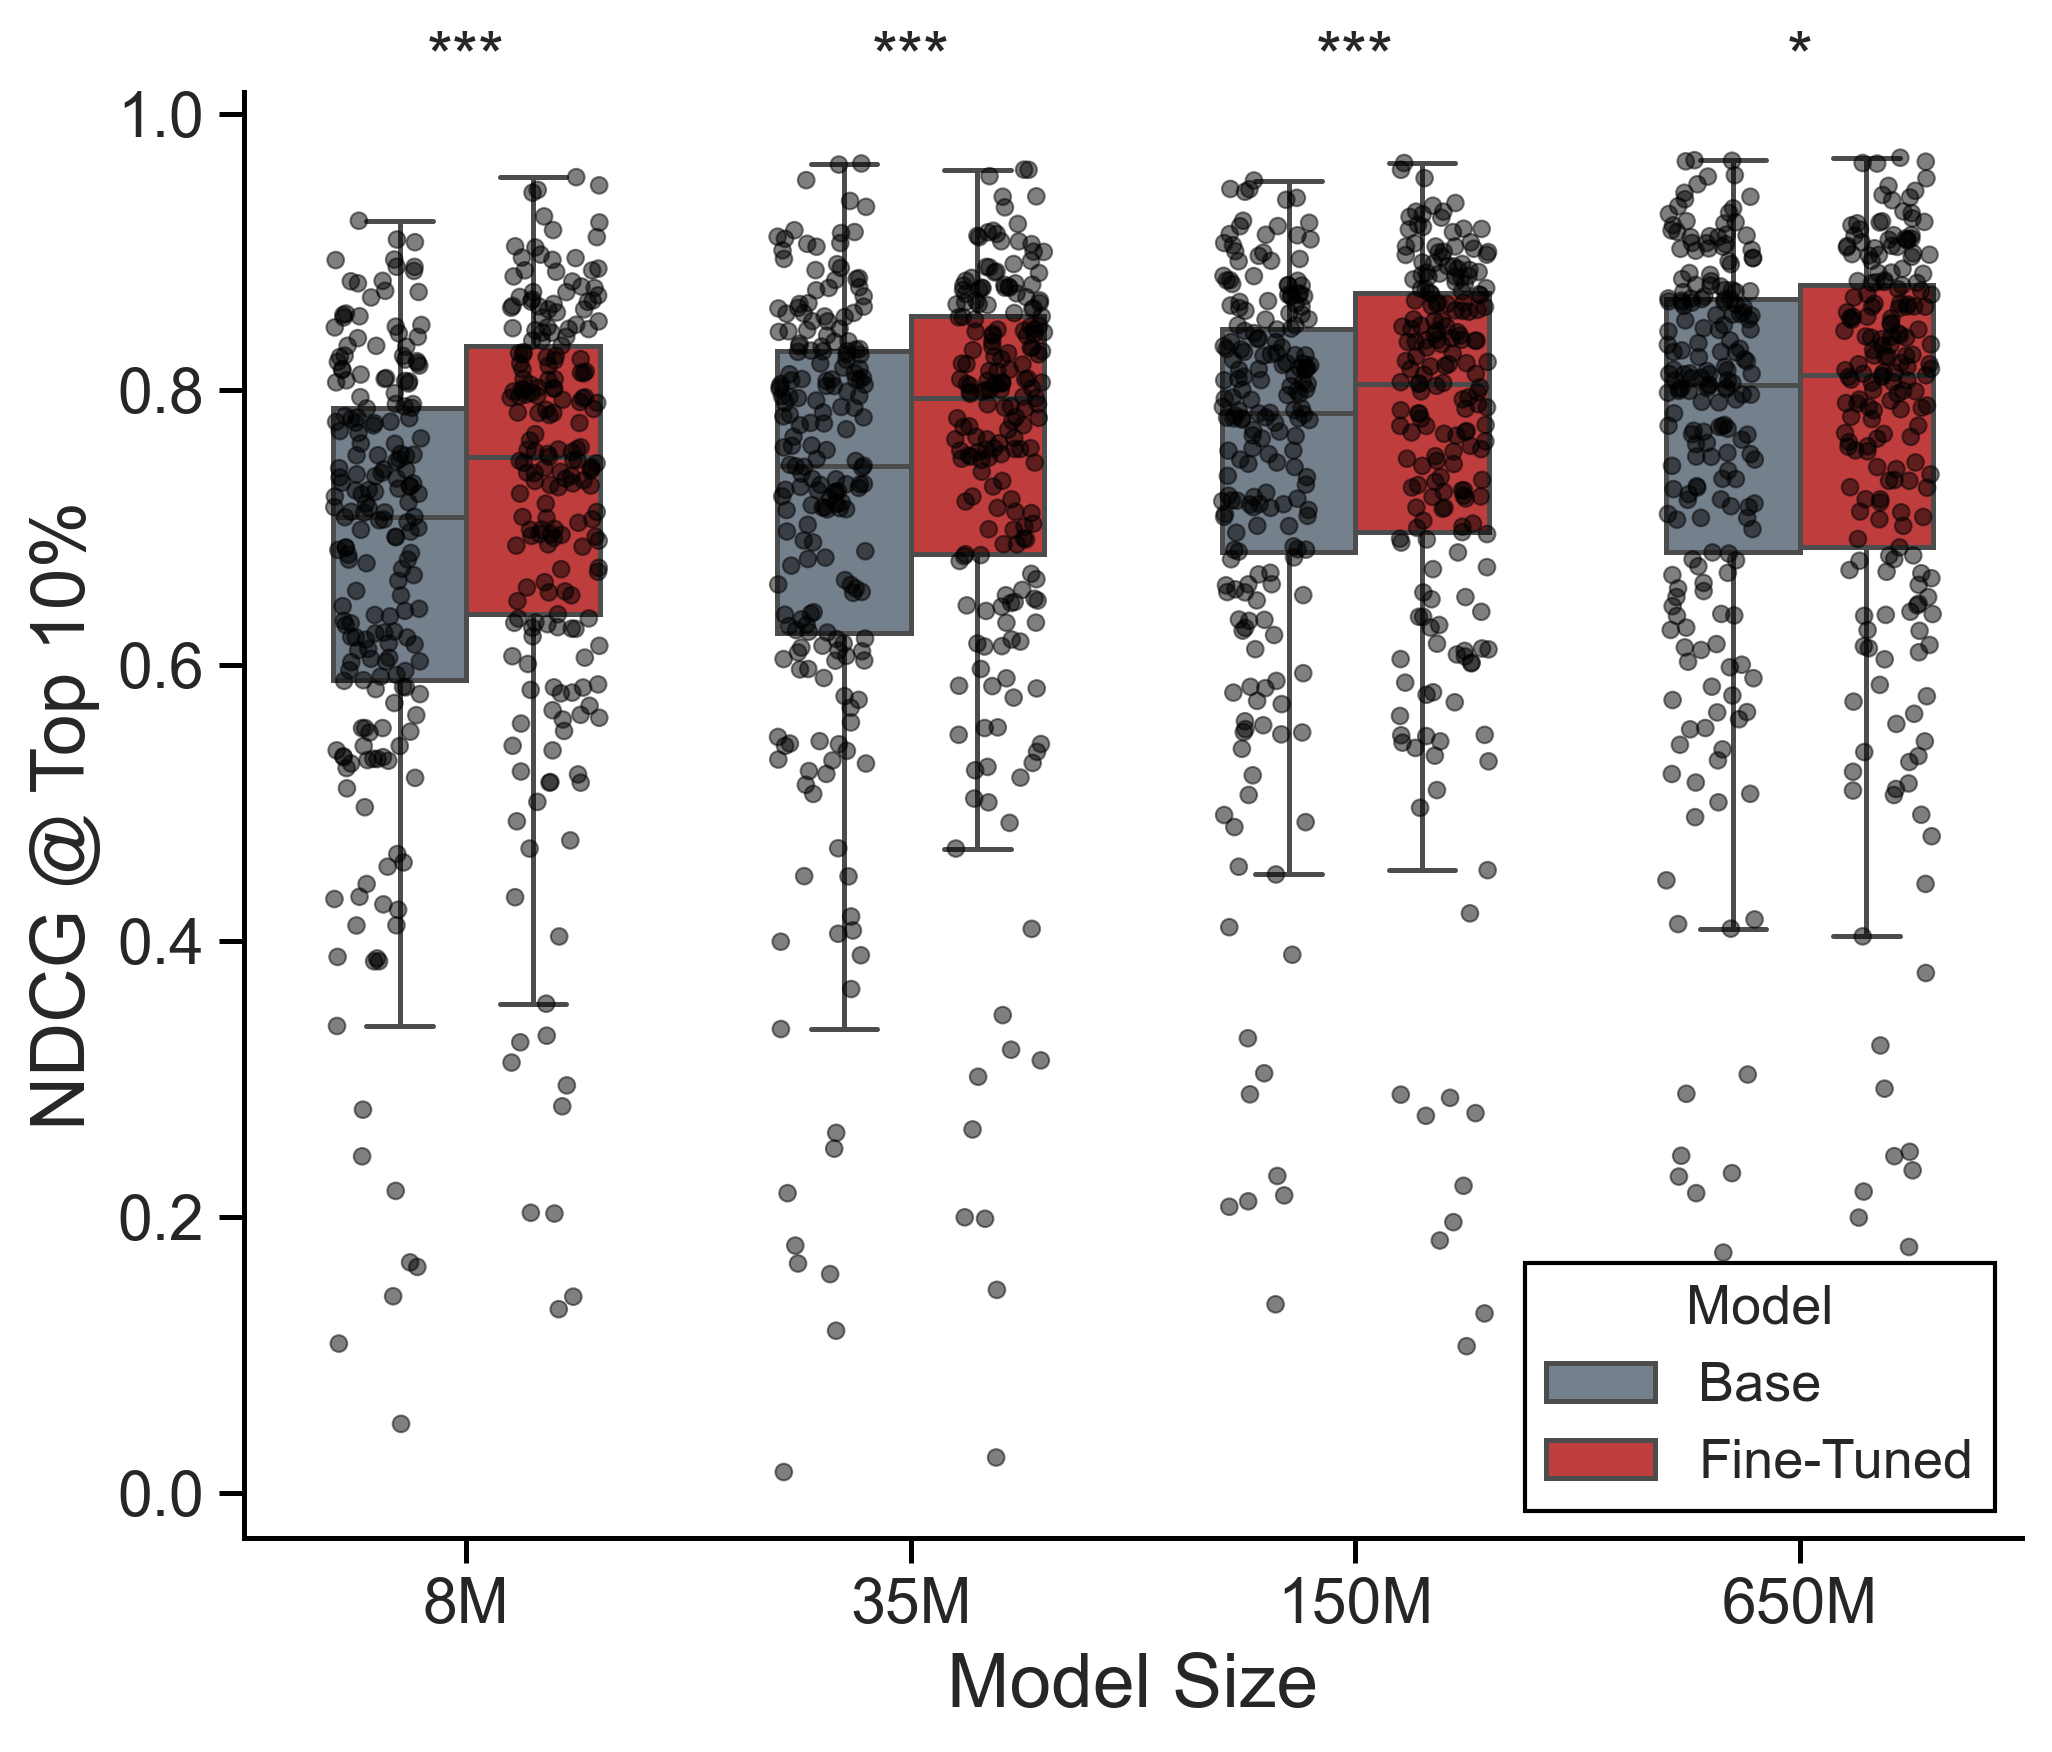

In [ ]:
#@title S5D

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.stats import wilcoxon
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

# ============================================================================
# CONFIGURATION
# ============================================================================
FIGURE_SIZE = (7, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 15
FONT_SIZE_LEGEND = 13
FONT_SIZE_TITLE = 13
FONT_SIZE_SIG = 16
SPINE_WIDTH = 1.2
BOX_WIDTH = 0.6
BOX_LINEWIDTH = 1.2
STRIP_SIZE = 4
STRIP_ALPHA = 0.5
STRIP_JITTER = 0.2

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# ============================================================================
# DATA LOADING AND PROCESSING
# ============================================================================
summary_df = pd.read_csv('proteingym_scores.csv', header=0)

# Convert wide → long format
melted_df = summary_df.melt(
    id_vars='taxon',
    value_vars=[
        'NDCG_8M_base', 'NDCG_35M_base', 'NDCG_150M_base', 'NDCG_650M_base',
        'NDCG_8M_ft',   'NDCG_35M_ft',   'NDCG_150M_ft',   'NDCG_650M_ft'
    ],
    var_name='Model',
    value_name='Score'
)

# Extract model size and status
melted_df['Model_Size'] = melted_df['Model'].str.extract(r'(\d+M)')
melted_df['Status'] = melted_df['Model'].apply(
    lambda x: 'Fine-Tuned' if '_ft' in x else 'Base'
)

# ============================================================================
# STATISTICAL ANALYSIS
# ============================================================================
model_config = {
    '8M':   ('NDCG_8M_base',   'NDCG_8M_ft'),
    '35M':  ('NDCG_35M_base',  'NDCG_35M_ft'),
    '150M': ('NDCG_150M_base', 'NDCG_150M_ft'),
    '650M': ('NDCG_650M_base', 'NDCG_650M_ft'),
}

significance_dict = {}

print("=" * 60)
print("STATISTICAL ANALYSIS - Wilcoxon Signed-Rank Test")
print("=" * 60)

for size, (base_col, ft_col) in model_config.items():
    base_scores = summary_df[base_col].dropna()
    ft_scores   = summary_df[ft_col].dropna()

    valid_idx   = base_scores.index.intersection(ft_scores.index)
    base_scores = base_scores.loc[valid_idx]
    ft_scores   = ft_scores.loc[valid_idx]

    stat, p = wilcoxon(base_scores, ft_scores)

    print(f"\n{size} Model:")
    print(f"  Base median:       {base_scores.median():.4f}")
    print(f"  Fine-tuned median: {ft_scores.median():.4f}")
    print(f"  Wilcoxon p-value:  {p:.4e}")

    if p < 0.001:
        significance = '***'
    elif p < 0.01:
        significance = '**'
    elif p < 0.05:
        significance = '*'
    else:
        significance = 'ns'

    print(f"  Significance:      {significance}")
    significance_dict[size] = significance

print("=" * 60)

# ============================================================================
# COLOR PALETTE
# ============================================================================
box_palette = ['#708090', '#d62728']
dot_palette = ['black', 'black']

# ============================================================================
# PLOTTING
# ============================================================================
fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

# Boxplot
sns.boxplot(
    data=melted_df,
    x='Model_Size',
    y='Score',
    hue='Status',
    palette=box_palette,
    fliersize=0,
    width=BOX_WIDTH,
    linewidth=BOX_LINEWIDTH,
    ax=ax
)

# Stripplot
sns.stripplot(
    data=melted_df,
    x='Model_Size',
    y='Score',
    hue='Status',
    dodge=True,
    size=STRIP_SIZE,
    alpha=STRIP_ALPHA,
    jitter=STRIP_JITTER,
    palette=dot_palette,
    edgecolor='black',
    linewidth=0.5,
    ax=ax
)

# ============================================================================
# LEGEND
# ============================================================================
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(
    handles[:2],
    labels[:2],
    title="Model",
    fontsize=FONT_SIZE_LEGEND,
    loc='lower right',
    frameon=True,
    fancybox=False,
    edgecolor='black',
    framealpha=1
)

for text in legend.get_texts():
    text.set_fontproperties(arial_font)
    text.set_fontsize(FONT_SIZE_LEGEND)
legend.get_title().set_fontproperties(arial_font)
legend.get_title().set_fontsize(FONT_SIZE_TITLE)

# ============================================================================
# AXES AND LABELS
# ============================================================================
ax.set_xlabel("Model Size", fontsize=FONT_SIZE_LABELS, fontproperties=arial_font)
ax.set_ylabel("NDCG @ Top 10%", fontsize=FONT_SIZE_LABELS, fontproperties=arial_font)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(FONT_SIZE_TICKS)

# ============================================================================
# SPINES AND TICKS
# ============================================================================
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
    ax.spines[spine].set_color('black')

ax.tick_params(
    which='both',
    bottom=True,
    left=True,
    top=False,
    right=False,
    width=SPINE_WIDTH,
    color='black',
    labelsize=FONT_SIZE_TICKS
)

# ============================================================================
# SIGNIFICANCE ANNOTATIONS
# ============================================================================
y_max = melted_df['Score'].max()
y_min = melted_df['Score'].min()
y_offset = (y_max - y_min) * 0.05

model_sizes = ['8M', '35M', '150M', '650M']
for i, size in enumerate(model_sizes):
    sig = significance_dict[size]
    if sig != 'ns':
        ax.text(
            i,
            y_max + y_offset,
            sig,
            ha='center',
            va='bottom',
            fontsize=FONT_SIZE_SIG,
            fontproperties=arial_font,
            fontweight='bold'
        )

# ============================================================================
# FINALIZE AND SAVE
# ============================================================================
plt.tight_layout()

plt.savefig("ESM_NDCG_boxplot.svg", format="svg", dpi=DPI, bbox_inches='tight')

print("\n" + "=" * 60)
print("FIGURE SAVED:")
print("  - ESM_NDCG_boxplot.svg")
print("=" * 60)

plt.show()

STATISTICAL ANALYSIS - Wilcoxon Signed-Rank Test

8M Model:
  Base median:       0.5947
  Fine-tuned median: 0.6586
  Wilcoxon p-value:  8.2547e-21
  Significance:      ***

35M Model:
  Base median:       0.6688
  Fine-tuned median: 0.7134
  Wilcoxon p-value:  1.1502e-16
  Significance:      ***

150M Model:
  Base median:       0.6942
  Fine-tuned median: 0.7486
  Wilcoxon p-value:  2.1970e-13
  Significance:      ***

650M Model:
  Base median:       0.7456
  Fine-tuned median: 0.7649
  Wilcoxon p-value:  1.1412e-06
  Significance:      ***


/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)



FIGURE SAVED:
  - ESM_ROC_boxplot.svg


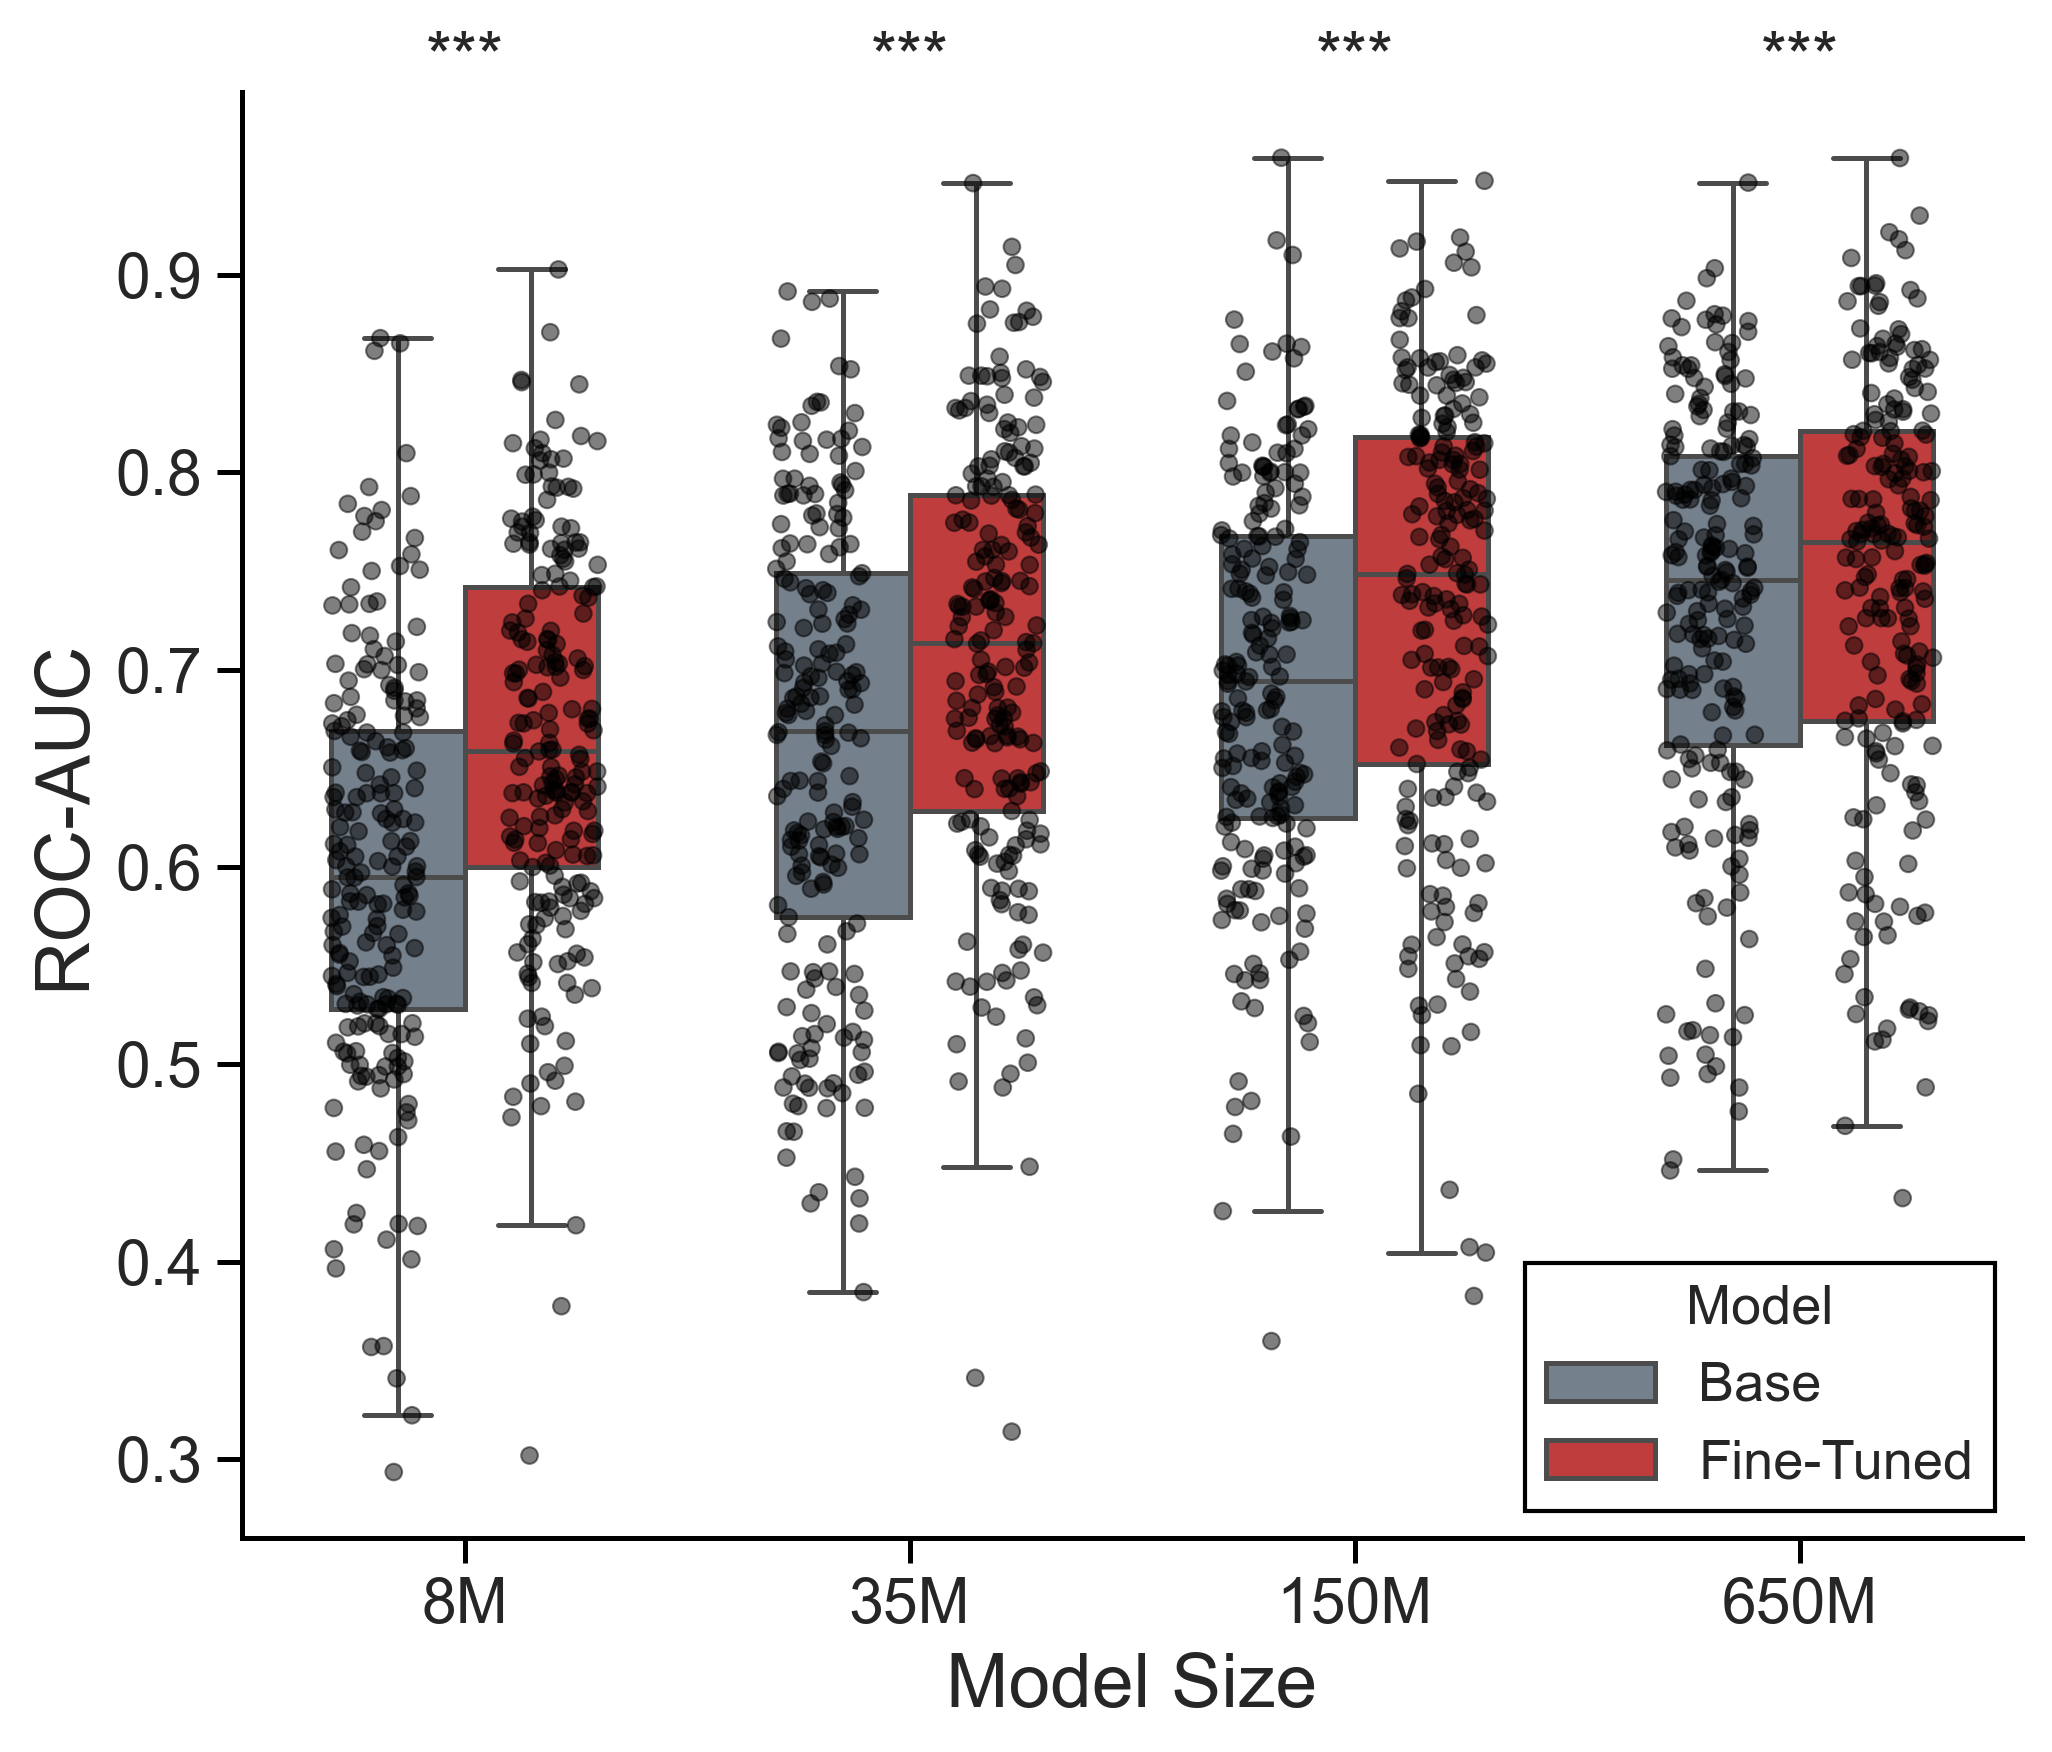

In [ ]:
#@title S5E

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.stats import wilcoxon
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

# ============================================================================
# CONFIGURATION
# ============================================================================
FIGURE_SIZE = (7, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 15
FONT_SIZE_LEGEND = 13
FONT_SIZE_TITLE = 13
FONT_SIZE_SIG = 16
SPINE_WIDTH = 1.2
BOX_WIDTH = 0.6
BOX_LINEWIDTH = 1.2
STRIP_SIZE = 4
STRIP_ALPHA = 0.5
STRIP_JITTER = 0.2

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# ============================================================================
# DATA LOADING AND PROCESSING
# ============================================================================
summary_df = pd.read_csv('proteingym_scores.csv', header=0)

# Convert wide → long format
melted_df = summary_df.melt(
    id_vars='taxon',
    value_vars=[
        'ROC_8M_base', 'ROC_35M_base', 'ROC_150M_base', 'ROC_650M_base',
        'ROC_8M_ft',   'ROC_35M_ft',   'ROC_150M_ft',   'ROC_650M_ft'
    ],
    var_name='Model',
    value_name='Score'
)

# Extract model size and status
melted_df['Model_Size'] = melted_df['Model'].str.extract(r'(\d+M)')
melted_df['Status'] = melted_df['Model'].apply(
    lambda x: 'Fine-Tuned' if '_ft' in x else 'Base'
)

# ============================================================================
# STATISTICAL ANALYSIS
# ============================================================================
model_config = {
    '8M':   ('ROC_8M_base',   'ROC_8M_ft'),
    '35M':  ('ROC_35M_base',  'ROC_35M_ft'),
    '150M': ('ROC_150M_base', 'ROC_150M_ft'),
    '650M': ('ROC_650M_base', 'ROC_650M_ft'),
}

significance_dict = {}

print("=" * 60)
print("STATISTICAL ANALYSIS - Wilcoxon Signed-Rank Test")
print("=" * 60)

for size, (base_col, ft_col) in model_config.items():
    base_scores = summary_df[base_col].dropna()
    ft_scores   = summary_df[ft_col].dropna()

    valid_idx   = base_scores.index.intersection(ft_scores.index)
    base_scores = base_scores.loc[valid_idx]
    ft_scores   = ft_scores.loc[valid_idx]

    stat, p = wilcoxon(base_scores, ft_scores)

    print(f"\n{size} Model:")
    print(f"  Base median:       {base_scores.median():.4f}")
    print(f"  Fine-tuned median: {ft_scores.median():.4f}")
    print(f"  Wilcoxon p-value:  {p:.4e}")

    if p < 0.001:
        significance = '***'
    elif p < 0.01:
        significance = '**'
    elif p < 0.05:
        significance = '*'
    else:
        significance = 'ns'

    print(f"  Significance:      {significance}")
    significance_dict[size] = significance

print("=" * 60)

# ============================================================================
# COLOR PALETTE
# ============================================================================
box_palette = ['#708090', '#d62728']
dot_palette = ['black', 'black']

# ============================================================================
# PLOTTING
# ============================================================================
fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

# Boxplot
sns.boxplot(
    data=melted_df,
    x='Model_Size',
    y='Score',
    hue='Status',
    palette=box_palette,
    fliersize=0,
    width=BOX_WIDTH,
    linewidth=BOX_LINEWIDTH,
    ax=ax
)

# Stripplot
sns.stripplot(
    data=melted_df,
    x='Model_Size',
    y='Score',
    hue='Status',
    dodge=True,
    size=STRIP_SIZE,
    alpha=STRIP_ALPHA,
    jitter=STRIP_JITTER,
    palette=dot_palette,
    edgecolor='black',
    linewidth=0.5,
    ax=ax
)

# ============================================================================
# LEGEND
# ============================================================================
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(
    handles[:2],
    labels[:2],
    title="Model",
    fontsize=FONT_SIZE_LEGEND,
    loc='lower right',
    frameon=True,
    fancybox=False,
    edgecolor='black',
    framealpha=1
)

for text in legend.get_texts():
    text.set_fontproperties(arial_font)
    text.set_fontsize(FONT_SIZE_LEGEND)
legend.get_title().set_fontproperties(arial_font)
legend.get_title().set_fontsize(FONT_SIZE_TITLE)

# ============================================================================
# AXES AND LABELS
# ============================================================================
ax.set_xlabel("Model Size", fontsize=FONT_SIZE_LABELS, fontproperties=arial_font)
ax.set_ylabel("ROC-AUC", fontsize=FONT_SIZE_LABELS, fontproperties=arial_font)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(FONT_SIZE_TICKS)

# ============================================================================
# SPINES AND TICKS
# ============================================================================
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
    ax.spines[spine].set_color('black')

ax.tick_params(
    which='both',
    bottom=True,
    left=True,
    top=False,
    right=False,
    width=SPINE_WIDTH,
    color='black',
    labelsize=FONT_SIZE_TICKS
)

# ============================================================================
# SIGNIFICANCE ANNOTATIONS
# ============================================================================
y_max = melted_df['Score'].max()
y_min = melted_df['Score'].min()
y_offset = (y_max - y_min) * 0.05

model_sizes = ['8M', '35M', '150M', '650M']
for i, size in enumerate(model_sizes):
    sig = significance_dict[size]
    if sig != 'ns':
        ax.text(
            i,
            y_max + y_offset,
            sig,
            ha='center',
            va='bottom',
            fontsize=FONT_SIZE_SIG,
            fontproperties=arial_font,
            fontweight='bold'
        )

# ============================================================================
# FINALIZE AND SAVE
# ============================================================================
plt.tight_layout()

plt.savefig("ESM_ROC_boxplot.svg", format="svg", dpi=DPI, bbox_inches='tight')

print("\n" + "=" * 60)
print("FIGURE SAVED:")
print("  - ESM_ROC_boxplot.svg")
print("=" * 60)

plt.show()

Loading data from proteingym_scores.csv...
Data loaded: 201 points
Creating publication-quality plot...
Saving figure to Delta_ESM_vs_NDCG_bottom_650M_scatter.svg...
Figures saved:
  - Delta_ESM_vs_NDCG_bottom_650M_scatter.svg
  - Delta_ESM_vs_NDCG_bottom_650M_scatter.png

Statistics:
  Pearson r = 0.5597
  p-value = 5.7329e-18


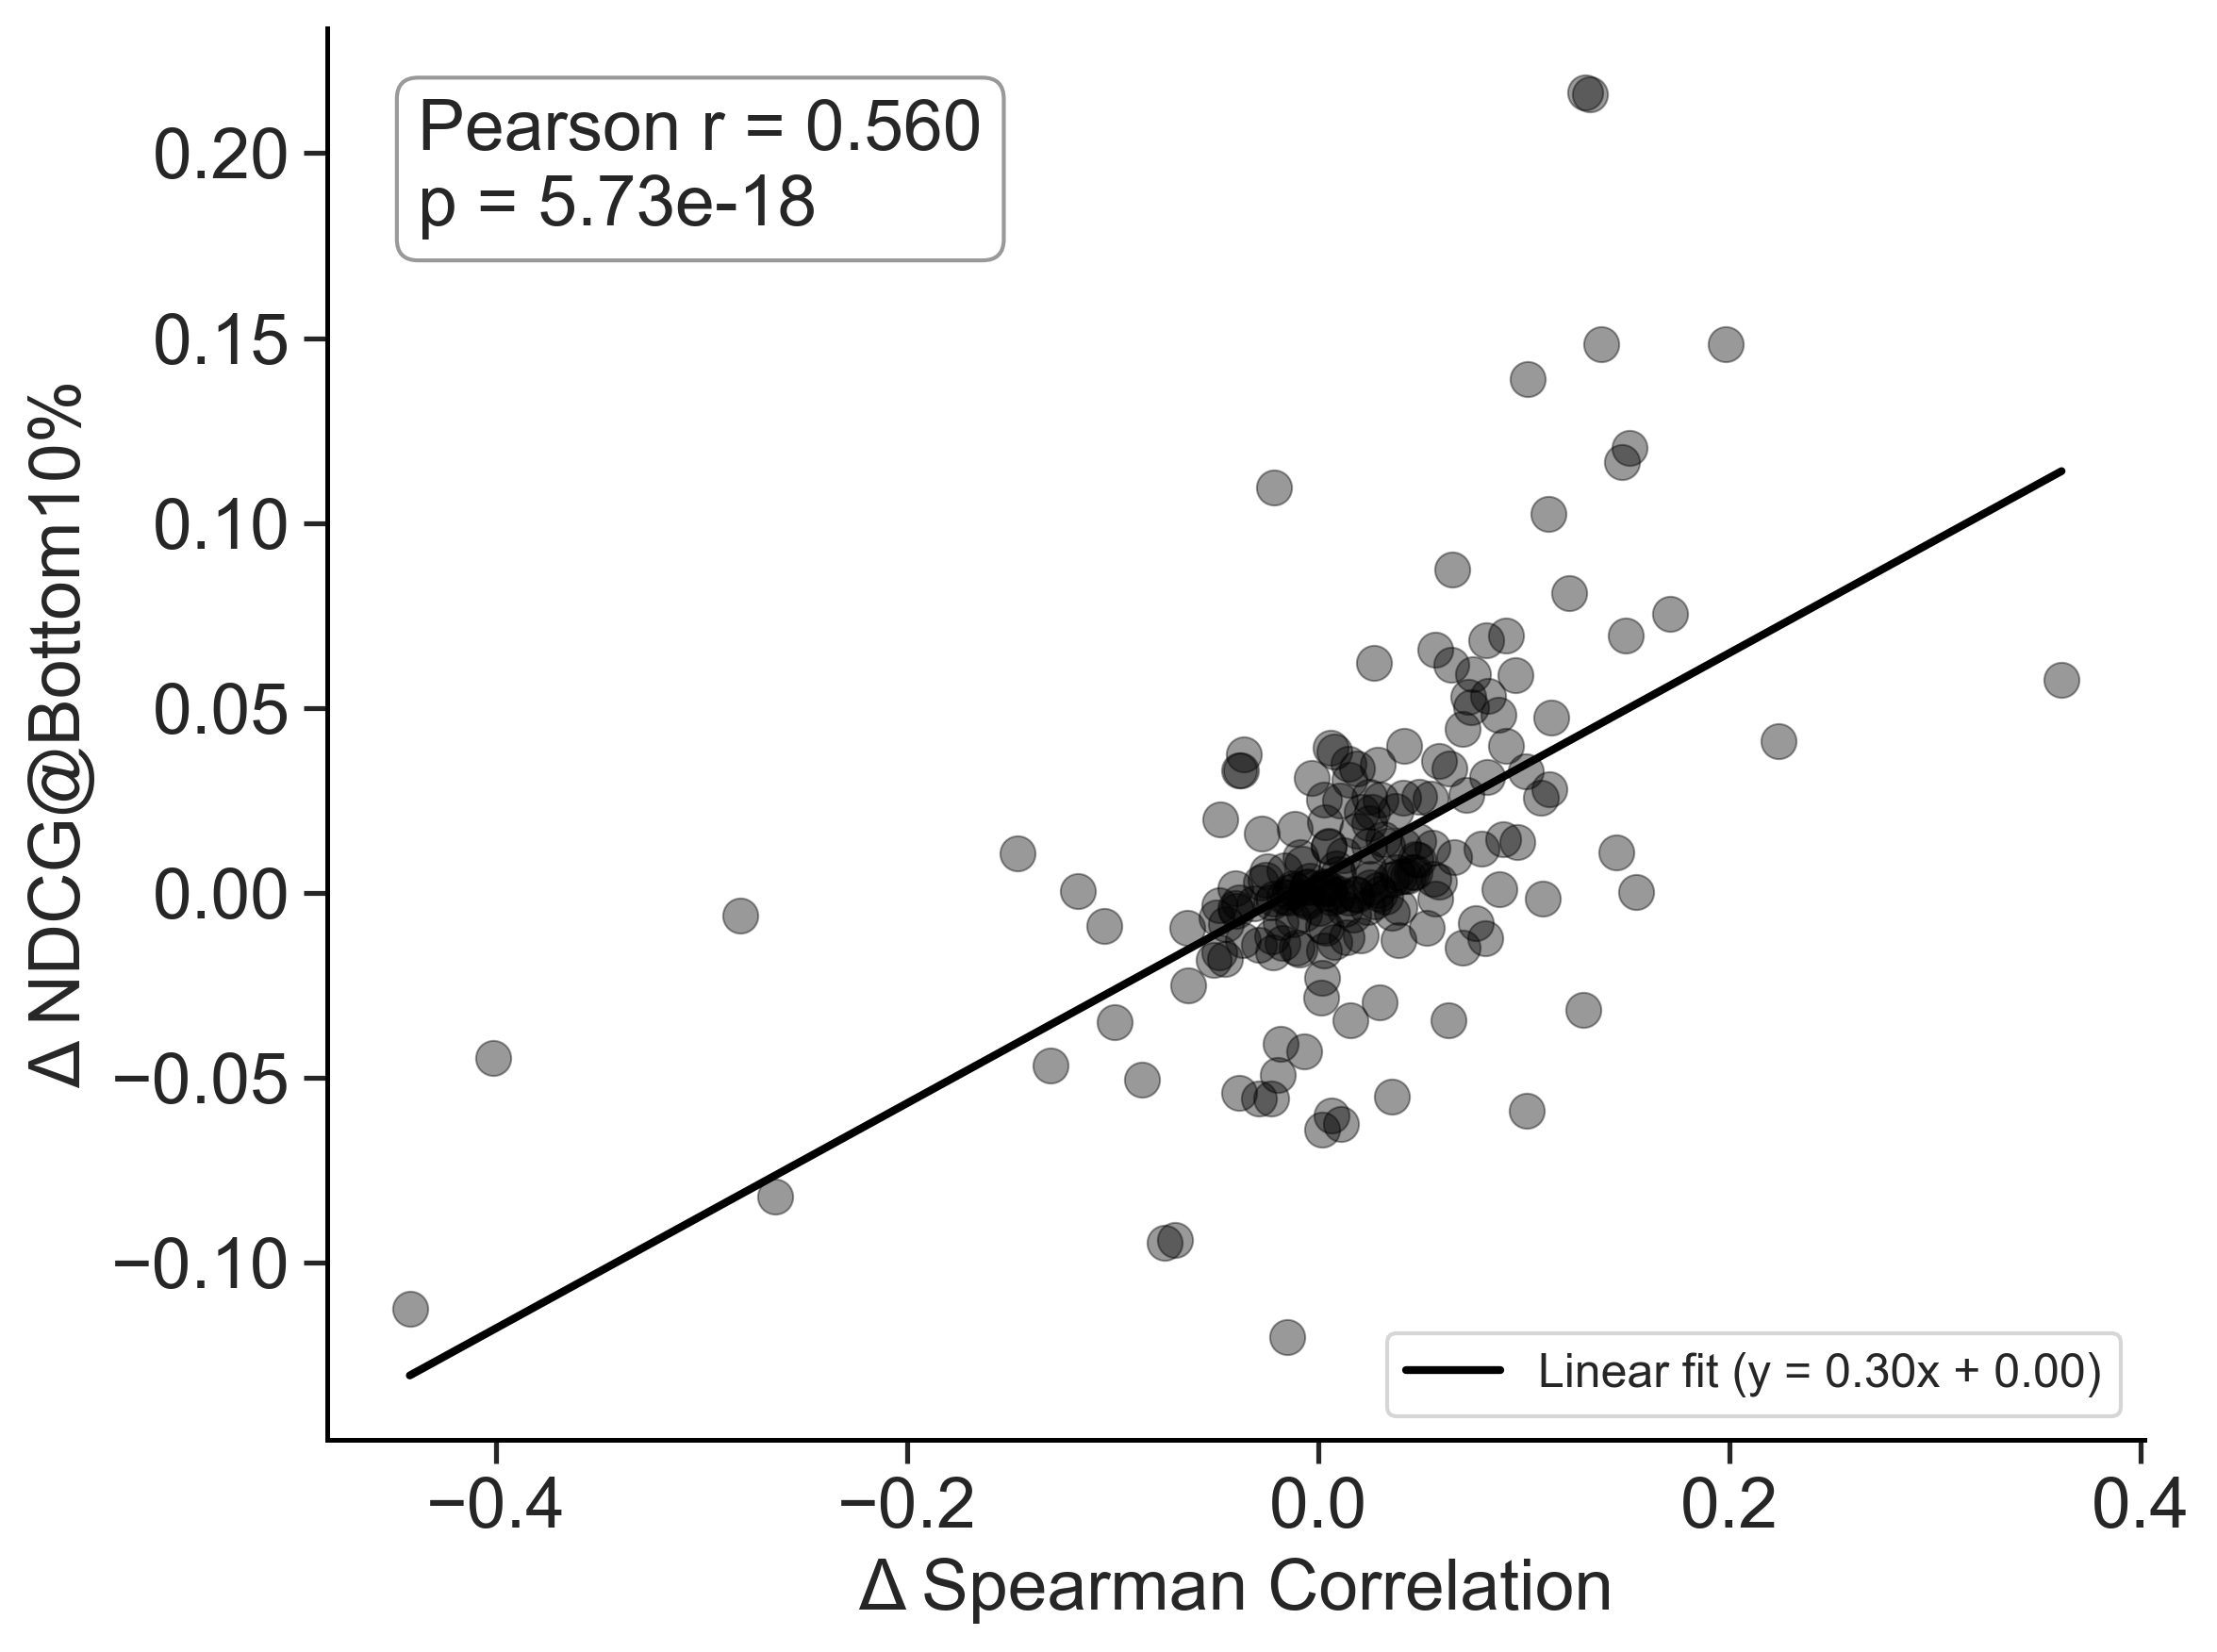

In [ ]:
#@title S6A


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.stats import pearsonr

# Configuration
FIGURE_SIZE = (8, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 18
FONT_SIZE_LEGEND = 18
FONT_SIZE_TEXT = 18
SCATTER_SIZE = 80
SCATTER_ALPHA = 0.4
SPINE_WIDTH = 1.2

# Colors
COLOR_SCATTER = 'black'
COLOR_EDGE = 'black'
COLOR_TREND = 'black'

# File paths
DATA_FILE = 'proteingym_scores.csv'
OUTPUT_FILE = 'Delta_ESM_vs_NDCG_bottom_650M_scatter.svg'

def load_arial_font():
    """Load Arial font for publication quality text"""
    try:
        return fm.FontProperties(fname="arial.ttf")
    except:
        print("Warning: Arial font not found. Using default font.")
        return fm.FontProperties()

def prepare_data(filepath):
    """Load and prepare data with computed deltas"""
    df = pd.read_csv(filepath, header=0)

    # Compute deltas for 650M model
    df['Delta_ESM_650M'] = df['ESM_650M_ft'] - df['ESM_650M']
    df['Delta_NDCG_bottom_650M'] = df['NDCG_bottom_650M_ft'] - df['NDCG_bottom_650M_base']

    # Remove any rows with NaN values
    df_clean = df[['Delta_ESM_650M', 'Delta_NDCG_bottom_650M']].dropna()

    return df_clean

def calculate_statistics(x, y):
    """Calculate Pearson correlation and trend line"""
    r, pval = pearsonr(x, y)
    coeffs = np.polyfit(x, y, 1)
    return r, pval, coeffs

def create_publication_plot(df, arial_font):
    """Create the main scatter plot with all styling"""
    fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

    # Extract data
    x = df['Delta_ESM_650M']
    y = df['Delta_NDCG_bottom_650M']

    # Scatter plot
    ax.scatter(
        x, y,
        color=COLOR_SCATTER,
        edgecolor=COLOR_EDGE,
        alpha=SCATTER_ALPHA,
        s=SCATTER_SIZE,
        linewidths=0.5,
        zorder=3
    )

    # Calculate statistics
    r, pval, coeffs = calculate_statistics(x, y)
    m, b = coeffs

    # Trend line
    x_trend = np.array([x.min(), x.max()])
    y_trend = m * x_trend + b
    ax.plot(
        x_trend, y_trend,
        color=COLOR_TREND,
        linewidth=2,
        label=f'Linear fit (y = {m:.2f}x + {b:.2f})',
        zorder=2
    )

    # Add correlation statistics
    stats_text = f'Pearson r = {r:.3f}\np = {pval:.2e}'
    ax.text(
        0.05, 0.95,
        stats_text,
        transform=ax.transAxes,
        fontsize=FONT_SIZE_TEXT,
        fontproperties=arial_font,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray')
    )

    # Axis labels
    ax.set_xlabel(
        'Δ Spearman Correlation',
        fontsize=FONT_SIZE_LABELS,
        fontproperties=arial_font,
        fontweight='normal'
    )
    ax.set_ylabel(
        'Δ NDCG@Bottom10%',
        fontsize=FONT_SIZE_LABELS,
        fontproperties=arial_font,
        fontweight='normal'
    )

    # Tick formatting
    ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS, bottom=True, left=True)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(arial_font)
        label.set_fontsize(FONT_SIZE_TICKS)

    # Spines
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_linewidth(SPINE_WIDTH)
        ax.spines[spine].set_color('black')

    # Legend
    ax.legend(
        fontsize=FONT_SIZE_LEGEND,
        prop=arial_font,
        frameon=True,
        loc='lower right'
    )

    plt.tight_layout()

    return fig, ax, r, pval

def main():
    """Main execution function"""
    arial_font = load_arial_font()

    print(f"Loading data from {DATA_FILE}...")
    df = prepare_data(DATA_FILE)
    print(f"Data loaded: {len(df)} points")

    print("Creating publication-quality plot...")
    fig, ax, r, pval = create_publication_plot(df, arial_font)

    print(f"Saving figure to {OUTPUT_FILE}...")
    plt.savefig(OUTPUT_FILE, dpi=DPI, format='svg', bbox_inches='tight')

    png_file = OUTPUT_FILE.replace('.svg', '.png')
    plt.savefig(png_file, dpi=DPI, format='png', bbox_inches='tight')

    print(f"Figures saved:")
    print(f"  - {OUTPUT_FILE}")
    print(f"  - {png_file}")
    print(f"\nStatistics:")
    print(f"  Pearson r = {r:.4f}")
    print(f"  p-value = {pval:.4e}")

    plt.show()

if __name__ == "__main__":
    main()

Figure saved: nll_distribution_comparison_combined.svg


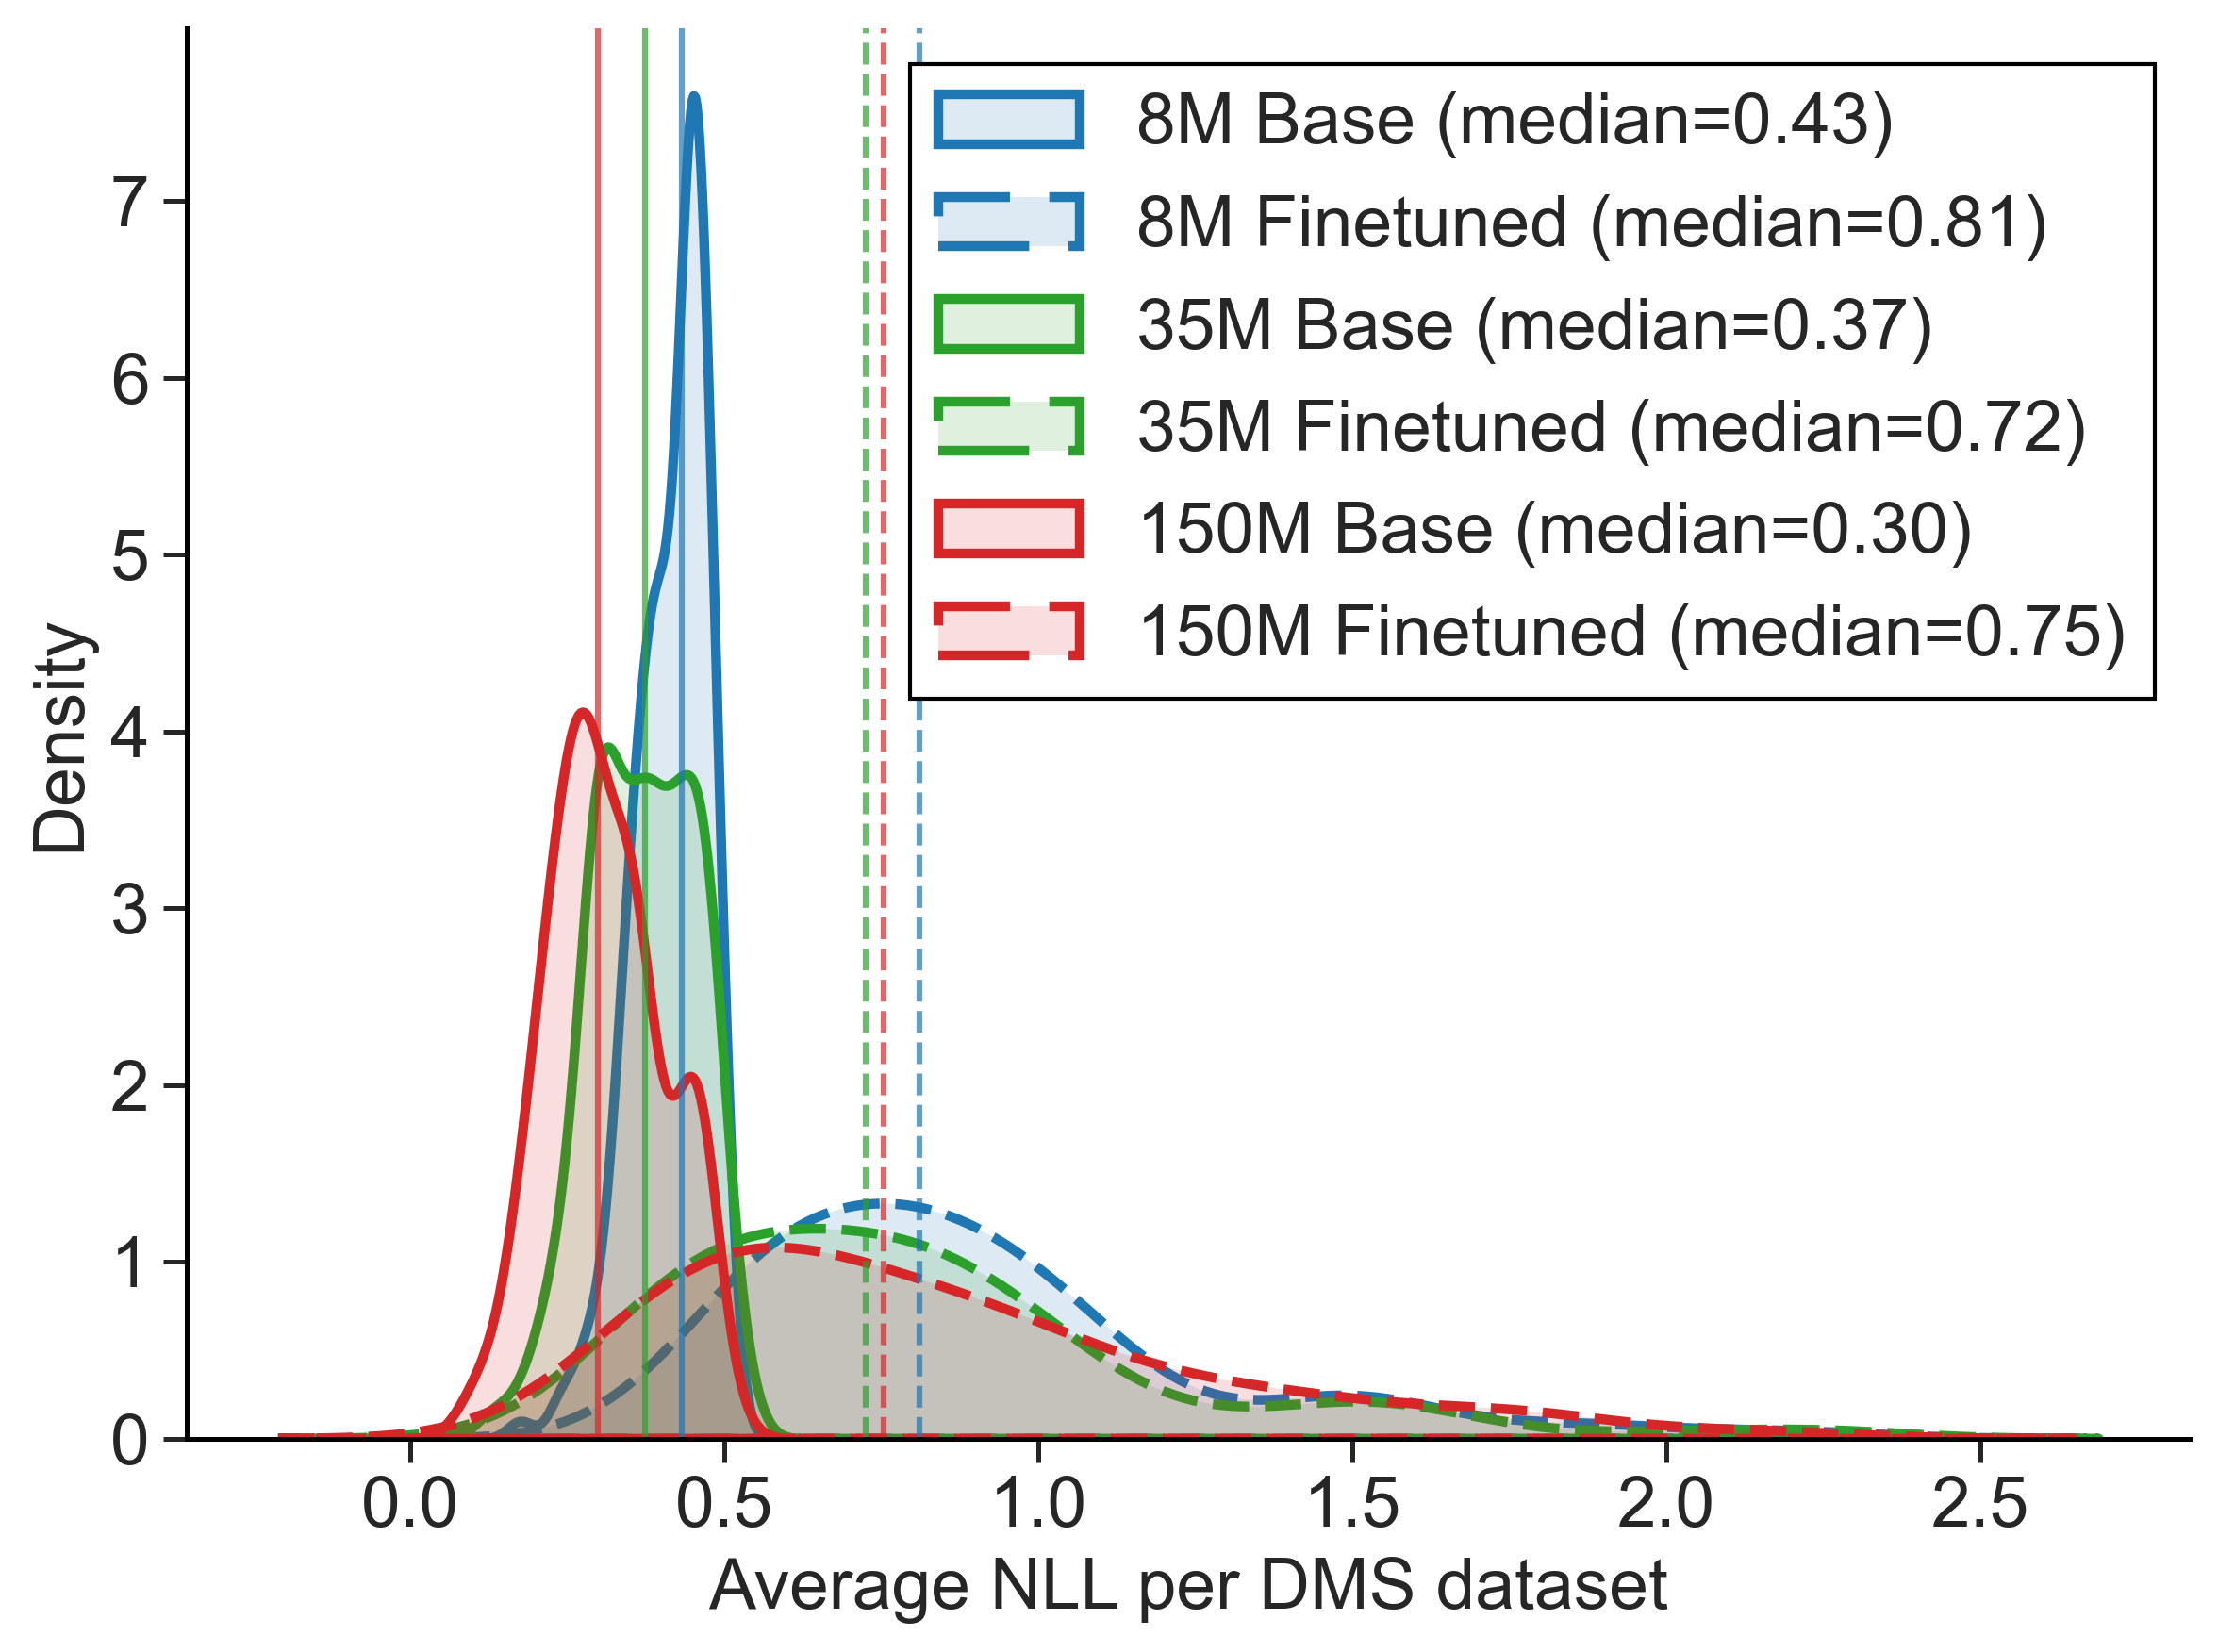

In [ ]:
#@title S6B

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Configuration
FIGURE_SIZE = (8, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 18
FONT_SIZE_LEGEND = 18
FONT_SIZE_TEXT = 18
SPINE_WIDTH = 1.2

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

summary_df = pd.read_csv('proteingym_scores.csv', header=0)

# ============================================================================
# MODEL CONFIGURATIONS
# ============================================================================
models = [
    {'label': '8M',   'base_col': 'NLL_8M_base',   'ft_col': 'NLL_8M_ft'},
    {'label': '35M',  'base_col': 'NLL_35M_base',   'ft_col': 'NLL_35M_ft'},
    {'label': '150M', 'base_col': 'NLL_150M_base',  'ft_col': 'NLL_150M_ft'},
]

# One color per model size; base = solid, ft = lighter shade
MODEL_COLORS = {
    '8M':   '#1f77b4',  # blue
    '35M':  '#2ca02c',  # green
    '150M': '#d62728',  # red
}

# ============================================================================
# SINGLE COMBINED FIGURE
# ============================================================================
fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

for model in models:
    label    = model['label']
    base_col = model['base_col']
    ft_col   = model['ft_col']
    color    = MODEL_COLORS[label]

    base_means = summary_df[base_col].dropna()
    ft_means   = summary_df[ft_col].dropna()

    base_med = base_means.median()
    ft_med   = ft_means.median()

    # KDE: base = solid line, ft = dashed line; same color per model
    sns.kdeplot(base_means, color=color, fill=True, alpha=0.15,
                linewidth=2.5, linestyle='-', ax=ax,
                label=f'{label} Base (median={base_med:.2f})')
    sns.kdeplot(ft_means, color=color, fill=True, alpha=0.15,
                linewidth=2.5, linestyle='--', ax=ax,
                label=f'{label} Finetuned (median={ft_med:.2f})')

    # Median vertical lines
    ax.axvline(base_med, color=color, linestyle='-',  linewidth=1.5, alpha=0.7)
    ax.axvline(ft_med,   color=color, linestyle='--', linewidth=1.5, alpha=0.7)

# Labels
ax.set_xlabel("Average NLL per DMS dataset", fontsize=FONT_SIZE_LABELS,
              fontweight='bold', fontproperties=arial_font)
ax.set_ylabel("Density", fontsize=FONT_SIZE_LABELS,
              fontweight='bold', fontproperties=arial_font)

# Tick formatting
ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS, width=SPINE_WIDTH, bottom=True, left=True)
for tick_label in ax.get_xticklabels() + ax.get_yticklabels():
    tick_label.set_fontproperties(arial_font)
    tick_label.set_fontsize(FONT_SIZE_TICKS)

# Legend
arial_font = fm.FontProperties(fname="arial.ttf", size=18)
legend = ax.legend(fontsize=FONT_SIZE_LEGEND, frameon=True, fancybox=False,
                   edgecolor='black', framealpha=1, loc='best', prop=arial_font)

# Spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
    ax.spines[spine].set_color('black')

plt.tight_layout()

output_file = 'nll_distribution_comparison_combined.svg'
plt.savefig(output_file, dpi=DPI, bbox_inches='tight')
print(f"Figure saved: {output_file}")

plt.show()

Processed 201 datasets across 10 deciles

=== Δ NLL Summary Statistics by Decile ===

Decile 1:
  N      = 201
  Mean   = 0.2355
  Median = 0.1286
  Std    = 0.3083
  IQR    = [0.0498, 0.2956]

Decile 2:
  N      = 196
  Mean   = 0.2528
  Median = 0.1419
  Std    = 0.3147
  IQR    = [0.0591, 0.3091]

Decile 3:
  N      = 200
  Mean   = 0.2814
  Median = 0.1716
  Std    = 0.3251
  IQR    = [0.0678, 0.3560]

Decile 4:
  N      = 200
  Mean   = 0.3119
  Median = 0.1932
  Std    = 0.3335
  IQR    = [0.0984, 0.4495]

Decile 5:
  N      = 200
  Mean   = 0.3429
  Median = 0.2245
  Std    = 0.3486
  IQR    = [0.1123, 0.4810]

Decile 6:
  N      = 200
  Mean   = 0.3611
  Median = 0.2449
  Std    = 0.3539
  IQR    = [0.1252, 0.5123]

Decile 7:
  N      = 200
  Mean   = 0.3897
  Median = 0.2682
  Std    = 0.3612
  IQR    = [0.1451, 0.5322]

Decile 8:
  N      = 199
  Mean   = 0.4087
  Median = 0.3020
  Std    = 0.3663
  IQR    = [0.1472, 0.5622]

Decile 9:
  N      = 199
  Mean   = 0.4197
  Media

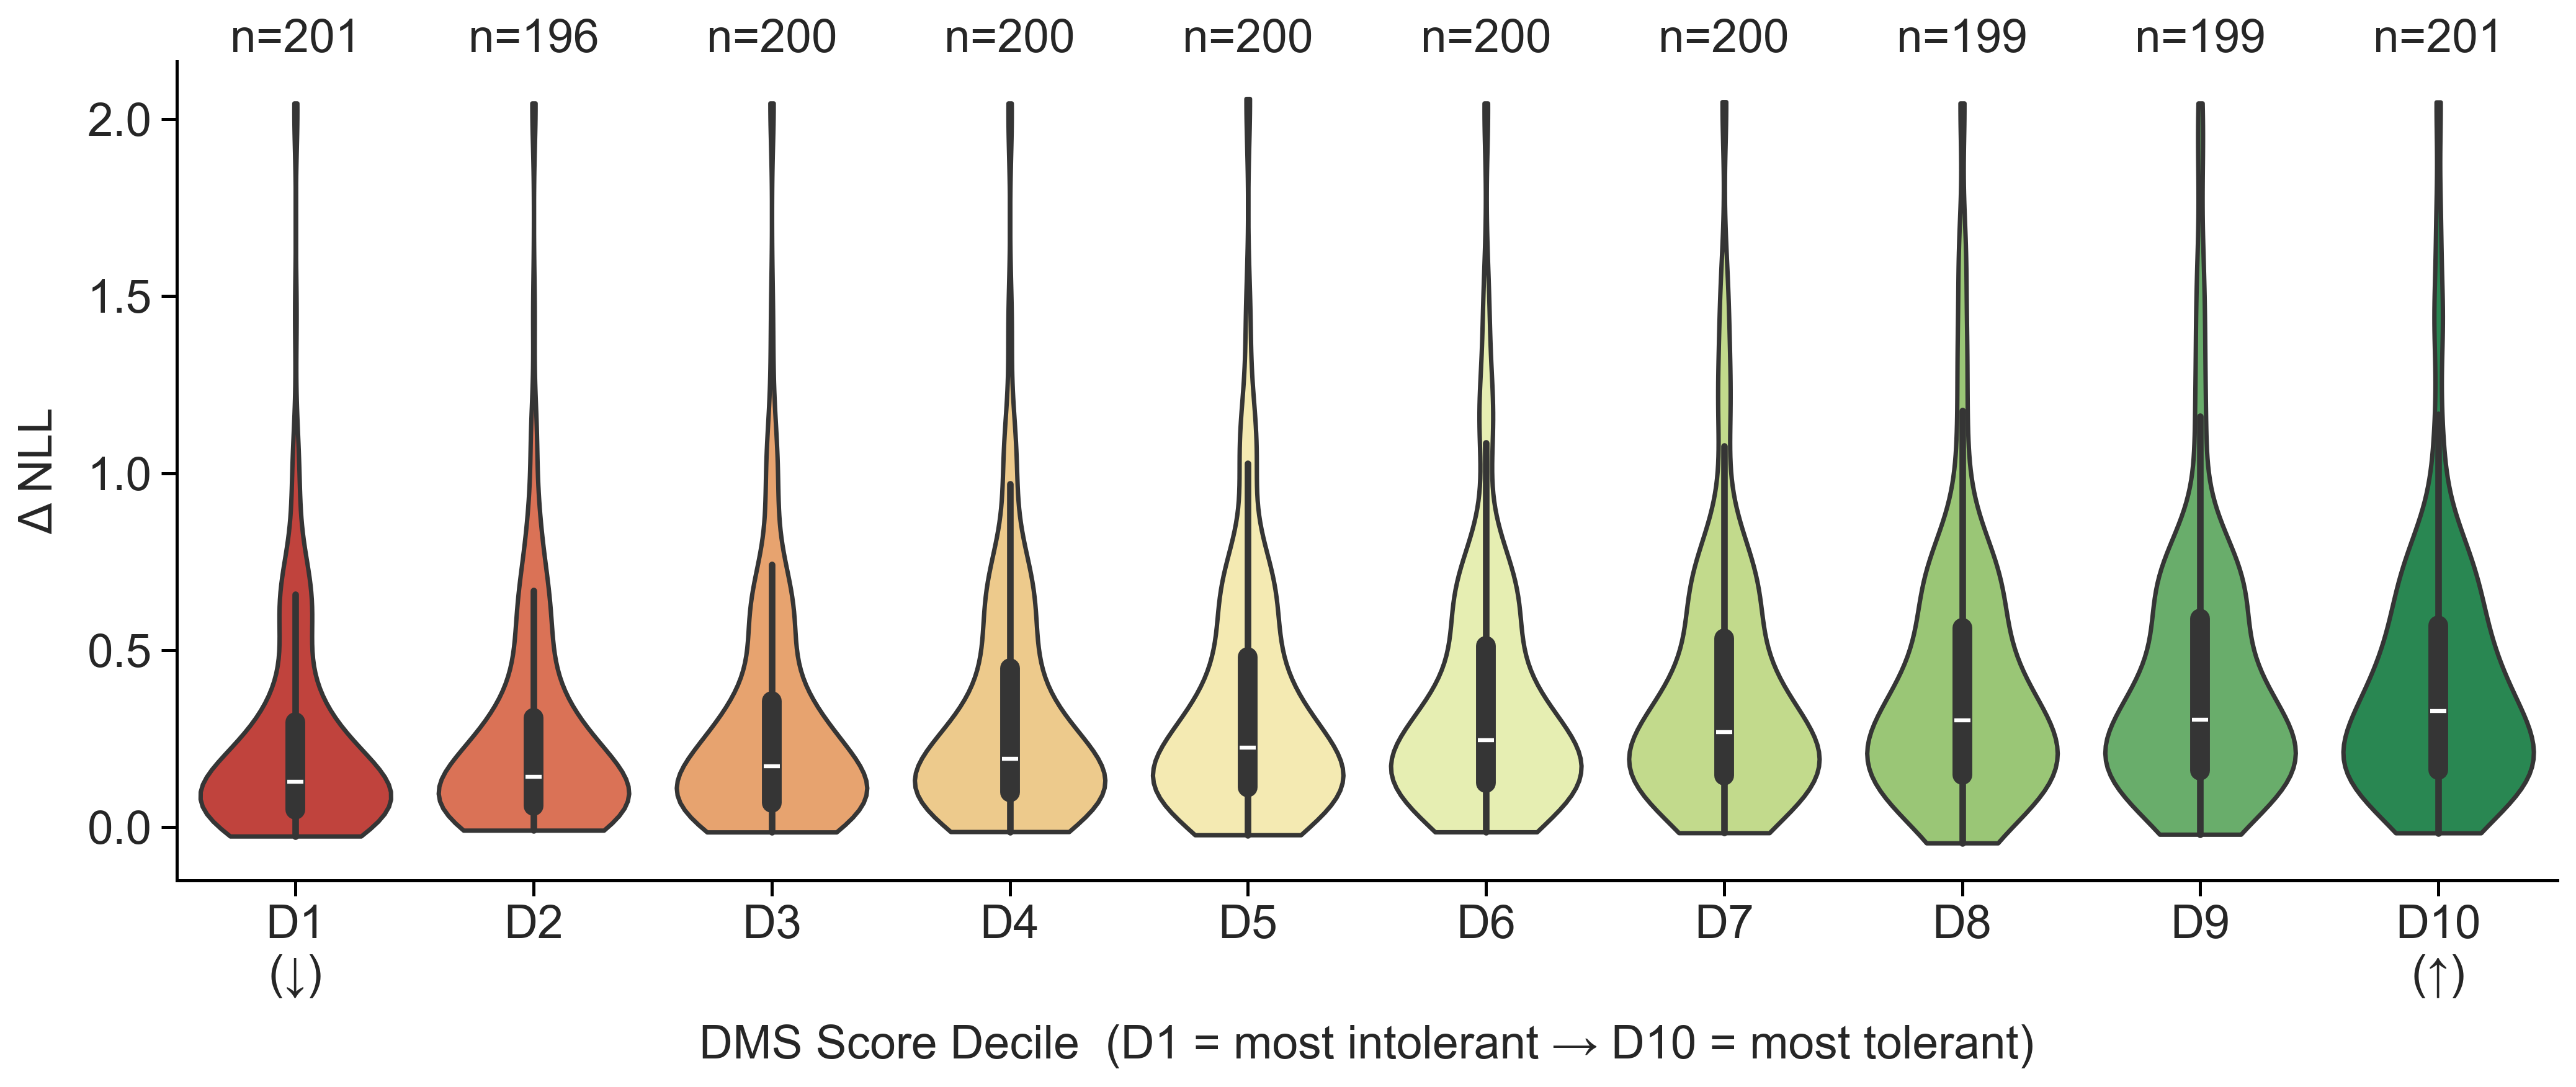

In [ ]:
#@title  S6C
import pandas as pd
import numpy as np
import re
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.stats import mannwhitneyu
import seaborn as sns
from pypalettes import load_cmap

# -----------------------------
# Style Configuration
# -----------------------------
FIGURE_SIZE = (14, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 18
FONT_SIZE_TEXT = 18
SPINE_WIDTH = 1.2

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf", size=18)

# -----------------------------
# Helpers
# -----------------------------

def extract_positions(mutant):
    """Extract residue positions from strings like T141N or T141N:A30N"""
    if pd.isna(mutant):
        return []
    return list(map(int, re.findall(r'[A-Z](\d+)[A-Z]', str(mutant))))


def get_positions_by_decile(dms_df):
    """
    Return a dict of decile_index (1-10) -> set of positions.
    Decile 1 = bottom 10% (most intolerant), Decile 10 = top 10% (most tolerant).
    No overlap removal.
    """
    decile_positions = {}
    for d in range(1, 11):
        lower = dms_df["DMS_score"].quantile((d - 1) / 10)
        upper = dms_df["DMS_score"].quantile(d / 10)

        if d == 10:
            subset = dms_df[dms_df["DMS_score"] >= lower]
        elif d == 1:
            subset = dms_df[dms_df["DMS_score"] <= upper]
        else:
            subset = dms_df[(dms_df["DMS_score"] > lower) & (dms_df["DMS_score"] <= upper)]

        positions = set()
        for m in subset["mutant"]:
            positions.update(extract_positions(m))

        decile_positions[d] = positions

    return decile_positions


# -----------------------------
# Main processing
# -----------------------------

def process_dms_files_violin(dms_dir, base_dir, ft_dir):
    records = []

    for dms_file in Path(dms_dir).glob("*.csv"):
        df_dms = pd.read_csv(dms_file)

        required_cols = {"DMS_score", "mutant"}
        if not required_cols.issubset(df_dms.columns):
            continue

        decile_positions = get_positions_by_decile(df_dms)

        llr_name = dms_file.stem + "_LLR.csv"
        base_path = Path(base_dir) / llr_name
        ft_path = Path(ft_dir) / llr_name
        if not base_path.exists() or not ft_path.exists():
            continue

        base = pd.read_csv(base_path)
        ft = pd.read_csv(ft_path)

        for decile, positions in decile_positions.items():
            if not positions:
                continue

            base_avg = base.loc[base.position.isin(positions), "nll"].mean()
            ft_avg = ft.loc[ft.position.isin(positions), "nll"].mean()

            records.append({
                "file": dms_file.name,
                "decile": decile,
                "delta_nll": ft_avg - base_avg,
                "n_positions": len(positions)
            })

    return pd.DataFrame(records)


# -----------------------------
# Plotting
# -----------------------------

def plot_violin_deciles(df, output="delta_nll_violin_all_deciles.svg"):
    df = df.dropna(subset=["delta_nll"])

    decile_order = list(range(1, 11))

    # Labels for x-axis: D1 = bottom 10%, D10 = top 10%
    decile_labels = [f"D{d}" for d in decile_order]

    # Color palette: gradient from intolerant (cool) to tolerant (warm)
    cmap_gradient = plt.cm.RdYlGn(np.linspace(0.1, 0.9, 10))
    # Seaborn coerces x to strings, so keys must be strings
    palette = {str(d): cmap_gradient[i] for i, d in enumerate(decile_order)}

    # Add a string decile column for hue
    df = df.copy()
    df['decile_str'] = df['decile'].astype(str)
    decile_order_str = [str(d) for d in decile_order]

    fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

    sns.violinplot(
        x='decile', y='delta_nll', data=df,
        hue='decile_str', hue_order=decile_order_str,
        order=decile_order, palette=palette,
        cut=0, inner="box", linewidth=SPINE_WIDTH + 0.5,
        legend=False, ax=ax
    )

    # X-axis tick labels
    ax.set_xticks(range(10))
    ax.set_xticklabels(
        [f"D{d}\n({'↓' if d == 1 else '↑' if d == 10 else ''})" if d in [1, 10]
         else f"D{d}" for d in decile_order],
        fontproperties=arial_font, fontsize=FONT_SIZE_TICKS
    )

    # Axis labels
    ax.set_xlabel('DMS Score Decile  (D1 = most intolerant → D10 = most tolerant)',
                  fontsize=FONT_SIZE_LABELS, fontproperties=arial_font, labelpad=10)
    ax.set_ylabel('Δ NLL', fontsize=FONT_SIZE_LABELS,
                  fontweight='bold', fontproperties=arial_font, labelpad=10)

    # Annotate n datasets per decile above violins
    ymax = df['delta_nll'].max()
    ymin = df['delta_nll'].min()
    yoffset = 0.05 * (ymax - ymin)

    counts = df.groupby('decile')['file'].nunique().reindex(decile_order)

    arial_small = fm.FontProperties(fname="arial.ttf", size=FONT_SIZE_TEXT)
    for i, d in enumerate(decile_order):
        n = counts.get(d, 0)
        if not pd.isna(n):
            ax.text(i, ymax + yoffset, f"n={int(n)}",
                    ha='center', va='bottom',
                    fontproperties=arial_small)


    # Tick formatting
    ax.tick_params(axis='both', which='major', width=SPINE_WIDTH, color='black',
                   bottom=True, left=True)
    for label in ax.get_yticklabels():
        label.set_fontproperties(arial_font)
        label.set_fontsize(FONT_SIZE_TICKS)

    # Spines
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_linewidth(SPINE_WIDTH)
        ax.spines[spine].set_color('black')

    plt.tight_layout()
    plt.savefig(output, dpi=DPI, bbox_inches='tight')
    plt.show()


def print_decile_summary_stats(df):
    print("\n=== Δ NLL Summary Statistics by Decile ===")
    for d in range(1, 11):
        vals = df[df["decile"] == d]["delta_nll"].dropna()
        if vals.empty:
            continue
        q25, q75 = np.percentile(vals, [25, 75])
        print(f"\nDecile {d}:")
        print(f"  N      = {len(vals)}")
        print(f"  Mean   = {vals.mean():.4f}")
        print(f"  Median = {vals.median():.4f}")
        print(f"  Std    = {vals.std():.4f}")
        print(f"  IQR    = [{q25:.4f}, {q75:.4f}]")


# -----------------------------
# Entry point
# -----------------------------

def main():
    DMS_DIR = "DMS"
    BASE_NLL_DIR = "../constraintometer/ESM_650M_NLL"
    FT_NLL_DIR = "../constraintometer/ESM_650M_test_NLL"

    df = process_dms_files_violin(DMS_DIR, BASE_NLL_DIR, FT_NLL_DIR)
    if df.empty:
        print("No valid datasets found.")
        return

    df.to_csv("delta_nll_all_deciles.csv", index=False)
    print(f"Processed {df['file'].nunique()} datasets across {df['decile'].nunique()} deciles")

    print_decile_summary_stats(df)
    plot_violin_deciles(df)


if __name__ == "__main__":
    main()